# Installation of Dependiences

In [49]:
!pip install pandas numpy matplotlib seaborn --quiet

In [50]:
!pip install opendatasets scikit-learn --quiet --upgrade


In [51]:
!pip install sweetviz 

# Mounting Drive

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
#visualize data 
from scipy.stats import norm
from scipy import stats
# Import missingno as msno
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


In [54]:
import sweetviz as sv

#Data Acquistion

In [55]:
googledata_df = pd.read_csv('/content/drive/MyDrive/FaisalDataset/Google_2012-2016.csv')
#googledata_df=googledata_df[['TIMESTAMP','M_ZONE_START', 'M_ZONE_FLAG', 'M_TRACK_TEMPERATURE', 'M_AIR_TEMPERATURE', 'M_NUM_WEATHER_FORECAST_SAMPLES', 'M_SESSION_TIME_LEFT', 'M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE', 'M_TIME_OFFSET', 'M_WEATHER_FORECAST_SAMPLES_M_WEATHER', 'M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE', 'M_TRACK_TEMPERATURE_CHANGE', 'M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE', 'M_AIR_TEMPERATURE_CHANGE', 'M_RAIN_PERCENTAGE', 'M_WEATHER']]


In [56]:
googledata_df

Date    Open    High     Low   Close    Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7380500
1       1/4/2012  331.27  333.87  329.08  666.45   5749400
2       1/5/2012  329.83  330.75  326.89  657.21   6590300
3       1/6/2012  328.34  328.77  323.68  648.24   5405900
4       1/9/2012  322.04  322.29  309.46  620.76  11688800
...          ...     ...     ...     ...     ...       ...
1253  12/23/2016  790.90  792.74  787.28  789.91    623400
1254  12/27/2016  790.68  797.86  787.66  791.55    789100
1255  12/28/2016  793.70  794.23  783.20  785.05   1153800
1256  12/29/2016  783.33  785.93  778.92  782.79    744300
1257  12/30/2016  782.75  782.78  770.41  771.82   1770000

[1258 rows x 6 columns]

In [57]:
columnnames=list(googledata_df.columns)
print(columnnames)

['Date', 'Open', 'High', 'Low', 'Close', 'Volume']


In [58]:
googledata_df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [59]:
googledata_df['Close']=googledata_df['Close'].astype(float)
googledata_df['Volume']=googledata_df['Volume'].astype(float)

In [60]:
googledata_df

Date    Open    High     Low   Close      Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7380500.0
1       1/4/2012  331.27  333.87  329.08  666.45   5749400.0
2       1/5/2012  329.83  330.75  326.89  657.21   6590300.0
3       1/6/2012  328.34  328.77  323.68  648.24   5405900.0
4       1/9/2012  322.04  322.29  309.46  620.76  11688800.0
...          ...     ...     ...     ...     ...         ...
1253  12/23/2016  790.90  792.74  787.28  789.91    623400.0
1254  12/27/2016  790.68  797.86  787.66  791.55    789100.0
1255  12/28/2016  793.70  794.23  783.20  785.05   1153800.0
1256  12/29/2016  783.33  785.93  778.92  782.79    744300.0
1257  12/30/2016  782.75  782.78  770.41  771.82   1770000.0

[1258 rows x 6 columns]

In [61]:
googledata_df['Date'] = pd.to_datetime(googledata_df['Date']).dt.date

In [62]:
googledata_df['Date'].head()

0    2012-01-03
1    2012-01-04
2    2012-01-05
3    2012-01-06
4    2012-01-09
Name: Date, dtype: object

#Exploratory data analysis Analysis

## Statistical data analysis

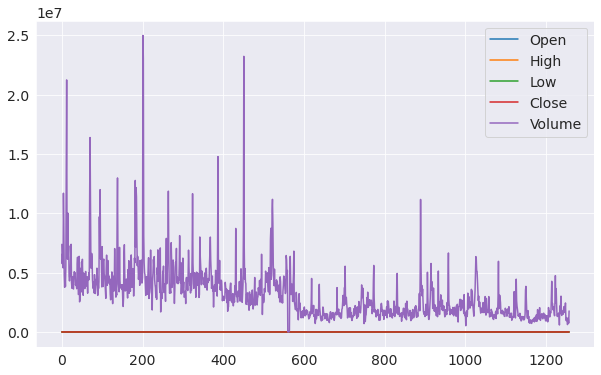

In [63]:
googledata_df.plot()
plt.show()

In [64]:
feature_config = sv.FeatureConfig(force_num=['Open', 'High', 'Low', 'Close', 'Volume'])

In [65]:
report = sv.analyze(googledata_df, target_feat='Volume', feat_cfg=feature_config)


                                             |          | [  0%]   00:00 -> (? left)


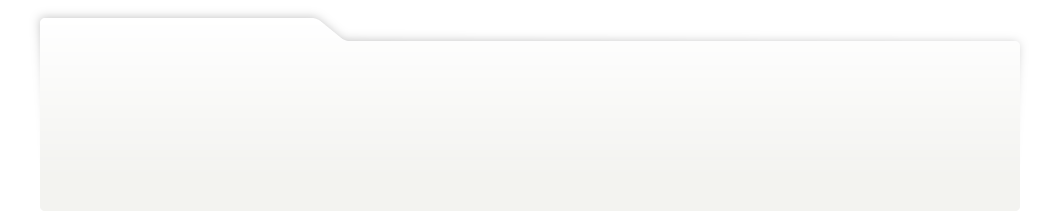
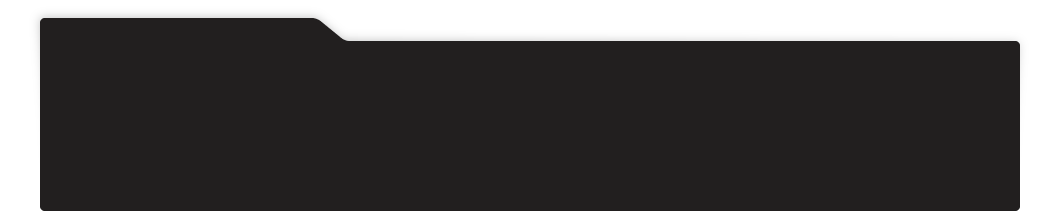
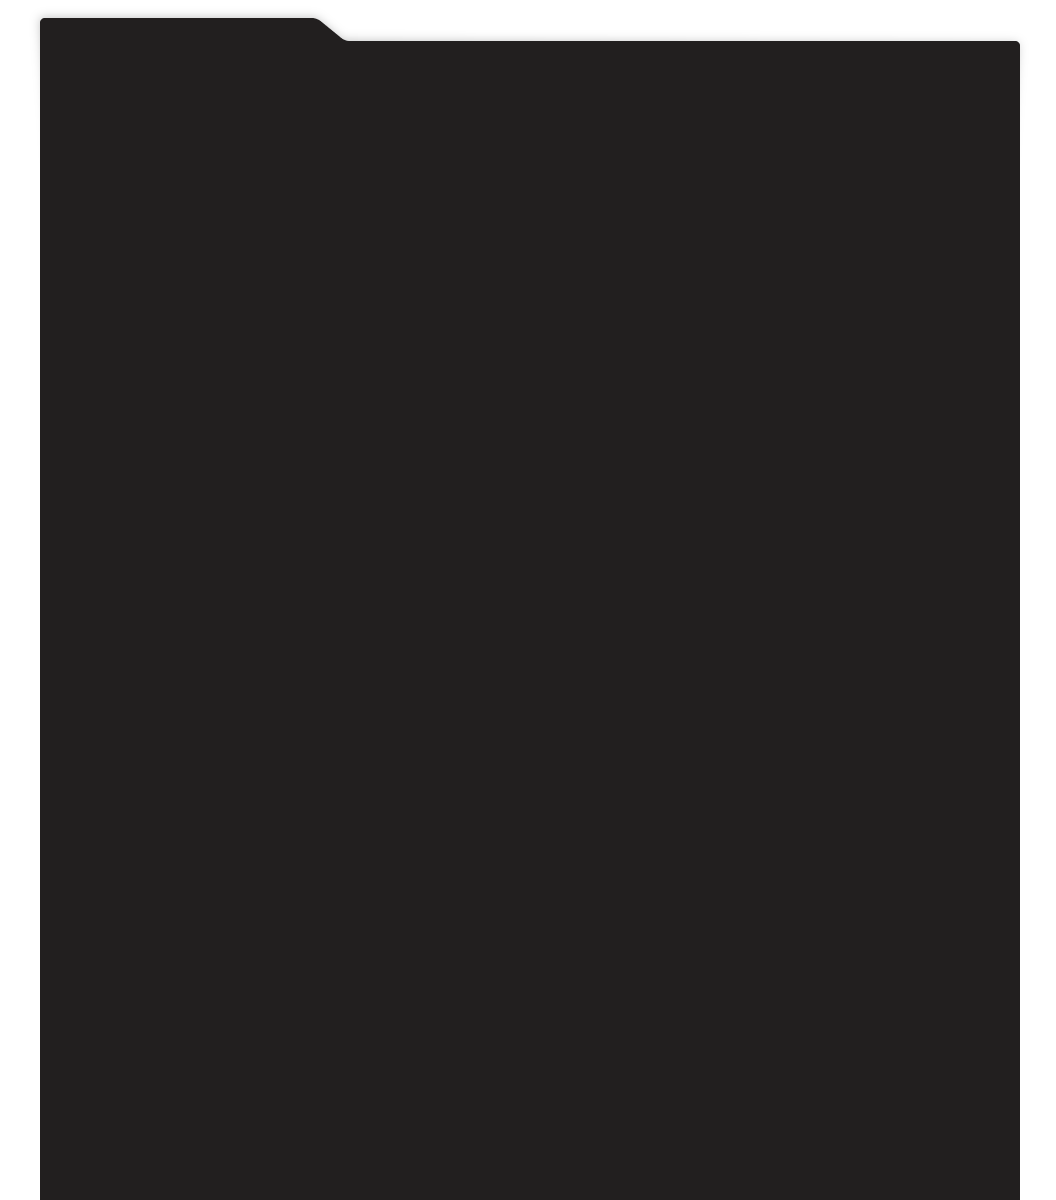
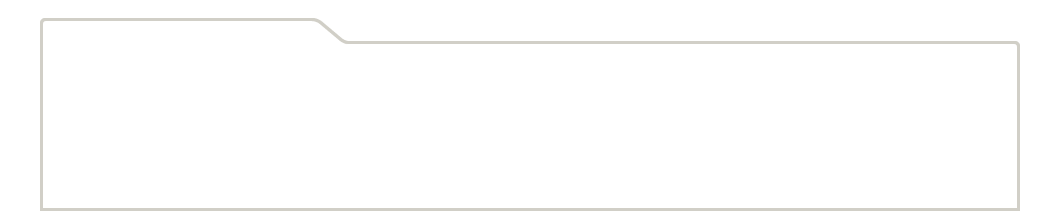
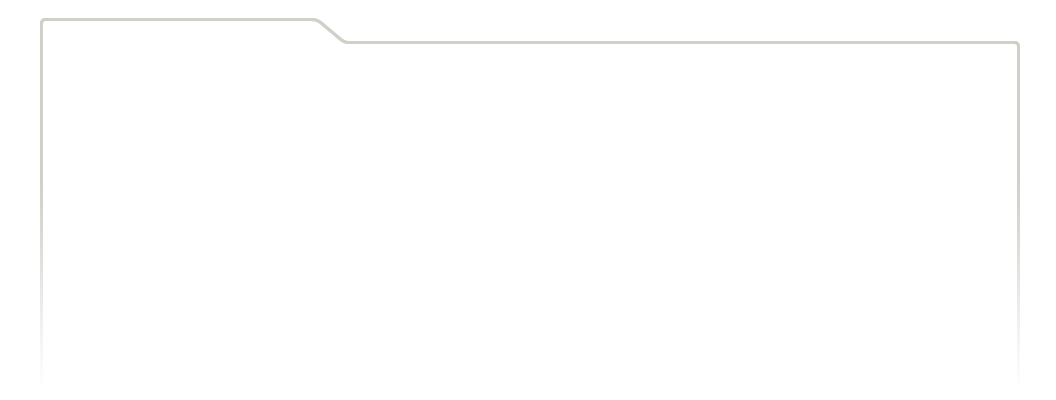
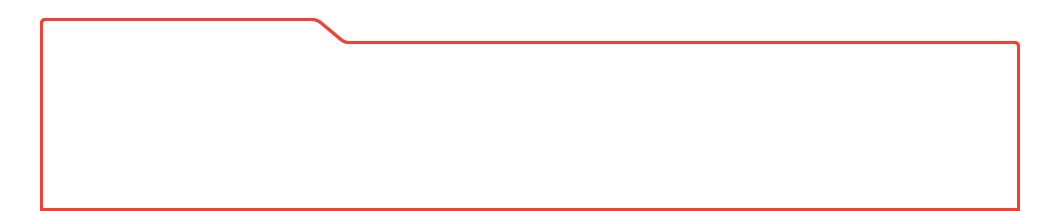
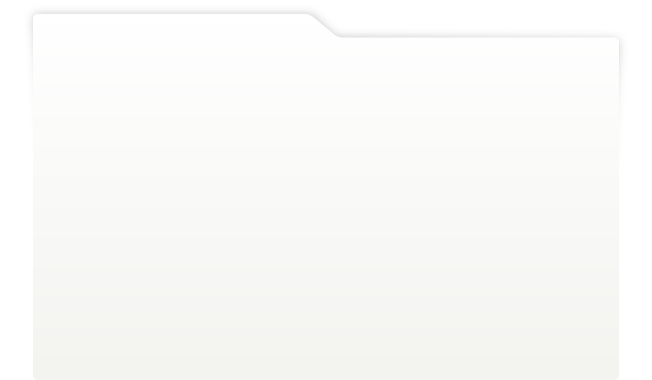
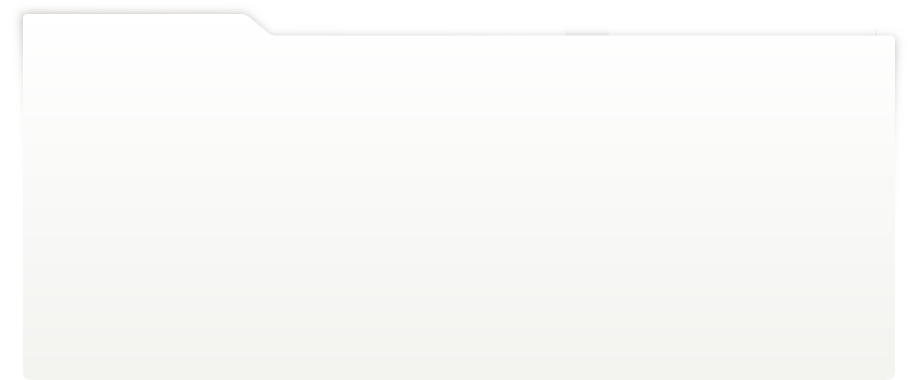
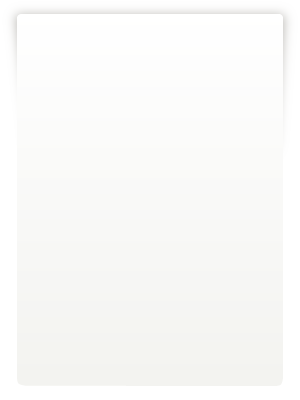
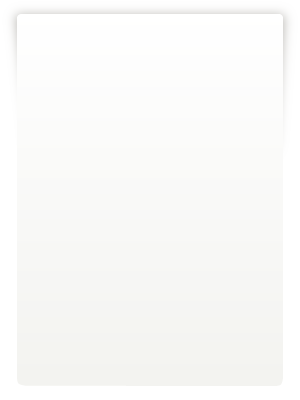
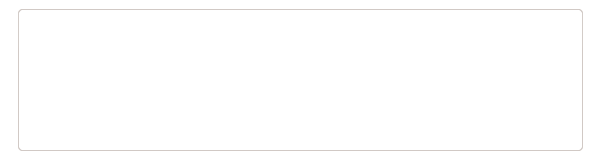
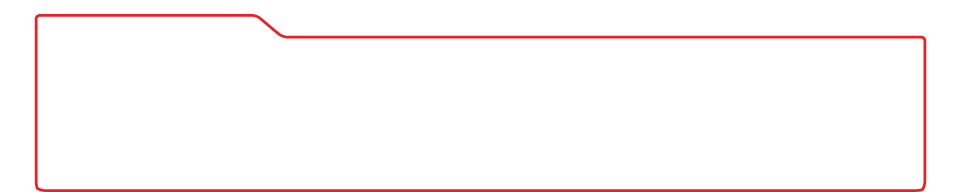
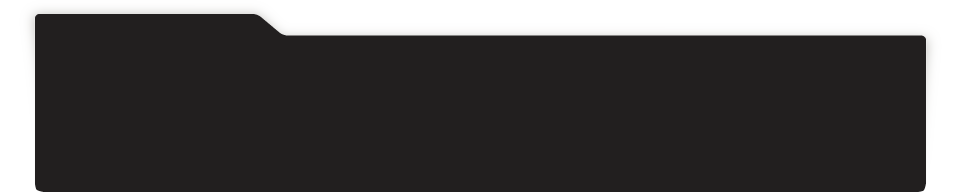
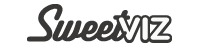
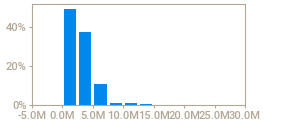
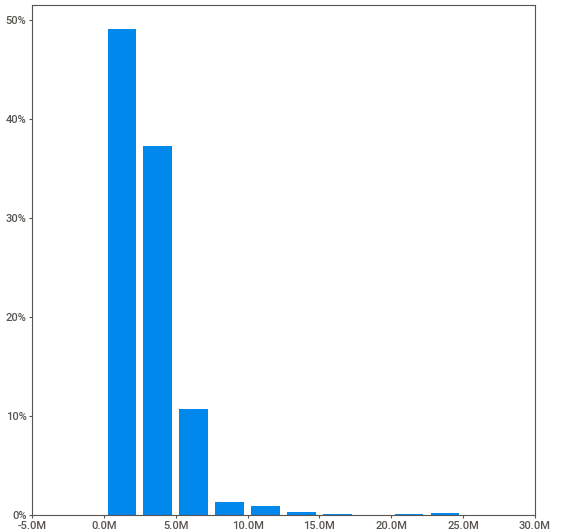
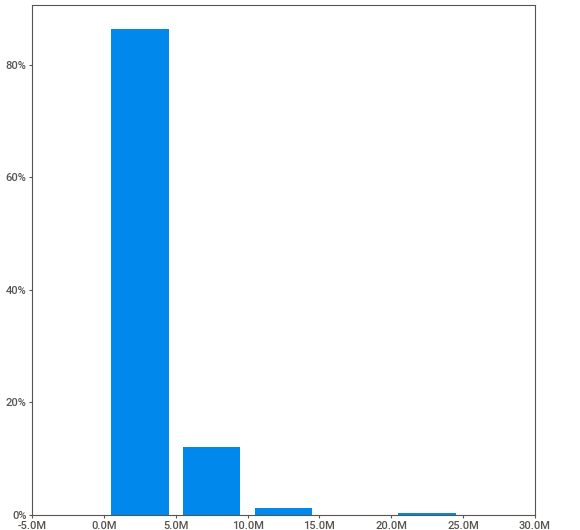
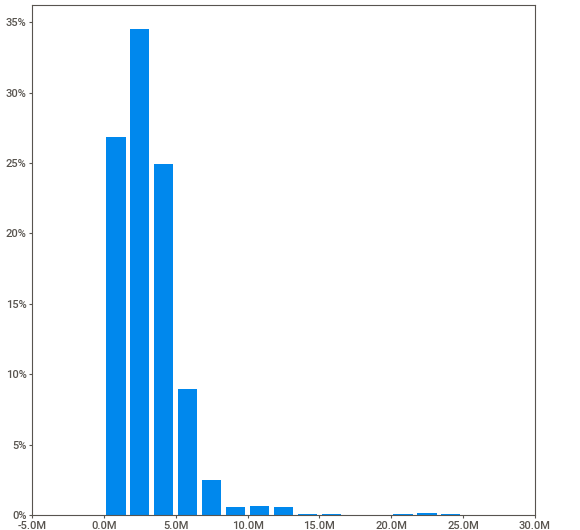
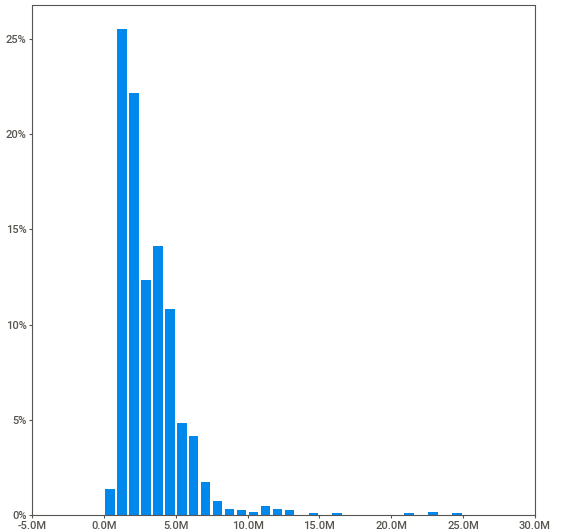
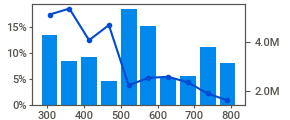
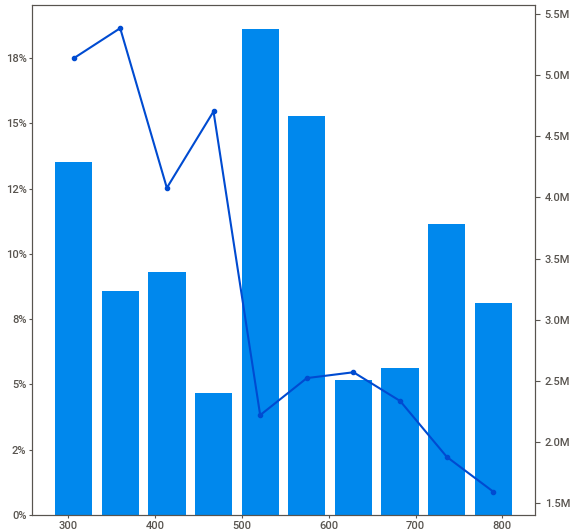
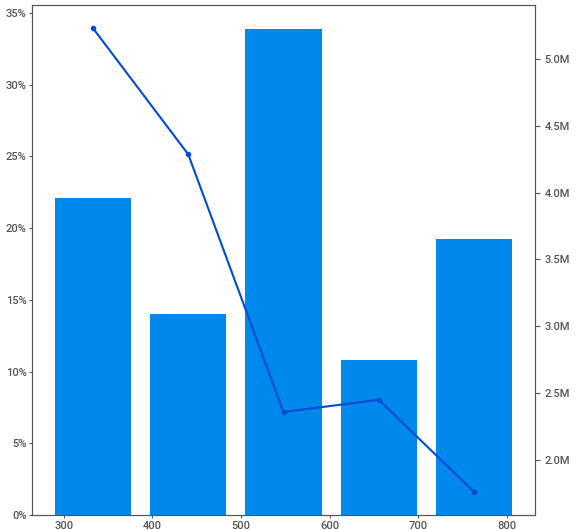
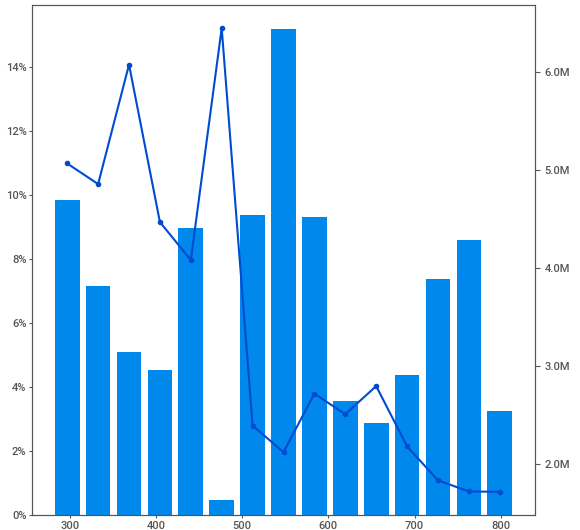
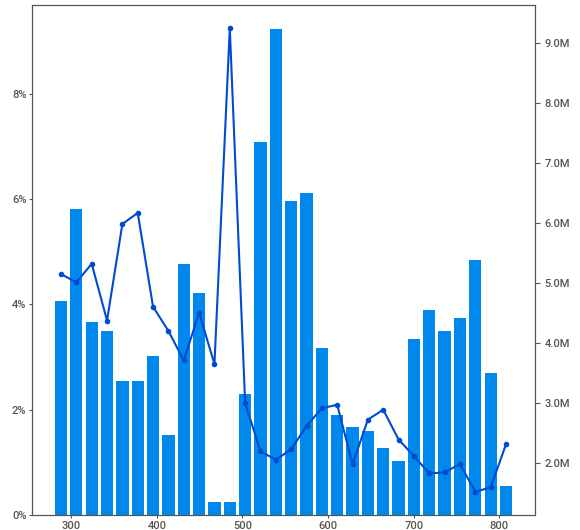
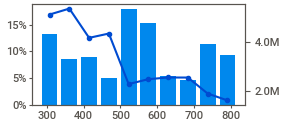
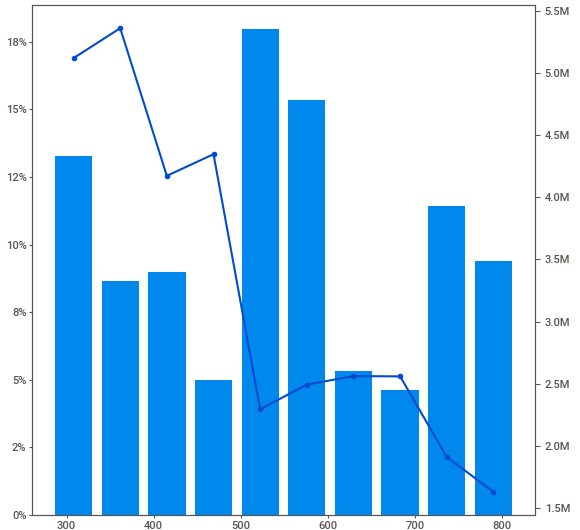
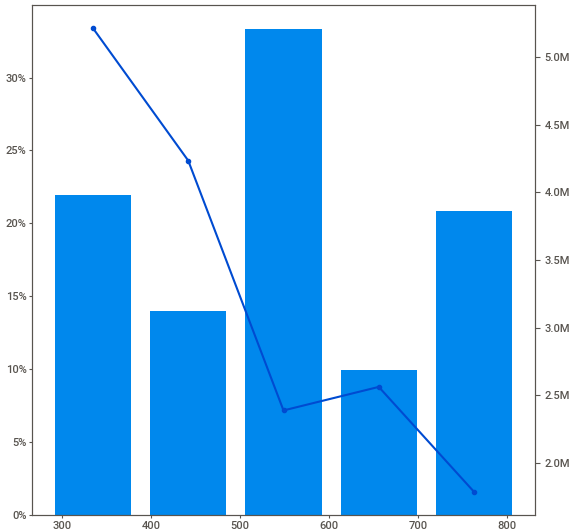
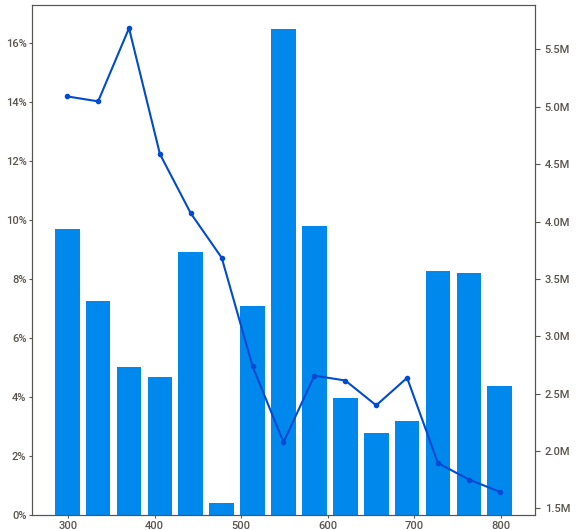
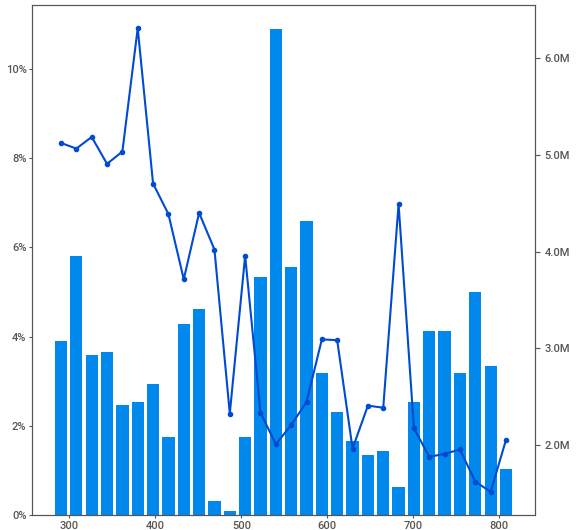
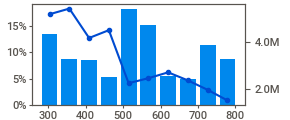
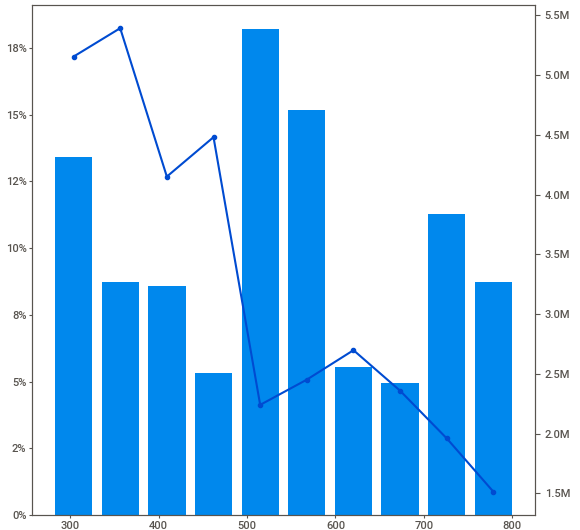
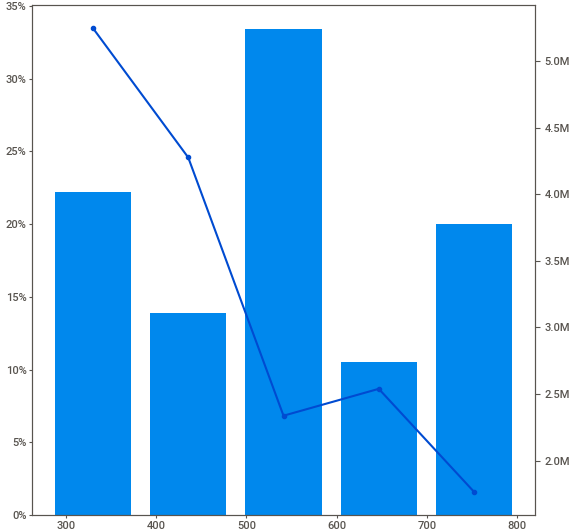
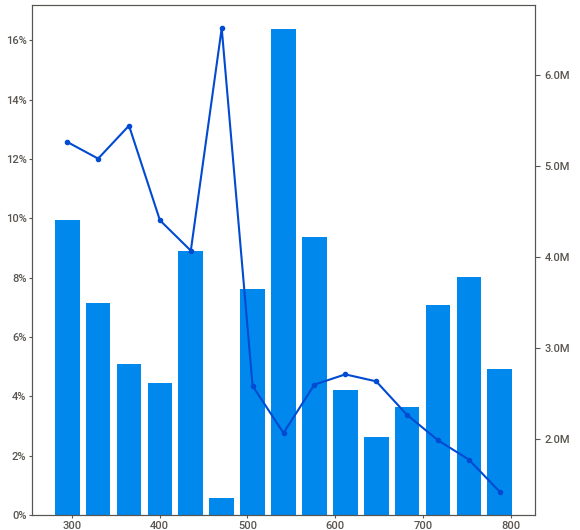
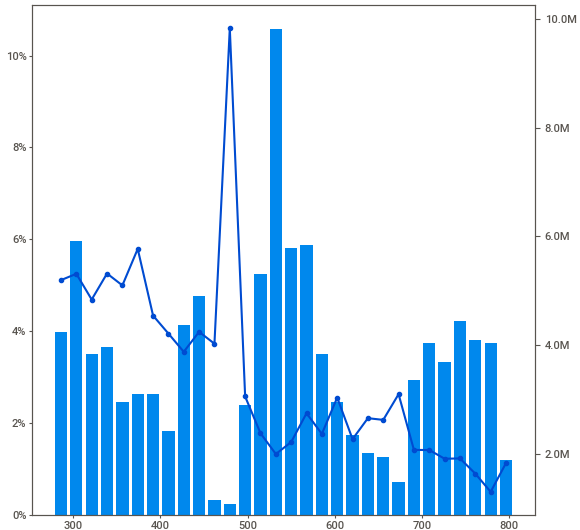
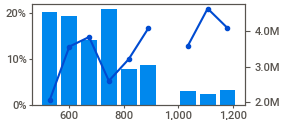
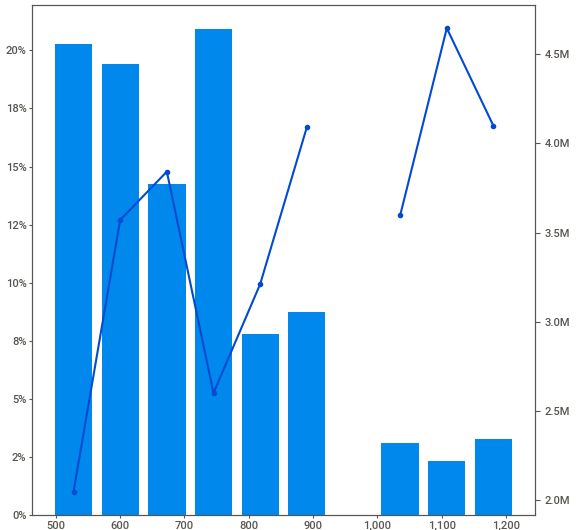
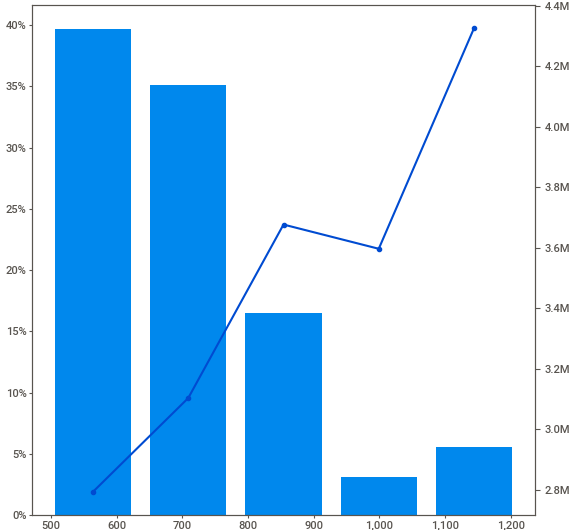
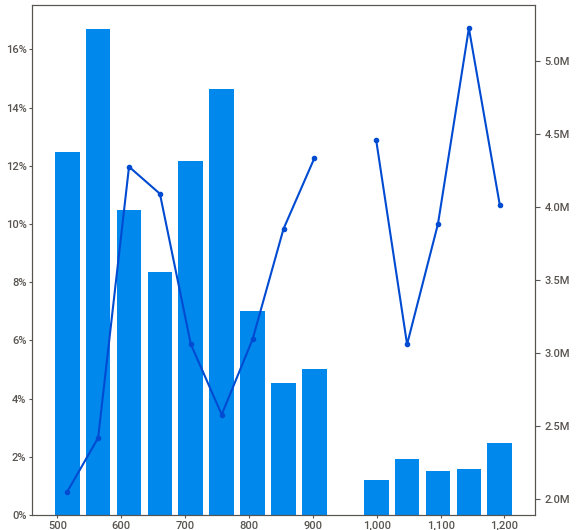
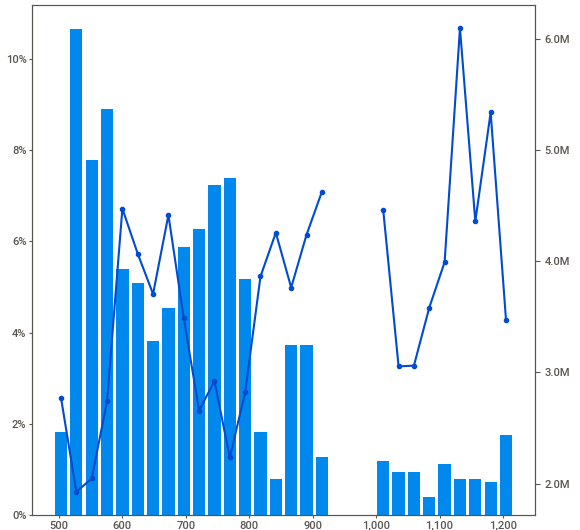
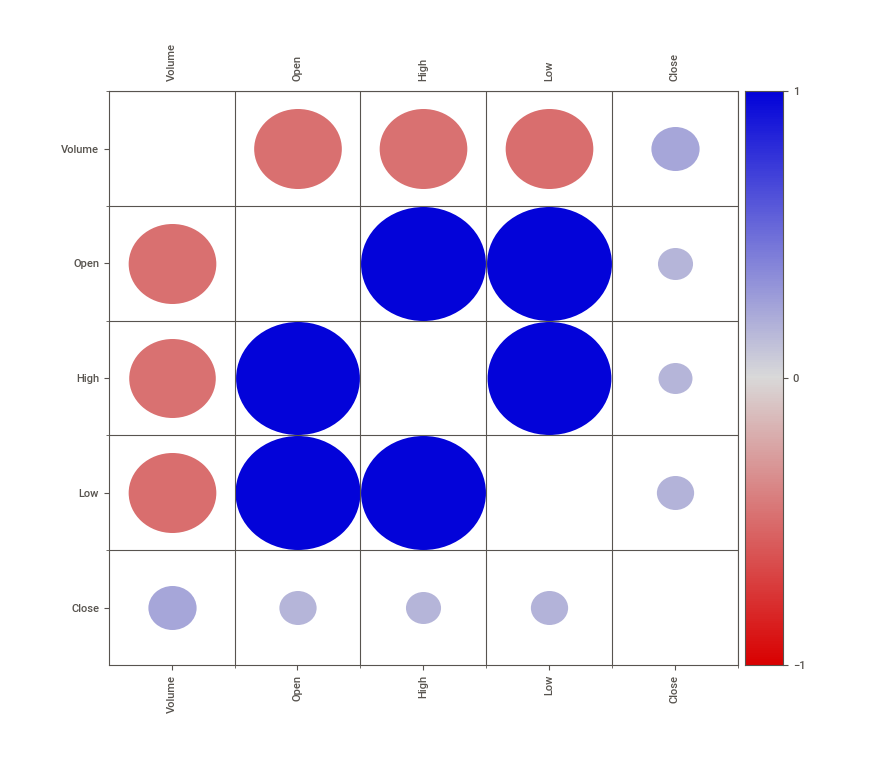
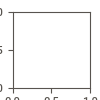

In [66]:
report.show_notebook()

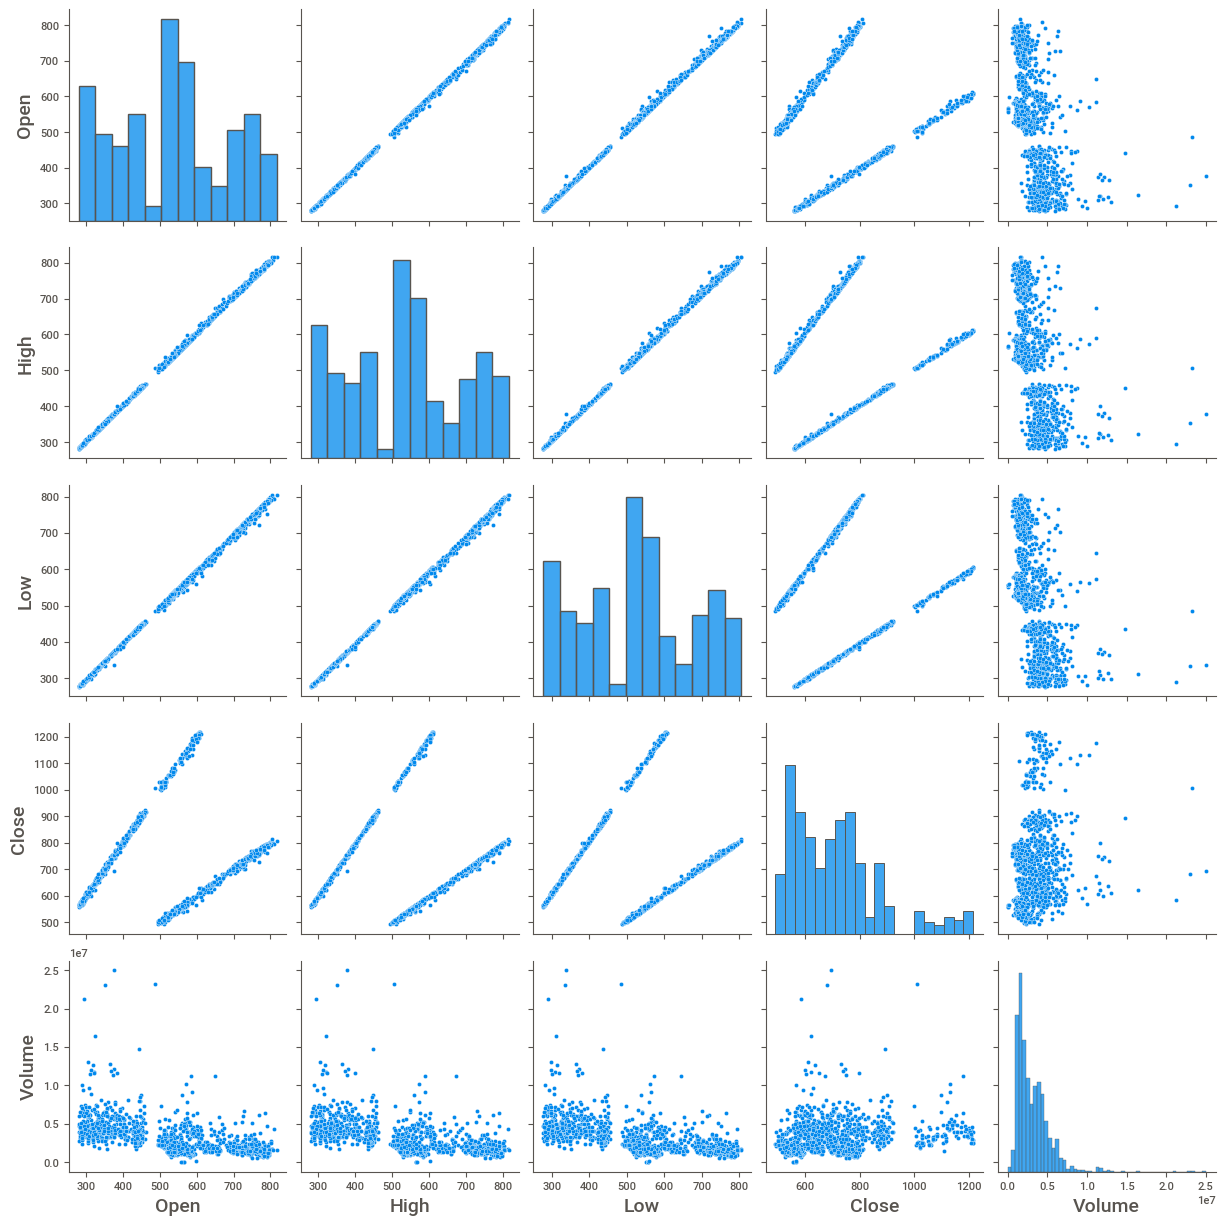

In [67]:
#Pair Grid
sns.pairplot(googledata_df)

In [68]:
print(googledata_df.shape)

(1258, 6)


In [69]:
googledata_df.describe()

Open         High          Low        Close        Volume
count  1258.000000  1258.000000  1258.000000  1258.000000  1.258000e+03
mean    533.709833   537.880223   529.007409   712.669666  3.158107e+06
std     151.904442   153.008811   150.552807   164.752591  2.273726e+06
min     279.120000   281.210000   277.220000   491.200000  7.900000e+03
25%     404.115000   406.765000   401.765000   576.740000  1.621700e+06
50%     537.470000   540.750000   532.990000   695.675000  2.566150e+06
75%     654.922500   662.587500   644.800000   782.105000  4.122500e+06
max     816.680000   816.680000   805.140000  1216.830000  2.497790e+07

In [70]:
googledata_df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

## Investigating Outliers

2012-01-03    1
2015-04-30    1
2015-05-11    1
2015-05-08    1
2015-05-07    1
             ..
2013-09-04    1
2013-09-03    1
2013-08-30    1
2013-08-29    1
2016-12-30    1
Name: Date, Length: 1258, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


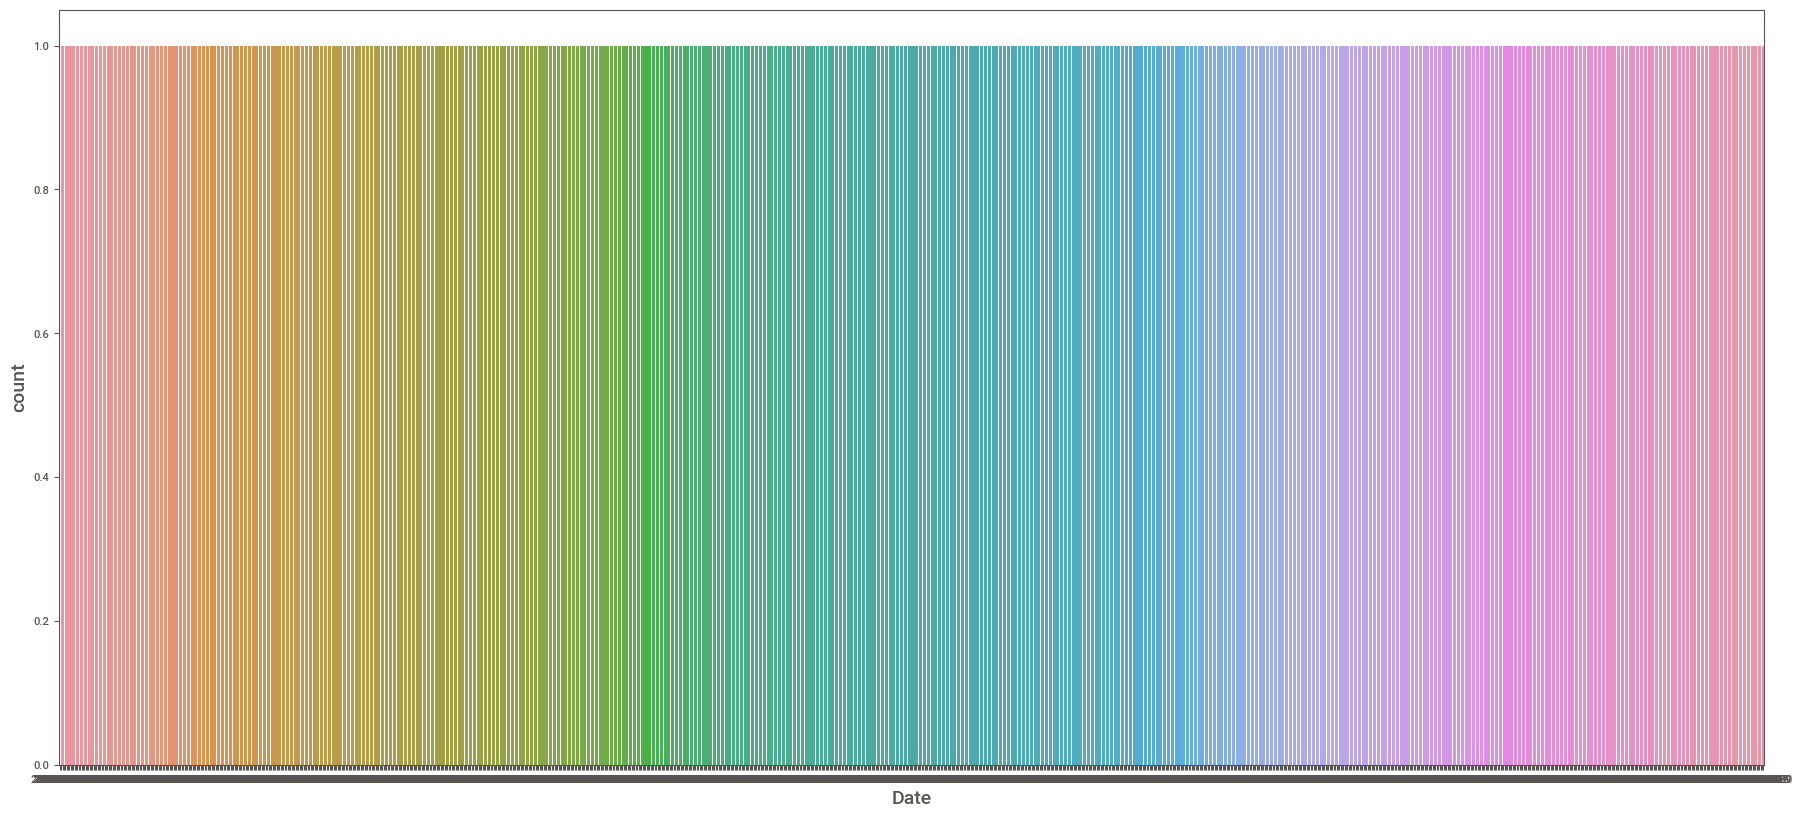

780.00    3
306.35    3
579.41    2
521.08    2
441.08    2
         ..
446.43    1
445.58    1
447.02    1
442.61    1
782.75    1
Name: Open, Length: 1215, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


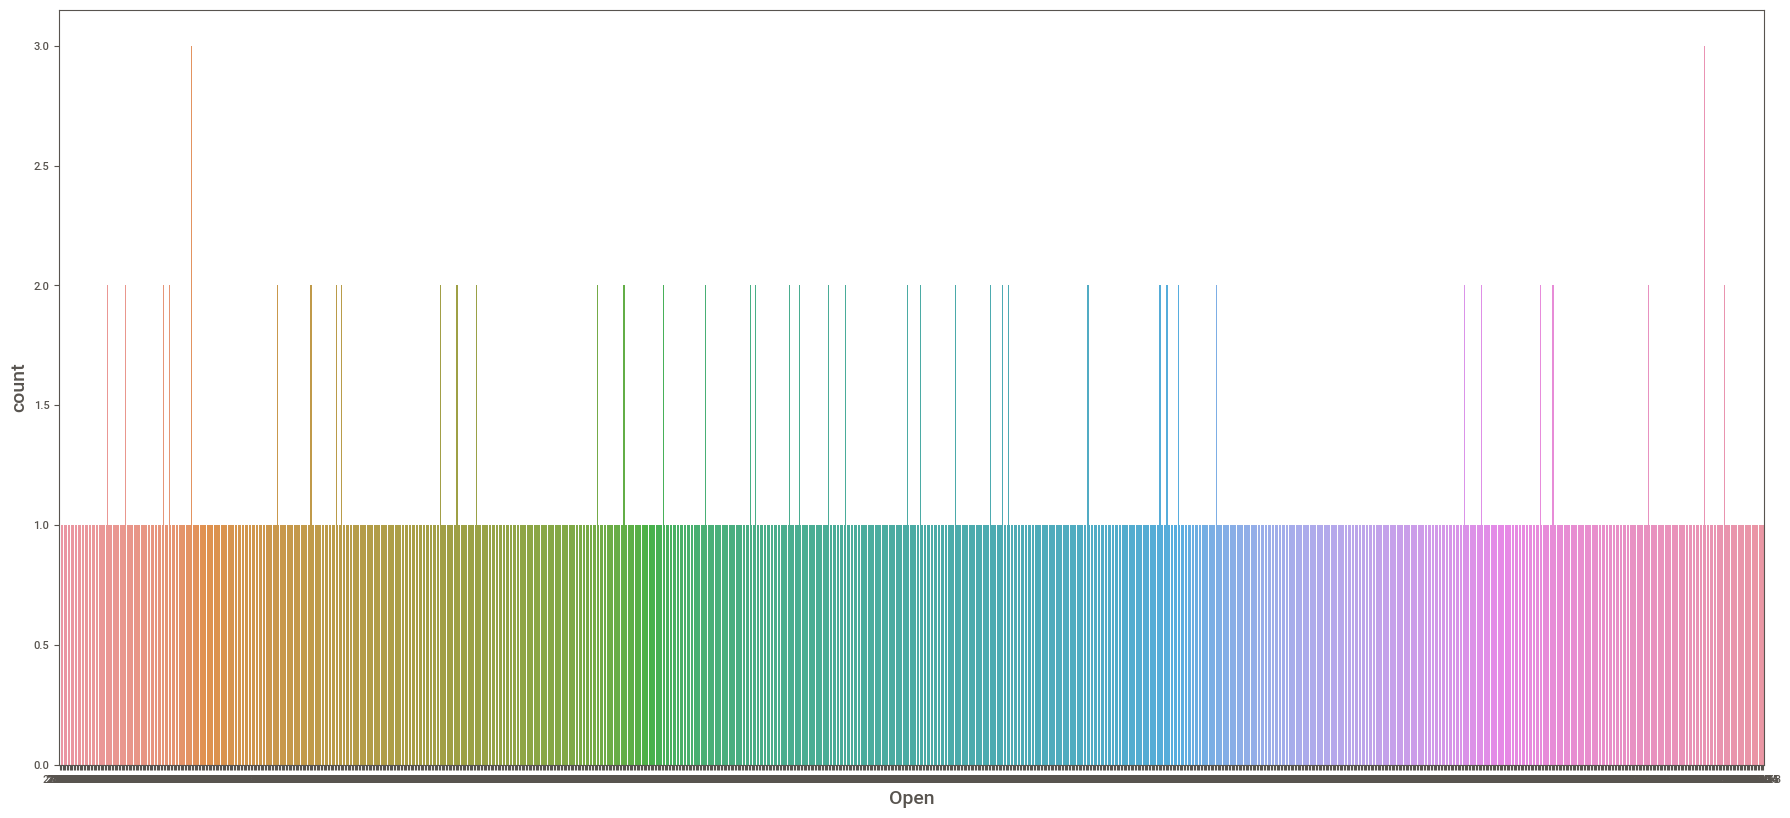

437.36    3
401.99    3
448.82    2
553.48    2
303.27    2
         ..
442.54    1
446.83    1
446.17    1
447.27    1
782.78    1
Name: High, Length: 1219, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


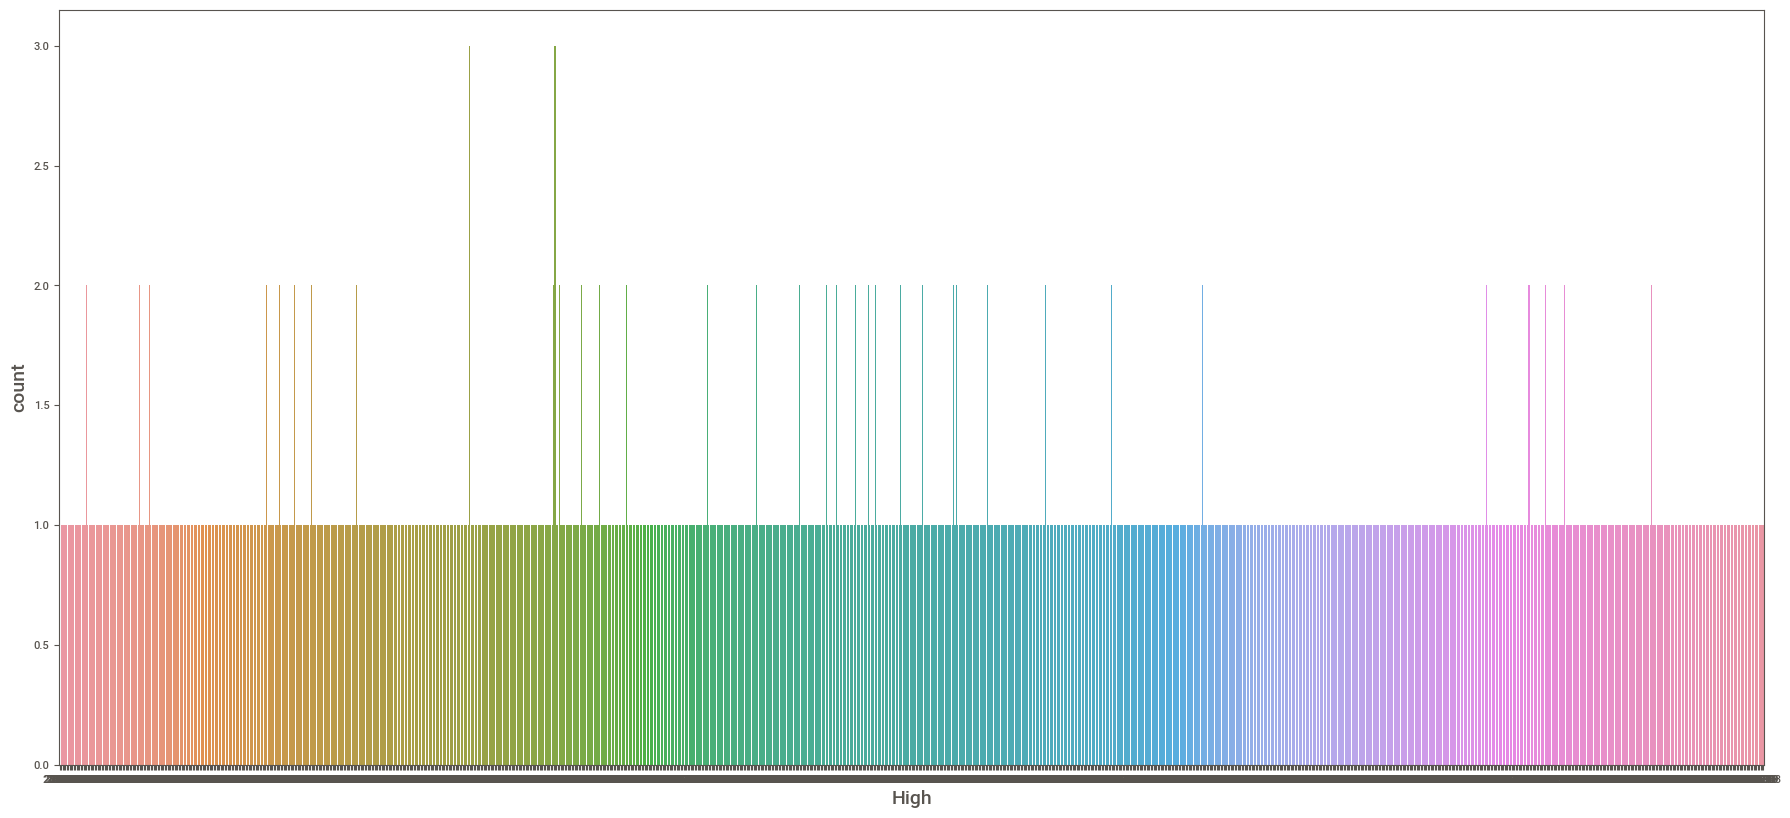

737.00    3
309.46    3
441.39    2
435.37    2
511.08    2
         ..
440.77    1
439.56    1
435.24    1
434.18    1
770.41    1
Name: Low, Length: 1223, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


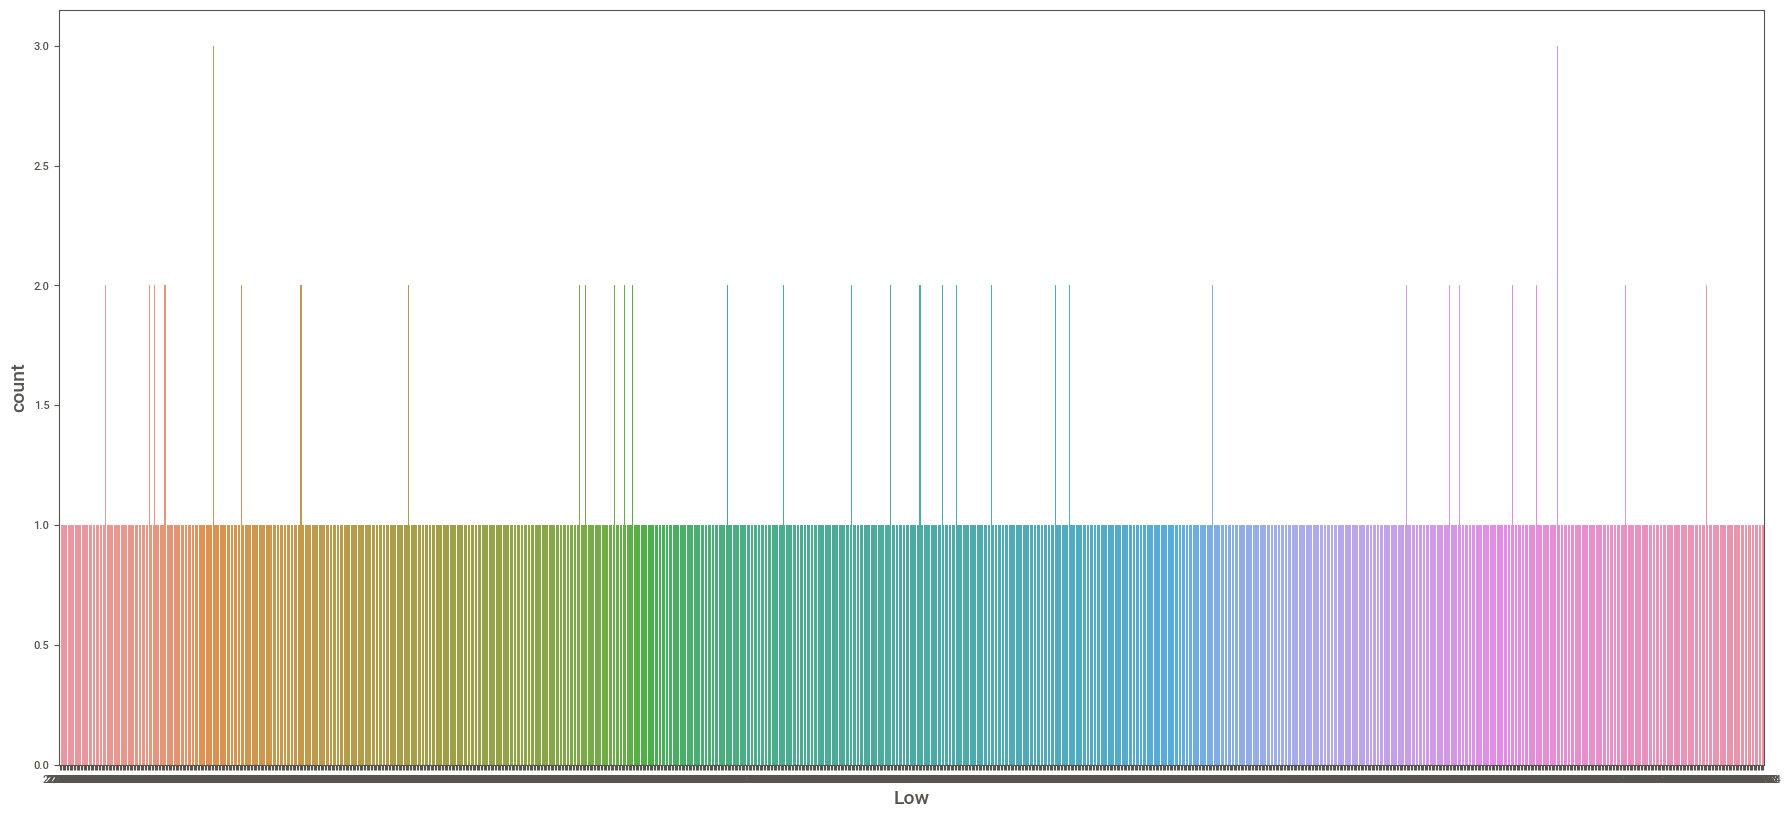

718.81    2
721.27    2
783.22    2
629.25    2
697.77    2
         ..
844.58    1
853.09    1
846.23    1
847.82    1
771.82    1
Name: Close, Length: 1241, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


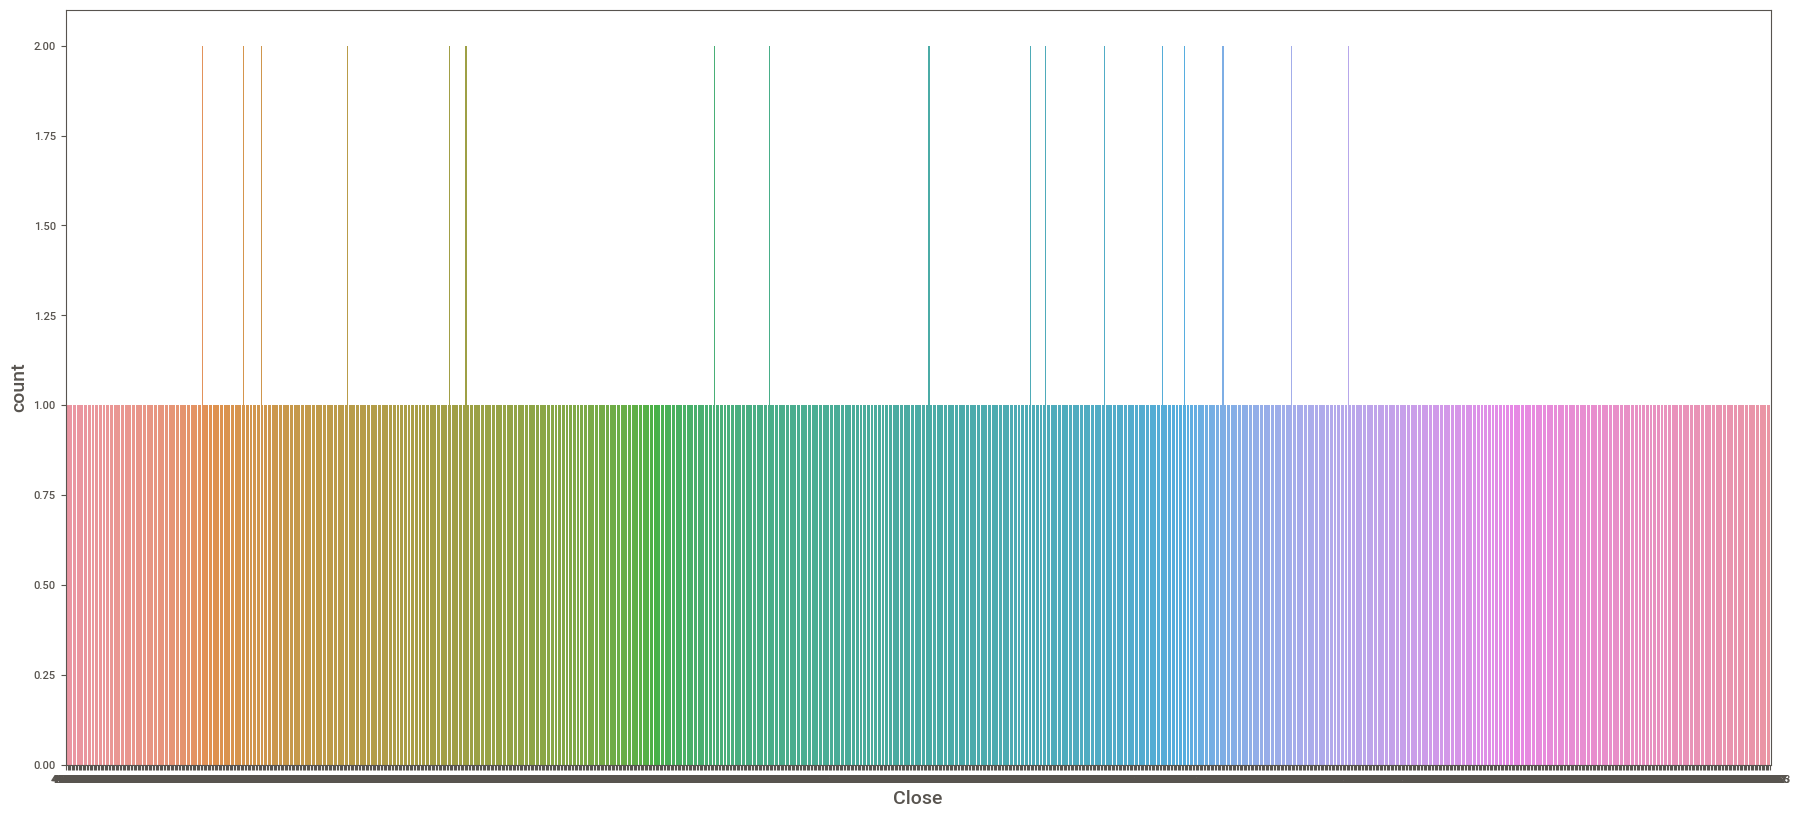

3686400.0    2
1645300.0    2
1572600.0    2
2104100.0    2
4199700.0    2
            ..
4097600.0    1
4110400.0    1
3737100.0    1
2968000.0    1
1770000.0    1
Name: Volume, Length: 1240, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


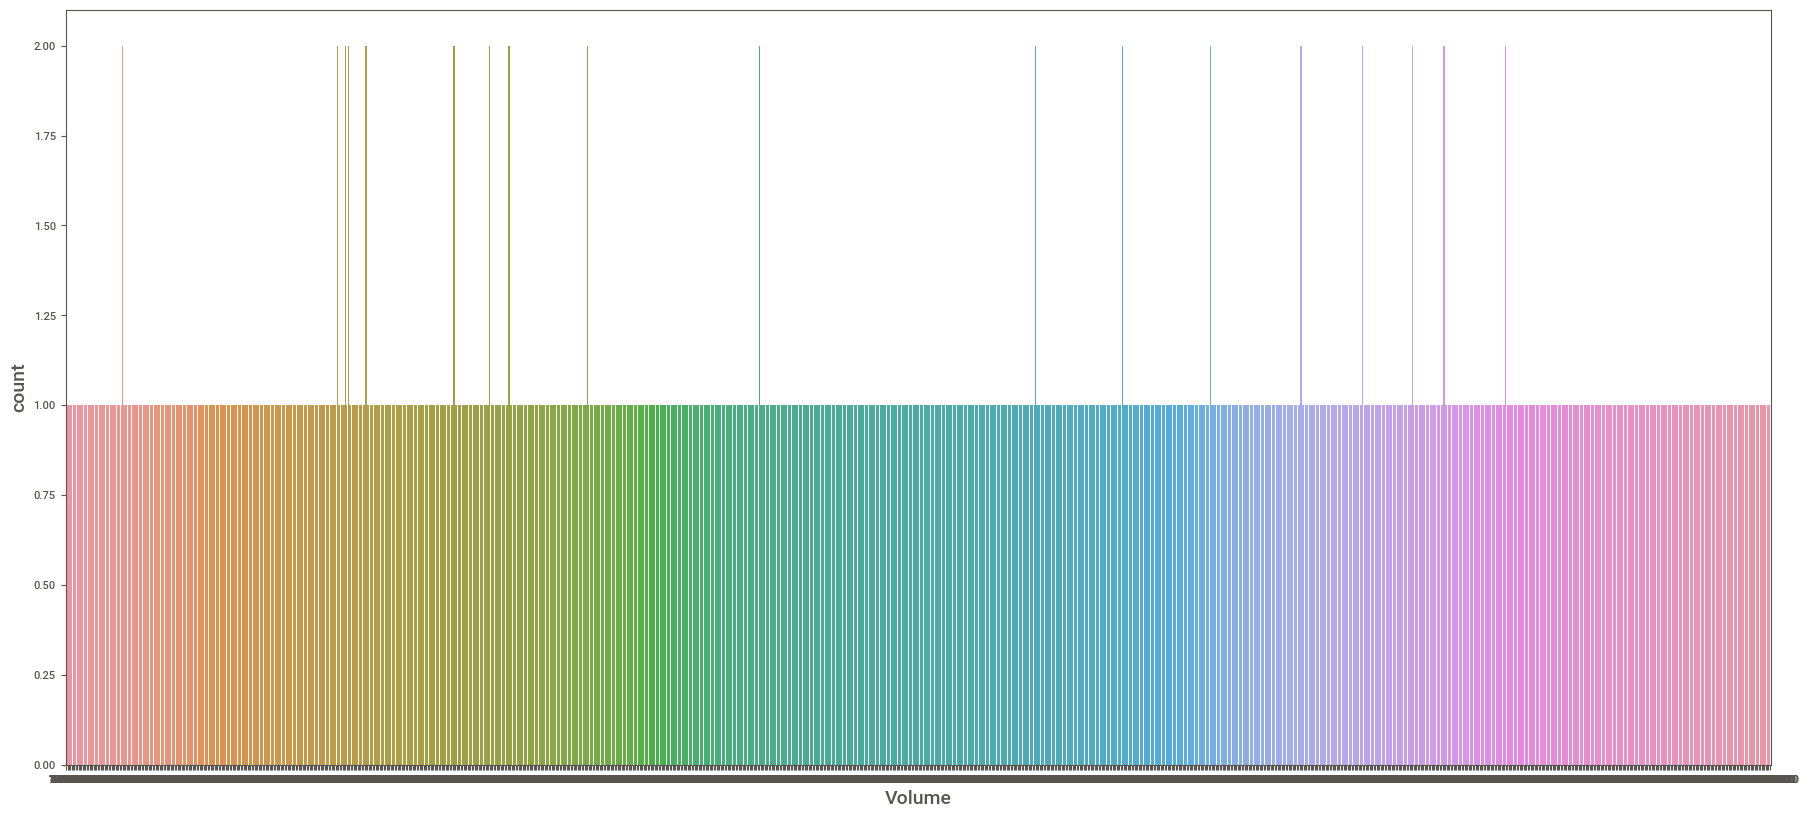

In [71]:
for columnname in columnnames:
  print(googledata_df[columnname].value_counts())
  plt.figure(figsize=(22,10))
  sns.countplot(googledata_df[columnname])
  plt.show()

In [72]:
googledata_df12= googledata_df.copy(deep=True)
googledata_df12.set_index('Date', inplace = True) #Set the date to the index
googledata_df12.head(12)

Open    High     Low   Close      Volume
Date                                                  
2012-01-03  325.25  332.83  324.97  663.59   7380500.0
2012-01-04  331.27  333.87  329.08  666.45   5749400.0
2012-01-05  329.83  330.75  326.89  657.21   6590300.0
2012-01-06  328.34  328.77  323.68  648.24   5405900.0
2012-01-09  322.04  322.29  309.46  620.76  11688800.0
2012-01-10  313.70  315.72  307.30  621.43   8824000.0
2012-01-11  310.59  313.52  309.40  624.25   4817800.0
2012-01-12  314.43  315.26  312.08  627.92   3764400.0
2012-01-13  311.96  312.30  309.37  623.28   4631800.0
2012-01-17  314.81  314.81  311.67  626.86   3832800.0
2012-01-18  312.14  315.82  309.90  631.18   5544000.0
2012-01-19  319.30  319.30  314.55  637.82  12657800.0

In [73]:
columnnames =['Open', 'High', 'Low', 'Close']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


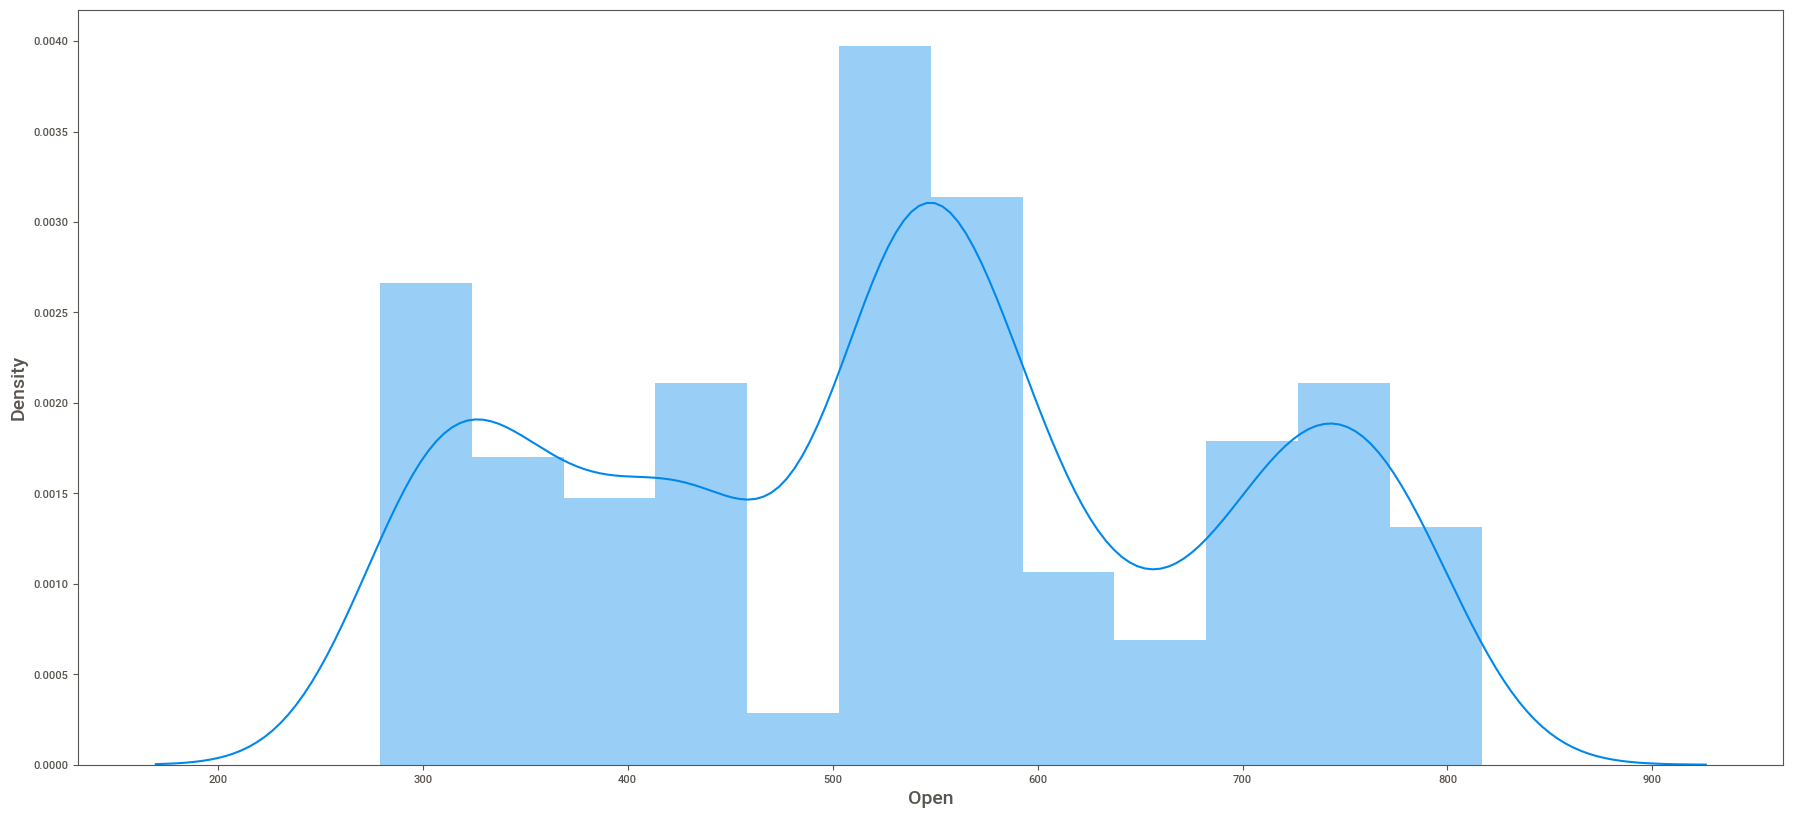

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


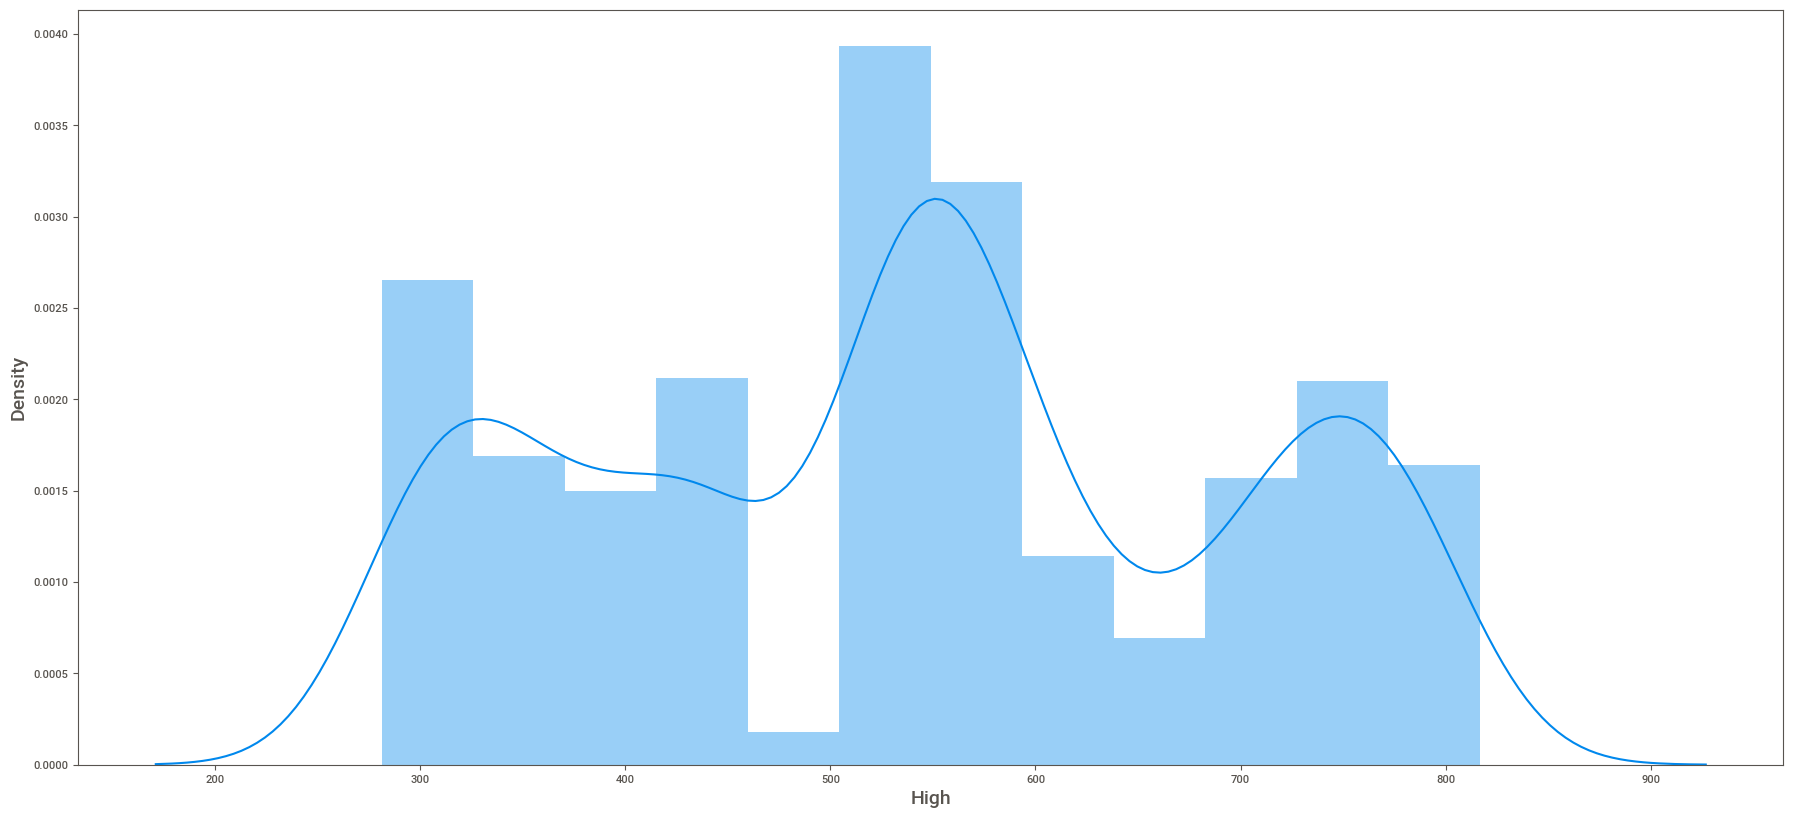

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


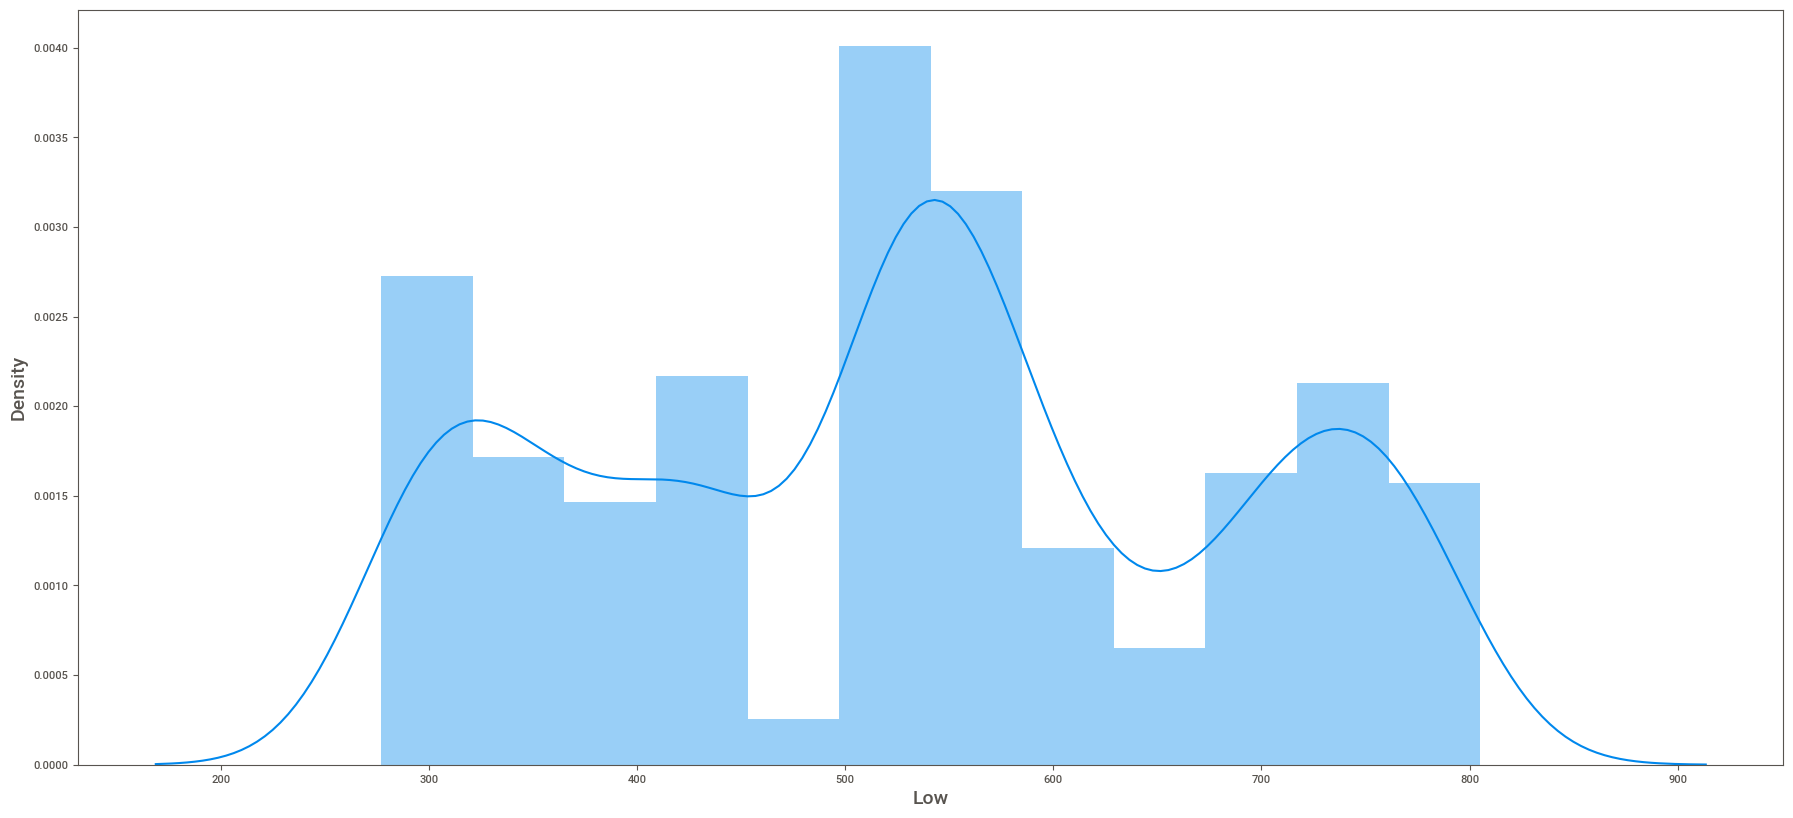

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


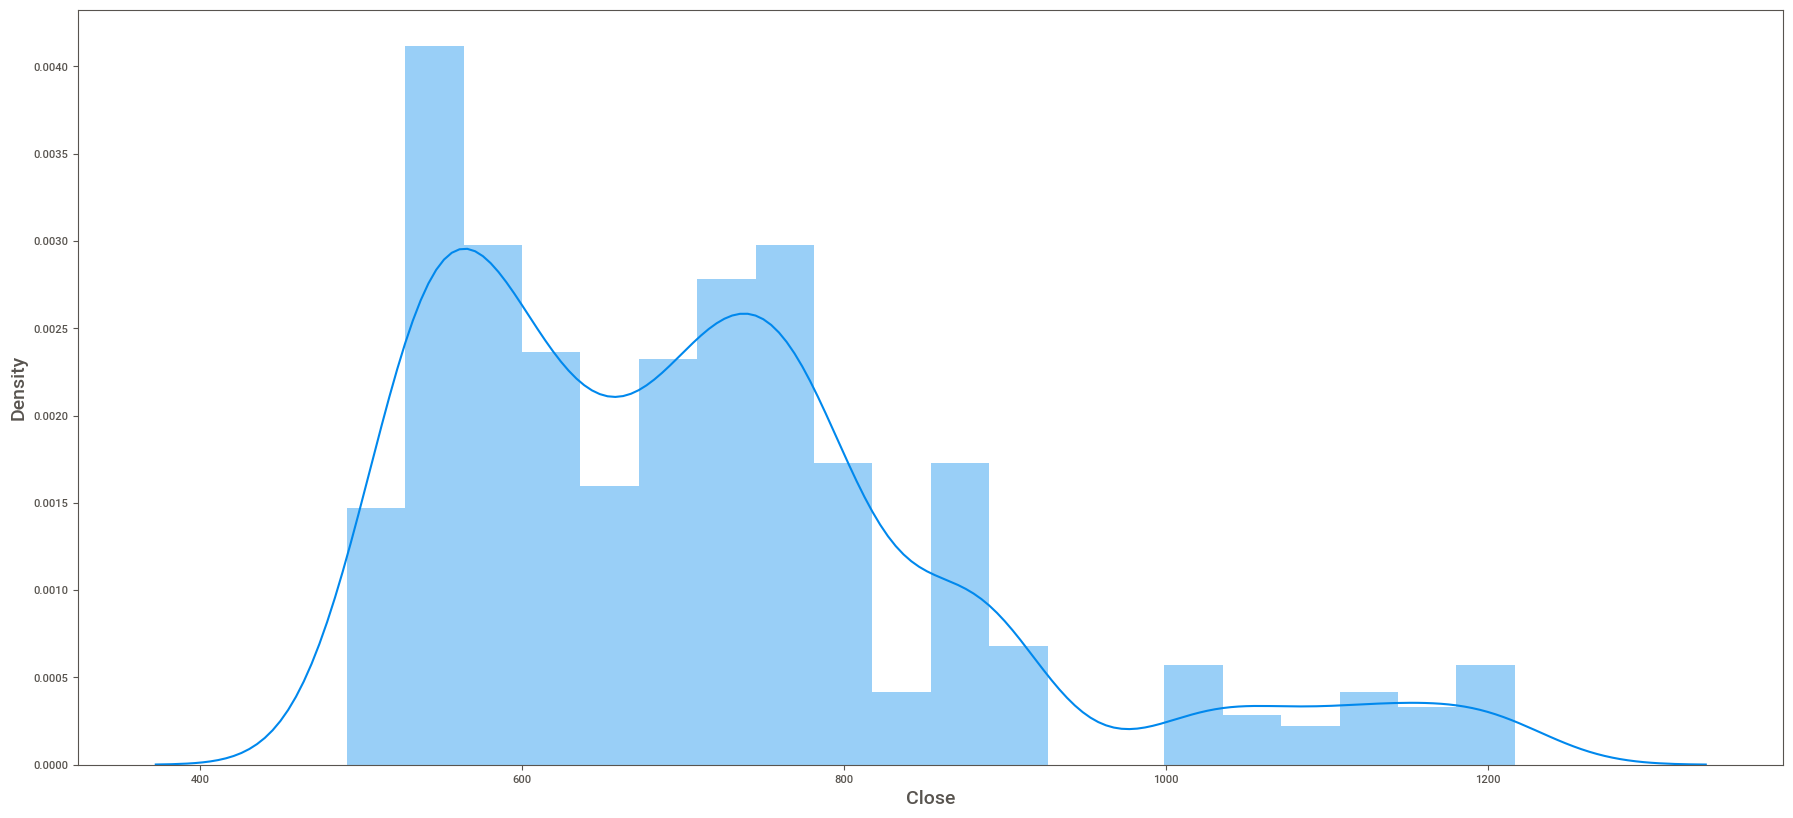

In [74]:
for columnname in columnnames:
  #print(googledata_df12[columnname].value_counts())
  plt.figure(figsize=(22,10))
  sns.distplot(googledata_df12[columnname])
  plt.show()

In [75]:
columnnames =list(googledata_df12.columns)

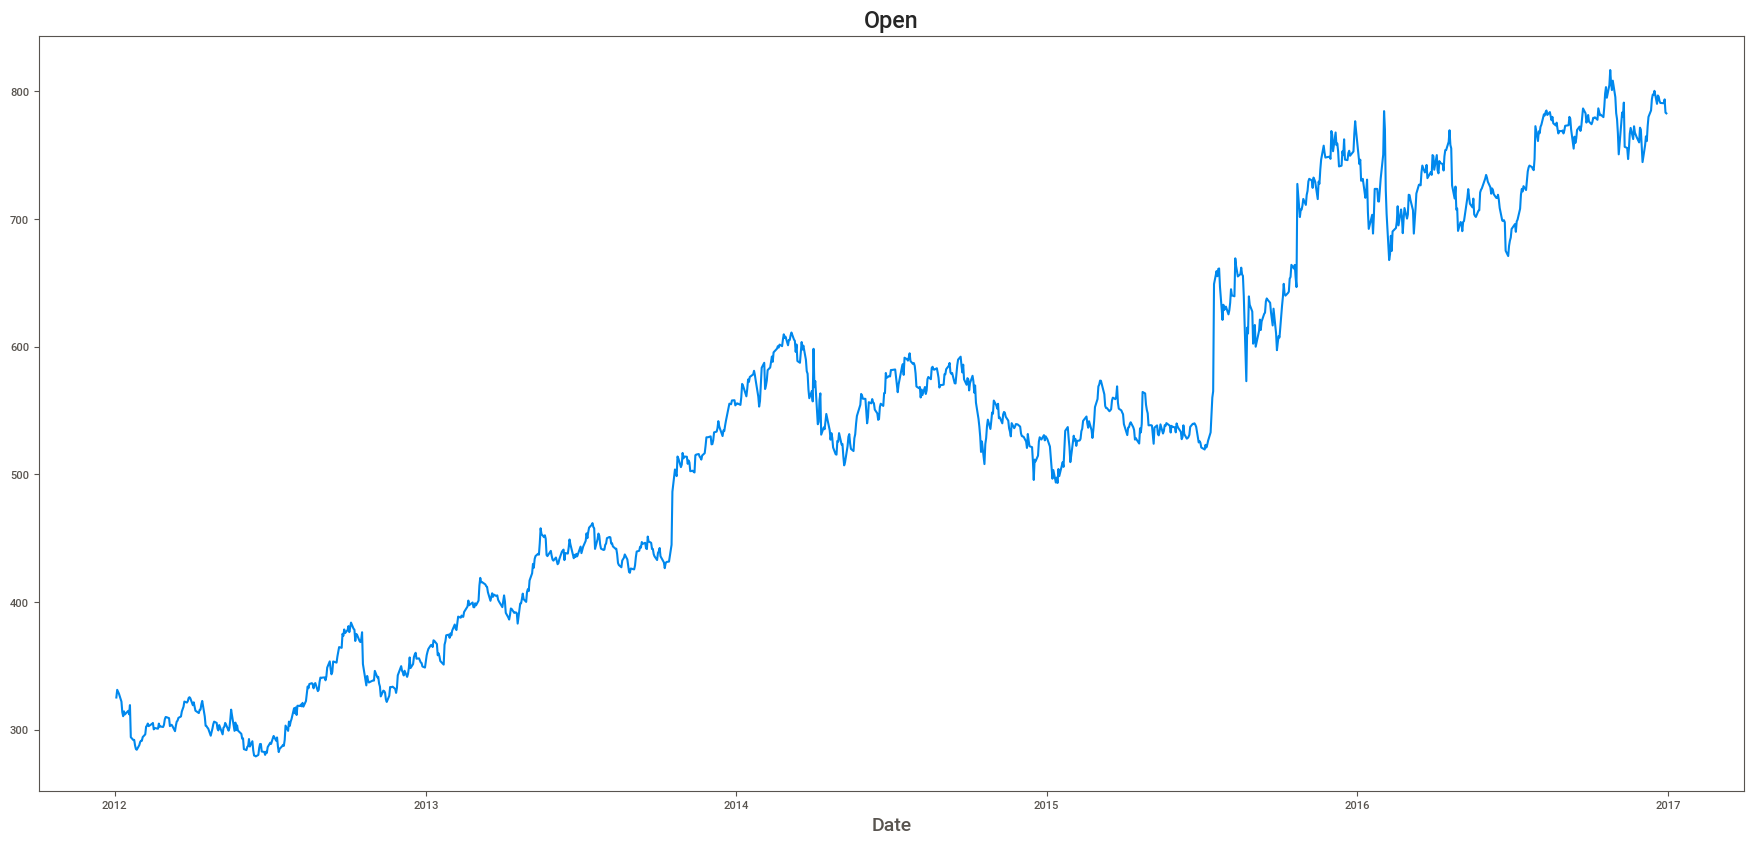

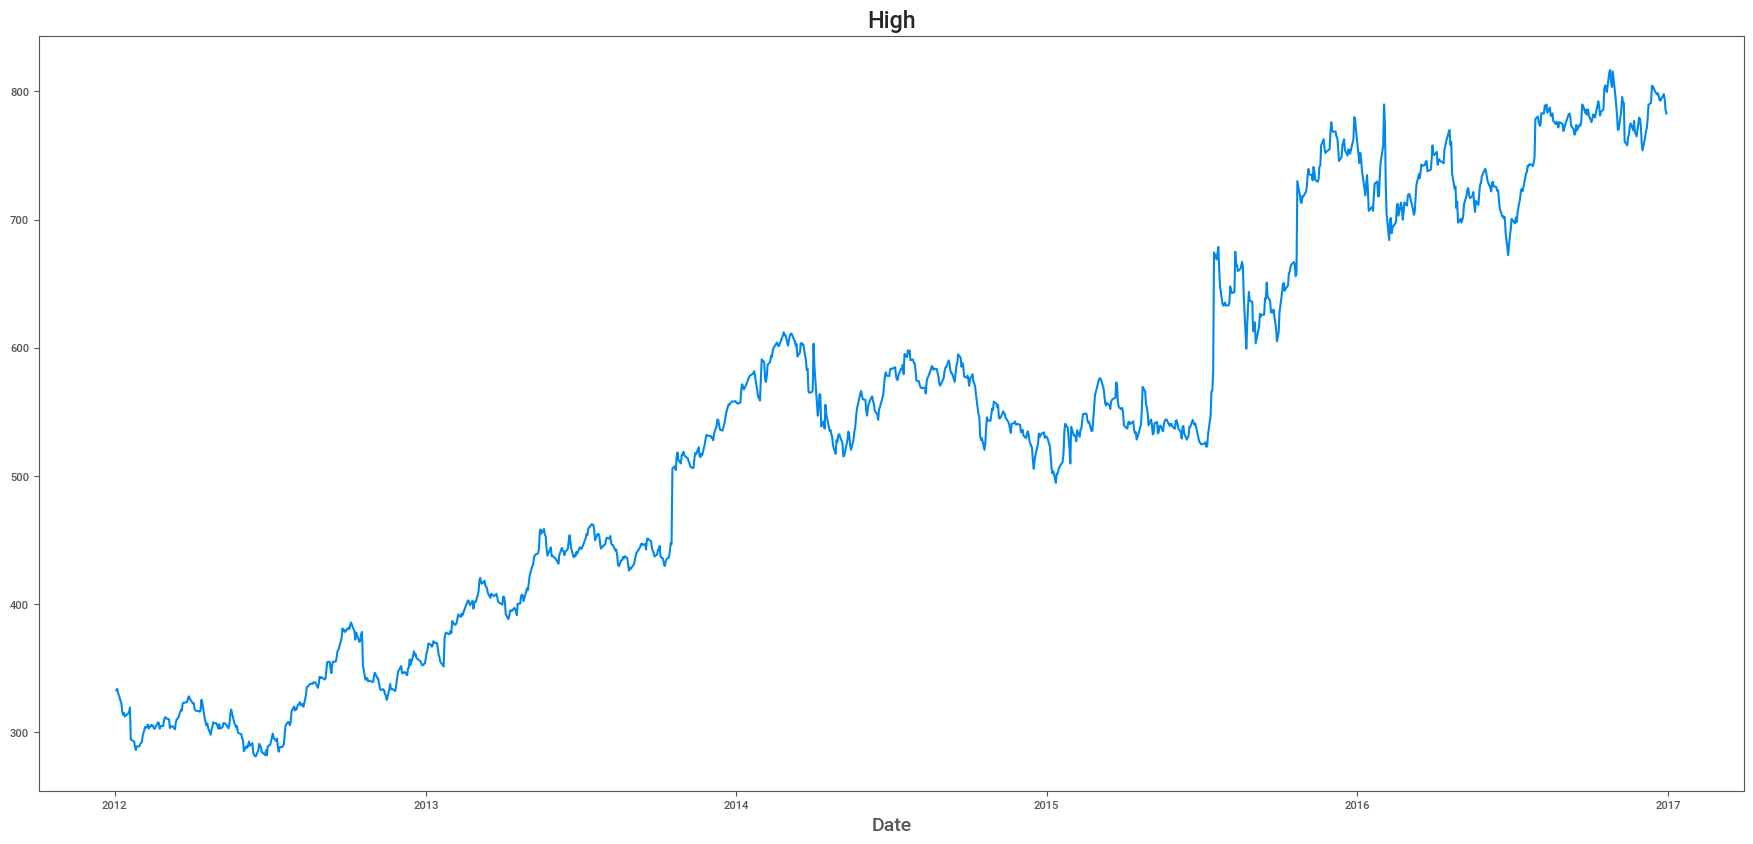

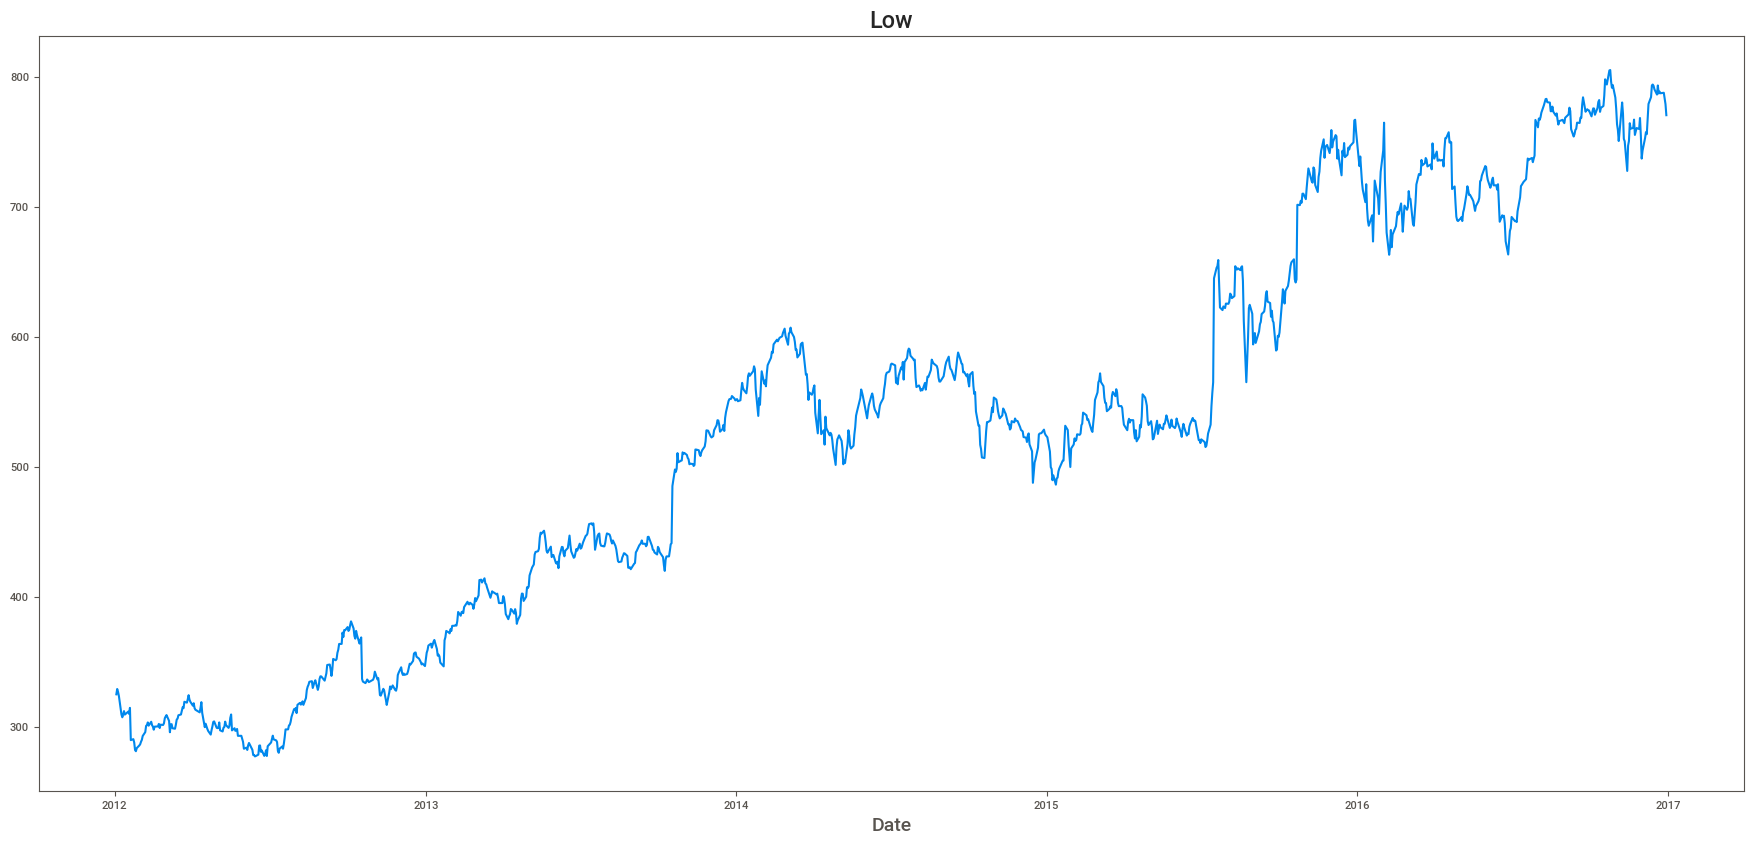

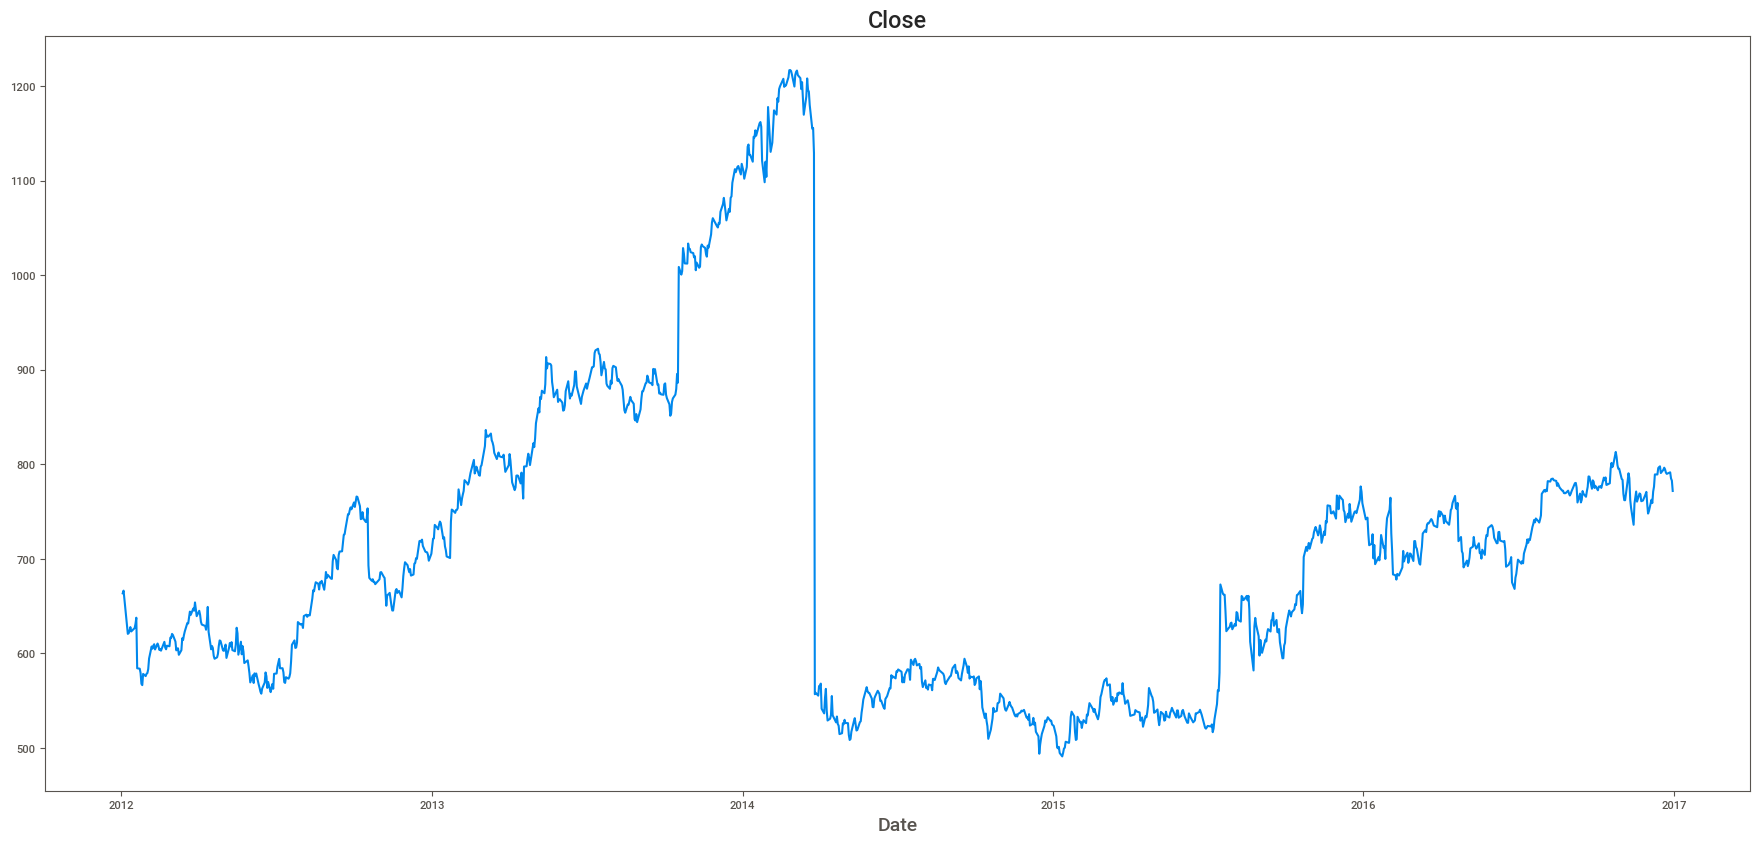

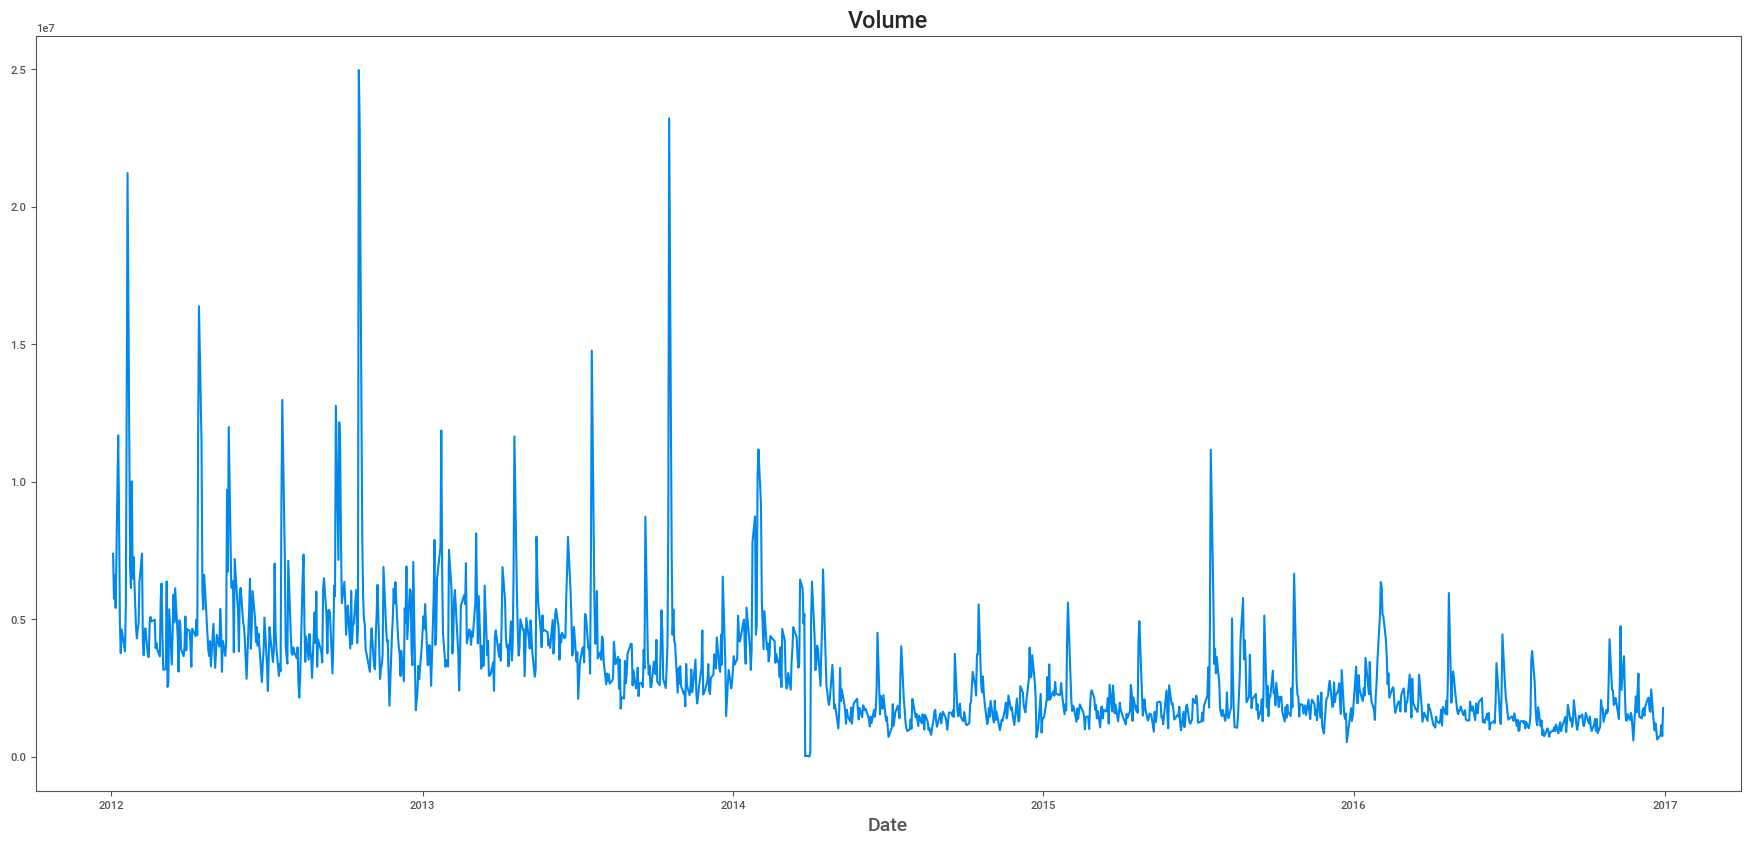

In [76]:
for columnname in columnnames:
  plt.figure(figsize=(22,10))
  googledata_df12[columnname].plot()
  plt.title(columnname)
  plt.show()

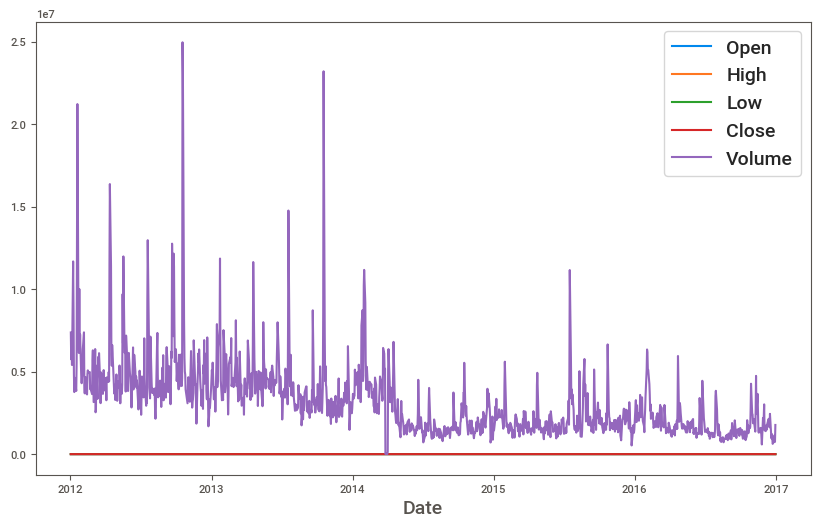

In [77]:
googledata_df12.plot()
plt.show()

## Investigating Missing Values

In [78]:
googledata_df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [79]:
googledata_df.isnull().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

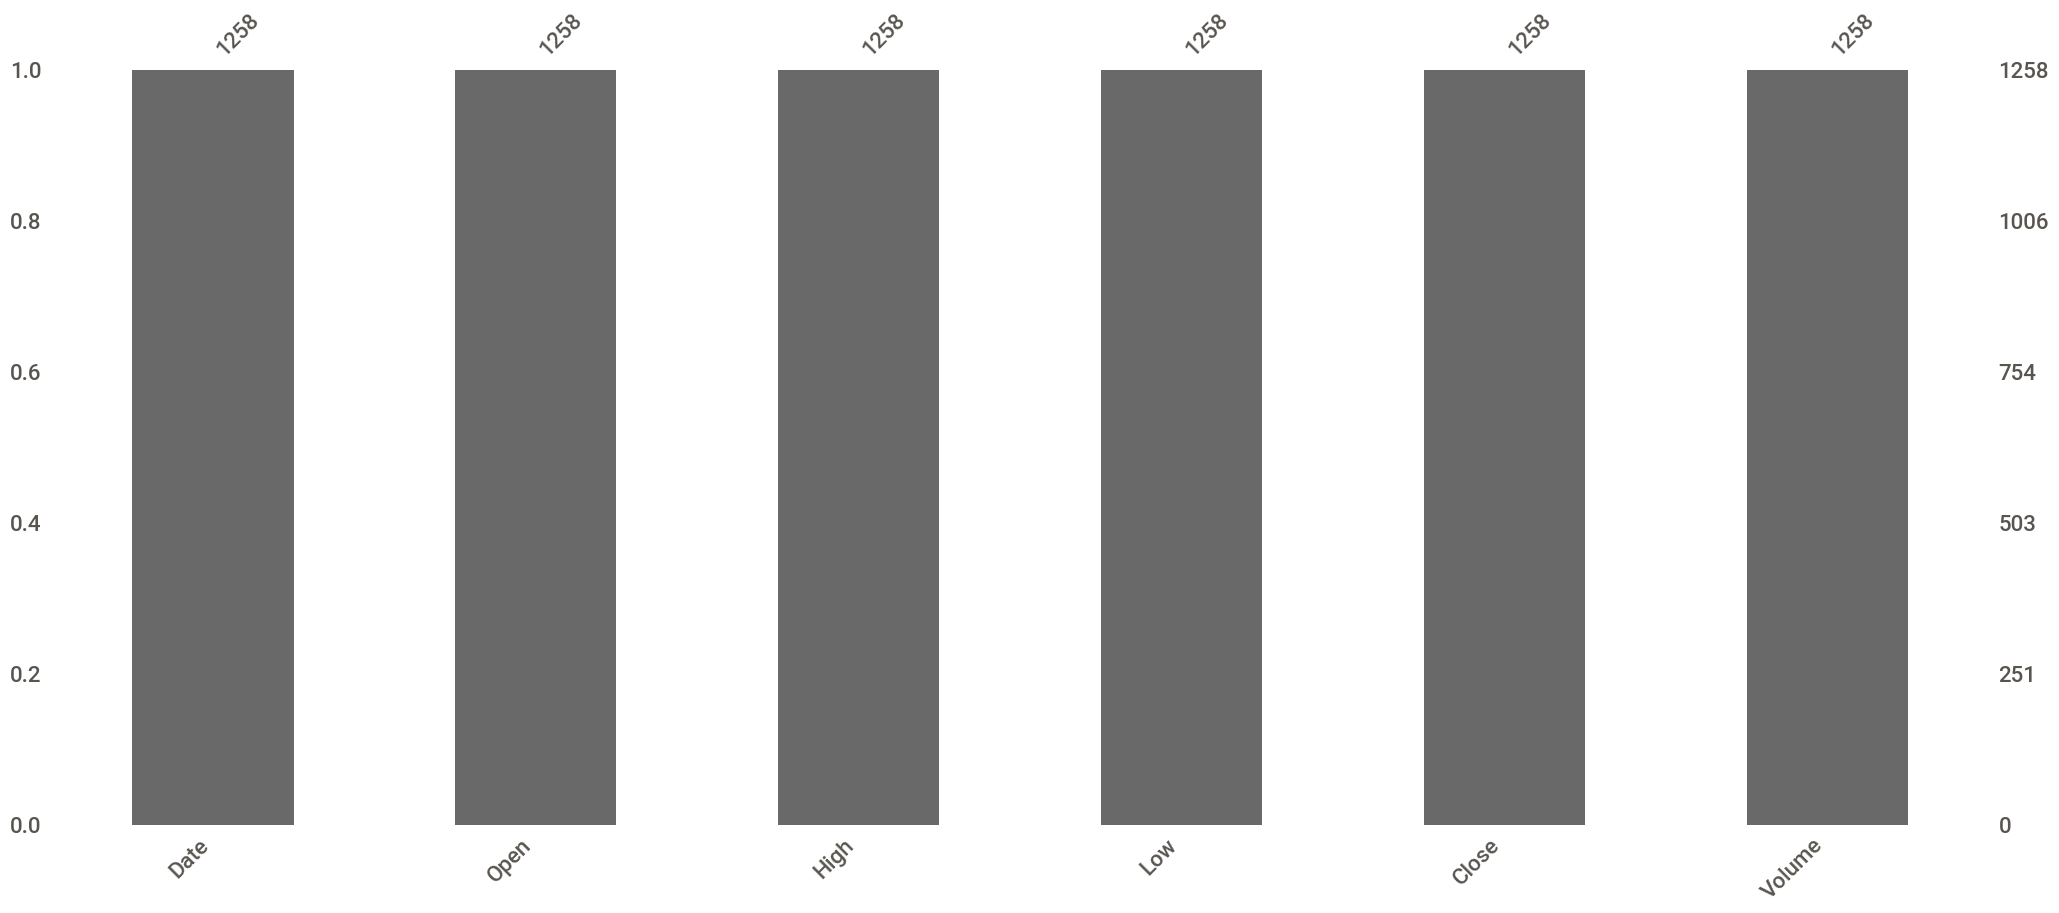

In [80]:
# Plot amount of missingness
msno.bar(googledata_df) # you can see pandas-profilin count part

plt.show()

#Data Preprocessing


*  Missing Value Treatment
*  Treating Outlier




## Missing Value Treatment

In [81]:
### Forward Fill
# Impute data DataFrame with ffill and bfill method
googledata_df_bfill_imputed = googledata_df.copy(deep=True)

googledata_df_bfill_imputed.fillna(method='ffill',inplace=True)
googledata_df_bfill_imputed.fillna(method='bfill',inplace=True)

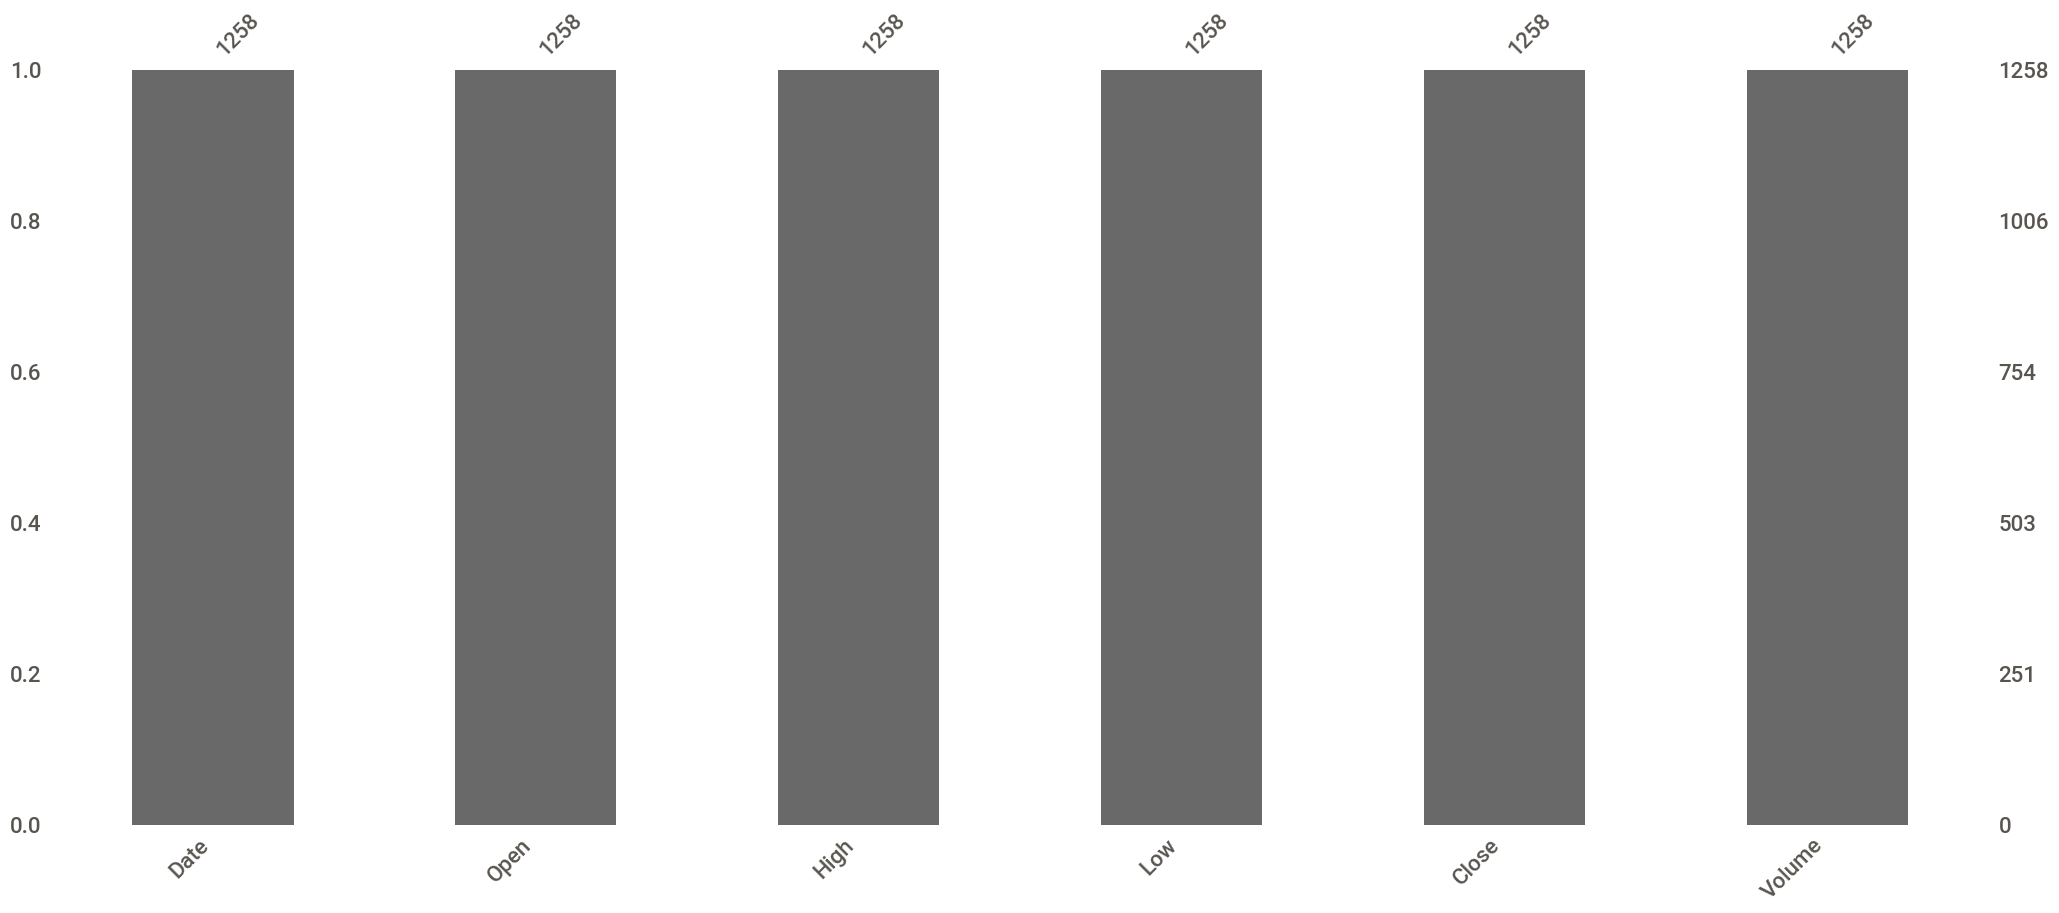

In [82]:
# Plot amount of missingness
msno.bar(googledata_df_bfill_imputed) # you can see pandas-profilin count part

plt.show()

In [83]:
googledata_df_bfill_imputed.head()

Date    Open    High     Low   Close      Volume
0  2012-01-03  325.25  332.83  324.97  663.59   7380500.0
1  2012-01-04  331.27  333.87  329.08  666.45   5749400.0
2  2012-01-05  329.83  330.75  326.89  657.21   6590300.0
3  2012-01-06  328.34  328.77  323.68  648.24   5405900.0
4  2012-01-09  322.04  322.29  309.46  620.76  11688800.0

## Convert timestemps and dataset index

In [84]:
googledata_df_bfill_imputed_transformed = googledata_df_bfill_imputed.copy(deep=True)
googledata_df_bfill_imputed_transformed.set_index('Date', inplace = True) #Set the date to the index
googledata_df_bfill_imputed_transformed.head(12)

Open    High     Low   Close      Volume
Date                                                  
2012-01-03  325.25  332.83  324.97  663.59   7380500.0
2012-01-04  331.27  333.87  329.08  666.45   5749400.0
2012-01-05  329.83  330.75  326.89  657.21   6590300.0
2012-01-06  328.34  328.77  323.68  648.24   5405900.0
2012-01-09  322.04  322.29  309.46  620.76  11688800.0
2012-01-10  313.70  315.72  307.30  621.43   8824000.0
2012-01-11  310.59  313.52  309.40  624.25   4817800.0
2012-01-12  314.43  315.26  312.08  627.92   3764400.0
2012-01-13  311.96  312.30  309.37  623.28   4631800.0
2012-01-17  314.81  314.81  311.67  626.86   3832800.0
2012-01-18  312.14  315.82  309.90  631.18   5544000.0
2012-01-19  319.30  319.30  314.55  637.82  12657800.0

In [85]:
columnnames=list(googledata_df_bfill_imputed_transformed.columns)
print(columnnames)

['Open', 'High', 'Low', 'Close', 'Volume']


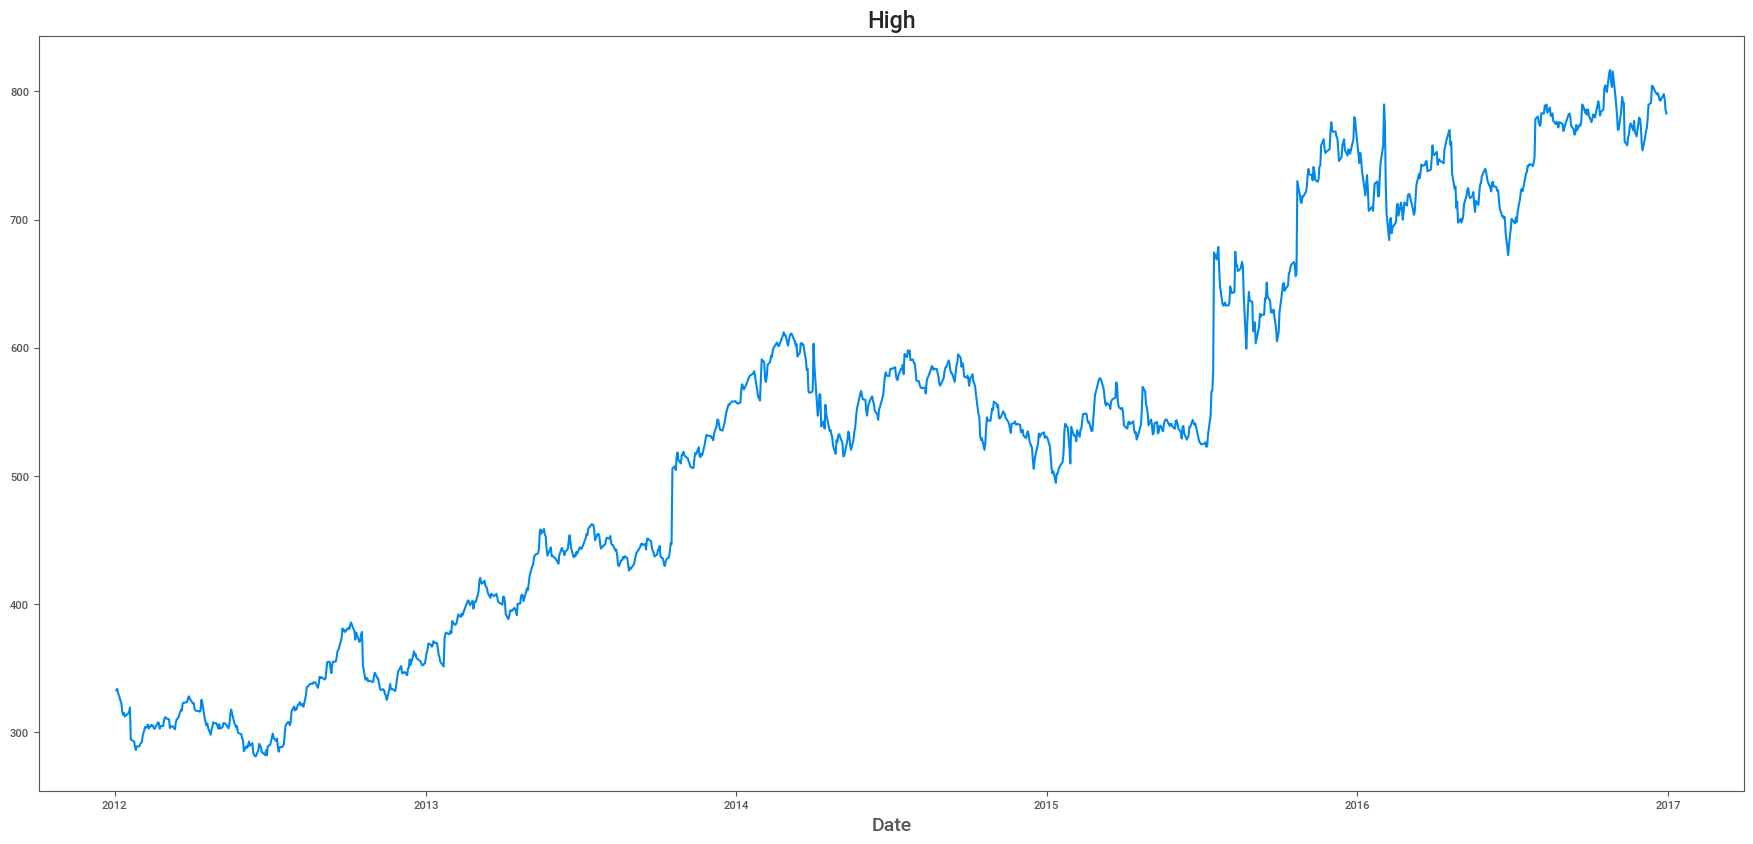

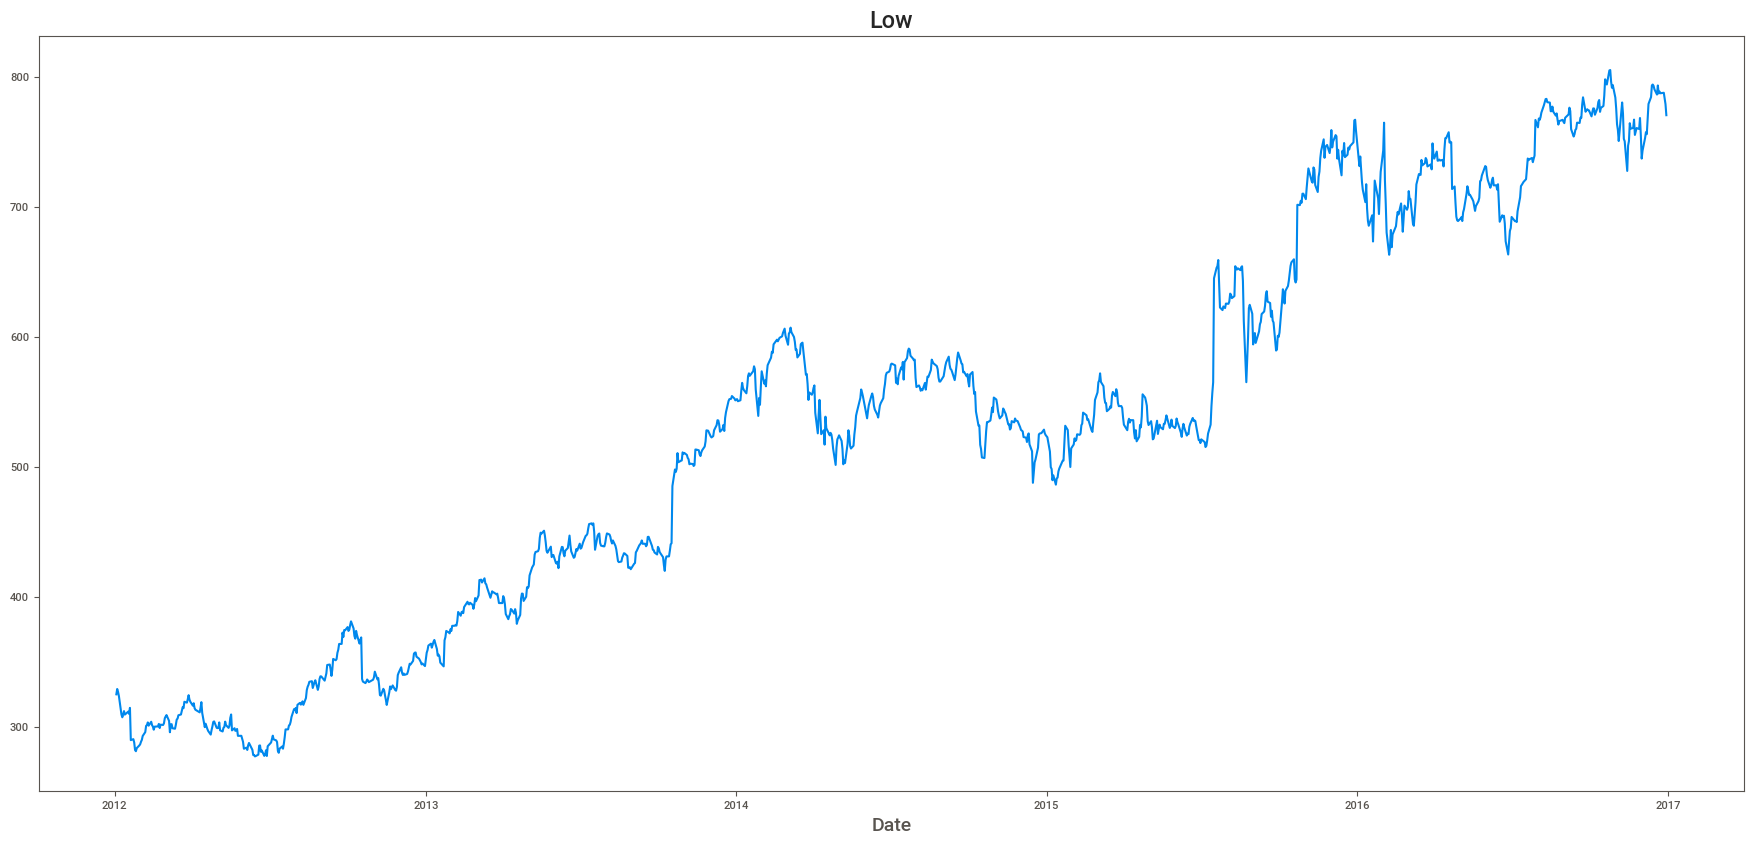

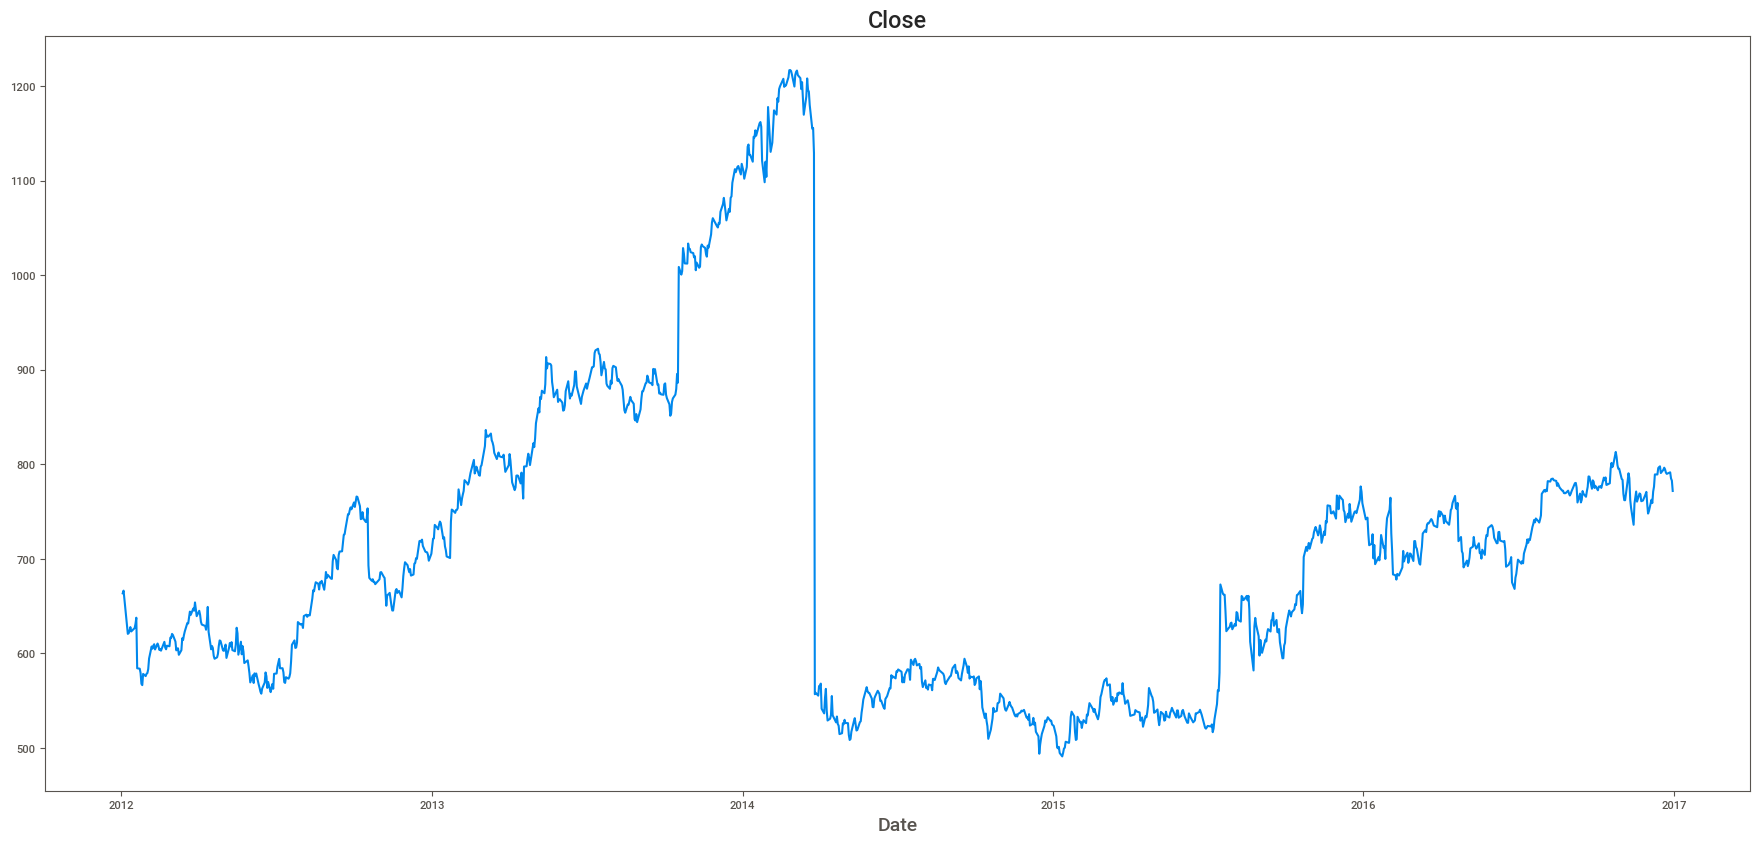

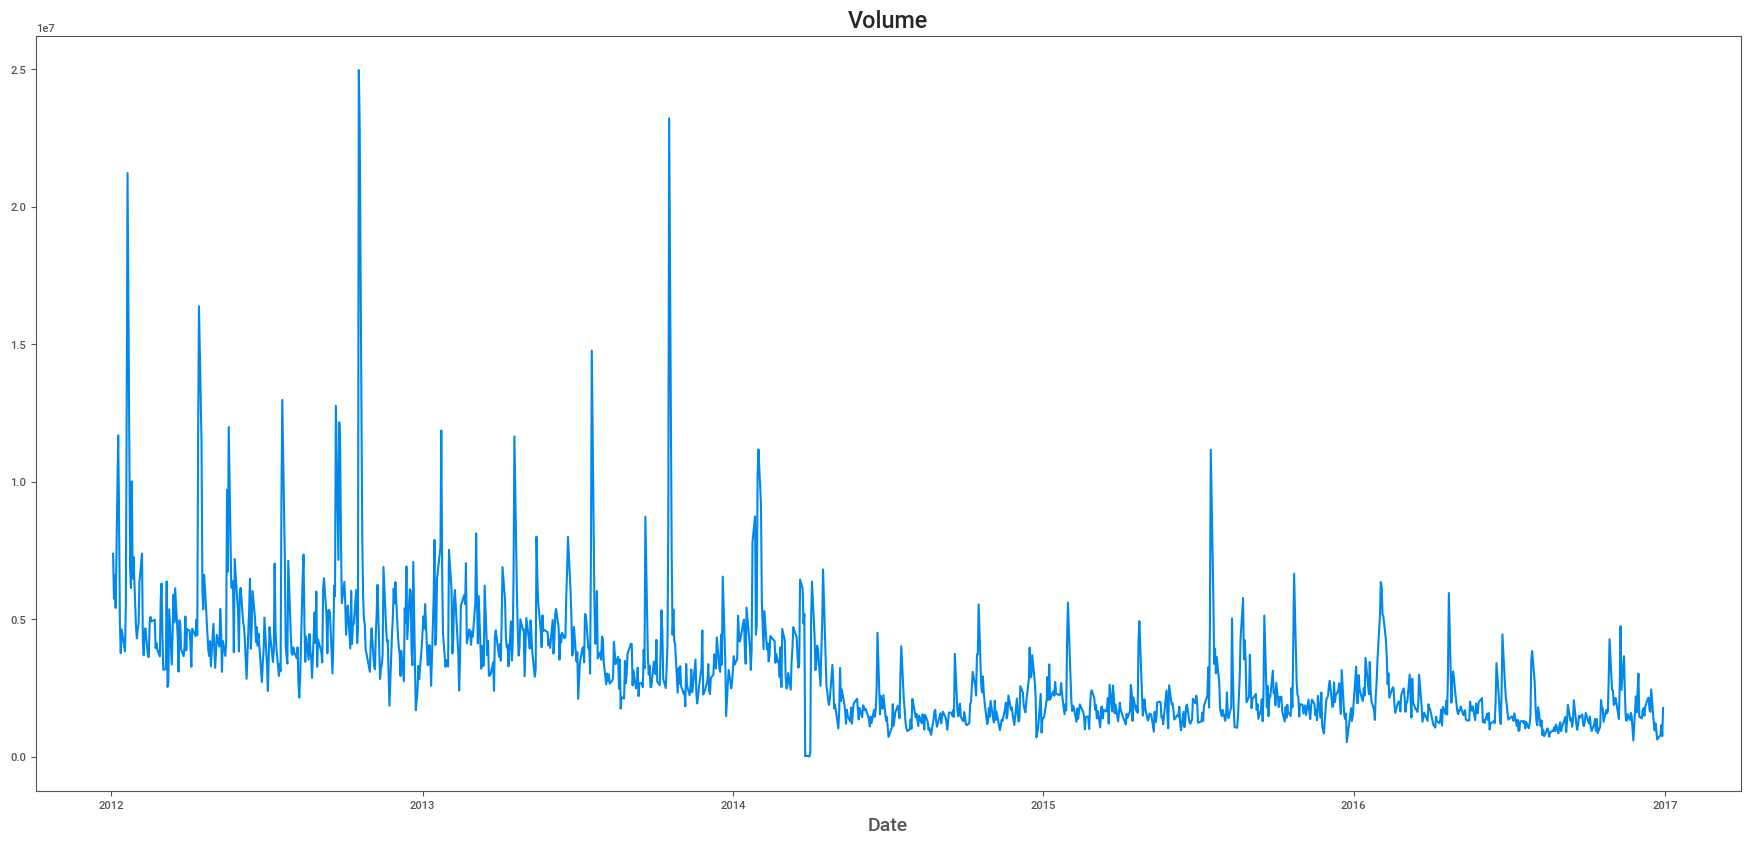

In [86]:
for columnname in columnnames[1:]:
  plt.figure(figsize=(22,10))
  googledata_df_bfill_imputed_transformed[columnname].plot()
  plt.title(columnname)
  plt.show()

In [87]:
ts = googledata_df_bfill_imputed_transformed

#Variables Selection
correlation matrix and heatmap
you can select  the Most correlated variables

In [88]:
googledata_df.corr()

Open      High       Low     Close    Volume
Open    1.000000  0.999692  0.999498  0.125832 -0.530506
High    0.999692  1.000000  0.999480  0.124351 -0.526936
Low     0.999498  0.999480  1.000000  0.129001 -0.538273
Close   0.125832  0.124351  0.129001  1.000000  0.192357
Volume -0.530506 -0.526936 -0.538273  0.192357  1.000000

Correlation Matrix             Open      High       Low     Close    Volume
Open    1.000000  0.999692  0.999498  0.125832 -0.530506
High    0.999692  1.000000  0.999480  0.124351 -0.526936
Low     0.999498  0.999480  1.000000  0.129001 -0.538273
Close   0.125832  0.124351  0.129001  1.000000  0.192357
Volume -0.530506 -0.526936 -0.538273  0.192357  1.000000


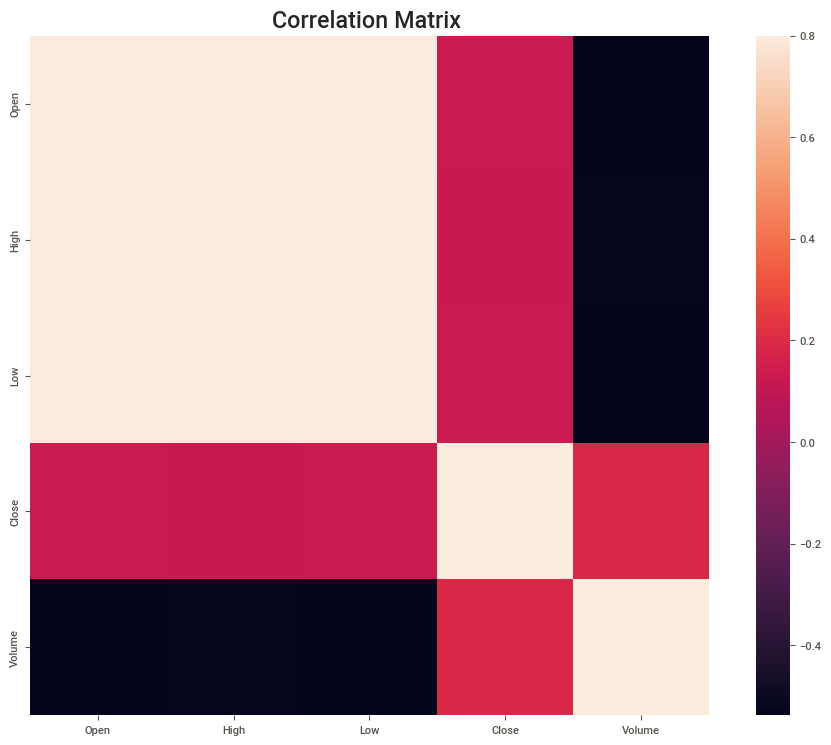

cols Index(['Volume', 'Close', 'High', 'Open', 'Low'], dtype='object')


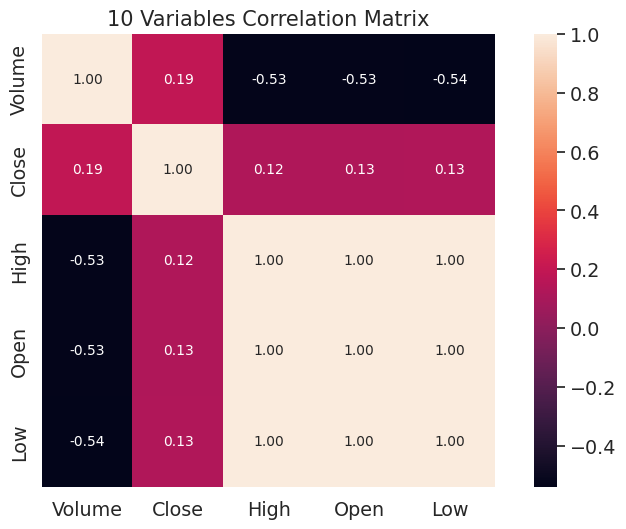

  Most Correlated Features
0                   Volume
1                    Close
2                     High
3                     Open
4                      Low


In [89]:
# Correlation Matrix Heatmap
corrmat = googledata_df_bfill_imputed.corr()
print("Correlation Matrix",corrmat)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.title('Correlation Matrix ')
plt.show()
# Top 10 Heatmap
k = 10  # number of variables for heatmap
cols = corrmat.nlargest(k, 'Volume')['Volume'].index
print("cols", cols)
cm = np.corrcoef(googledata_df_bfill_imputed[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                         yticklabels=cols.values, xticklabels=cols.values)
plt.title('10 Variables Correlation Matrix')
plt.show()
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
print(most_corr)
corrs = most_corr.values

In [90]:
most_corr_list=list(most_corr["Most Correlated Features"])

print(most_corr_list)


['Volume', 'Close', 'High', 'Open', 'Low']


In [91]:
ts.head()

Open    High     Low   Close      Volume
Date                                                  
2012-01-03  325.25  332.83  324.97  663.59   7380500.0
2012-01-04  331.27  333.87  329.08  666.45   5749400.0
2012-01-05  329.83  330.75  326.89  657.21   6590300.0
2012-01-06  328.34  328.77  323.68  648.24   5405900.0
2012-01-09  322.04  322.29  309.46  620.76  11688800.0

In [92]:
#ts = ts.drop("Date",axis=1)

#Data Transformation



*   Convert timestemps and dataset into time series
*   Split data into traing and testing with ratio of 0.2



In [93]:
c=ts.size
idd=c/2
idd=int(idd)

In [94]:
train_data= ts[:int(0.5*(len(ts)))]
test_data = ts[int(0.5*(len(ts))):]

In [95]:
train_data.shape

(629, 5)

In [96]:
test_data.shape

(629, 5)


# Forecasting





## ARIMA

### for "Open"

In [97]:
data=train_data['Open']

In [98]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train_data['Open'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Open   No. Observations:                  628
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2016.618
Method:                       css-mle   S.D. of innovations              6.003
Date:                Sat, 07 May 2022   AIC                           4041.237
Time:                        19:55:20   BIC                           4059.007
Sample:                             1   HQIC                          4048.140
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4086      0.233      1.754      0.080      -0.048       0.865
ar.L1.D.Open    -0.8990      0.058    -15.489      0.000      -1.013      -0.785
ma.L1.D.Open     0.8472      0.068     12.387      0.000       0.713       0.981
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1124           +0.0000j            1.1124            0.5000
MA.1           -1.1803           +0.0000j            1.1803            0.5000
-----------------------------------------------------------------------------
"""

In [99]:
residuals = pd.DataFrame(model_fit.resid)
residuals.head()

0
Date                
2012-01-04  5.611401
2012-01-05 -1.492958
2012-01-06 -2.307897
2012-01-09 -6.473659
2012-01-10 -9.321955

<Figure size 2200x1000 with 0 Axes>

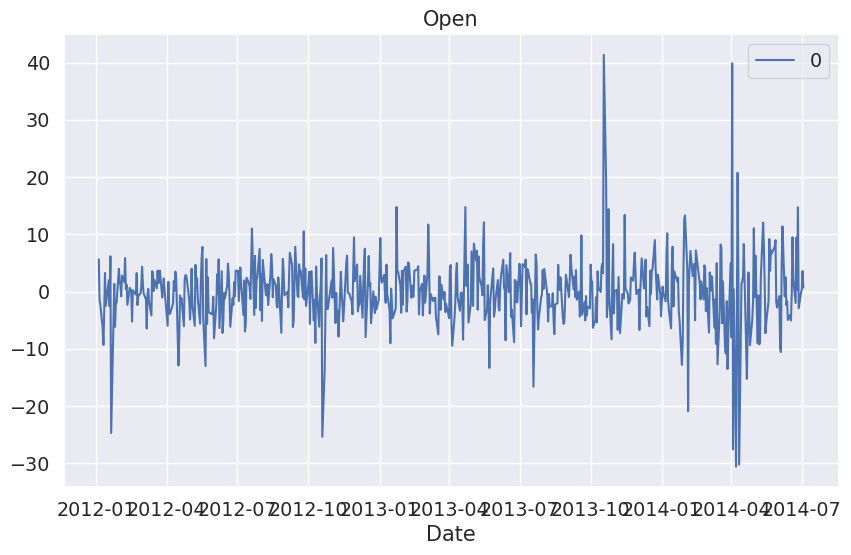

In [100]:
plt.figure(figsize=(22,10))
residuals.plot()
plt.title('Open')
plt.show()

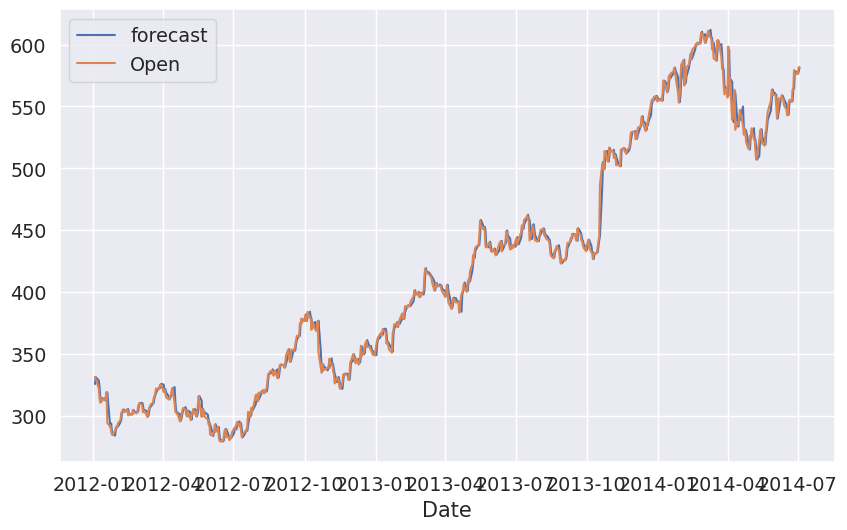

In [101]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

### For "High"

In [102]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train_data['High'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.High   No. Observations:                  628
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1968.929
Method:                       css-mle   S.D. of innovations              5.564
Date:                Sat, 07 May 2022   AIC                           3945.857
Time:                        19:55:21   BIC                           3963.627
Sample:                             1   HQIC                          3952.761
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3990      0.242      1.647      0.100      -0.076       0.874
ar.L1.D.High    -0.0195      0.253     -0.077      0.939      -0.515       0.476
ma.L1.D.High     0.1128      0.249      0.453      0.651      -0.376       0.601
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -51.3561           +0.0000j           51.3561            0.5000
MA.1           -8.8613           +0.0000j            8.8613            0.5000
-----------------------------------------------------------------------------
"""

In [103]:
residuals = pd.DataFrame(model_fit.resid)
residuals.head()

0
Date                
2012-01-04  0.640962
2012-01-05 -3.578264
2012-01-06 -2.043798
2012-01-09 -6.694720
2012-01-10 -6.347488

<Figure size 2200x1000 with 0 Axes>

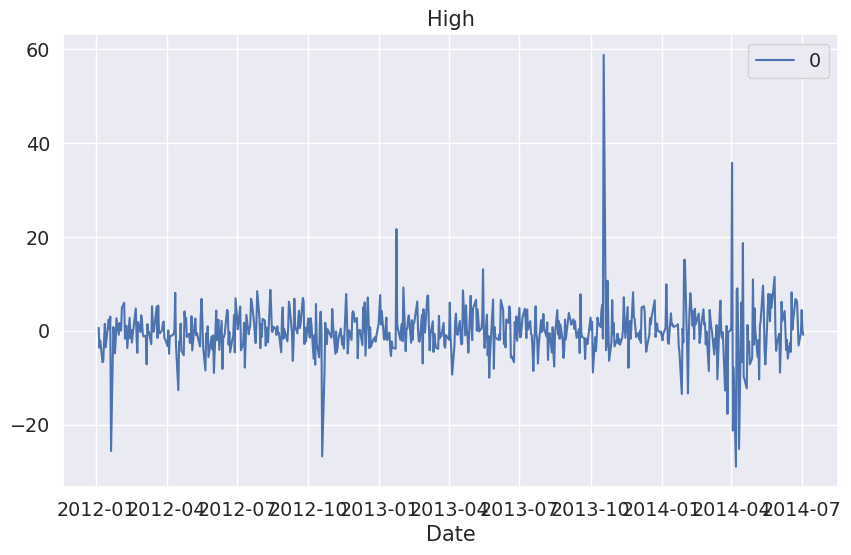

In [104]:
plt.figure(figsize=(22,10))
residuals.plot()
plt.title('High')
plt.show()

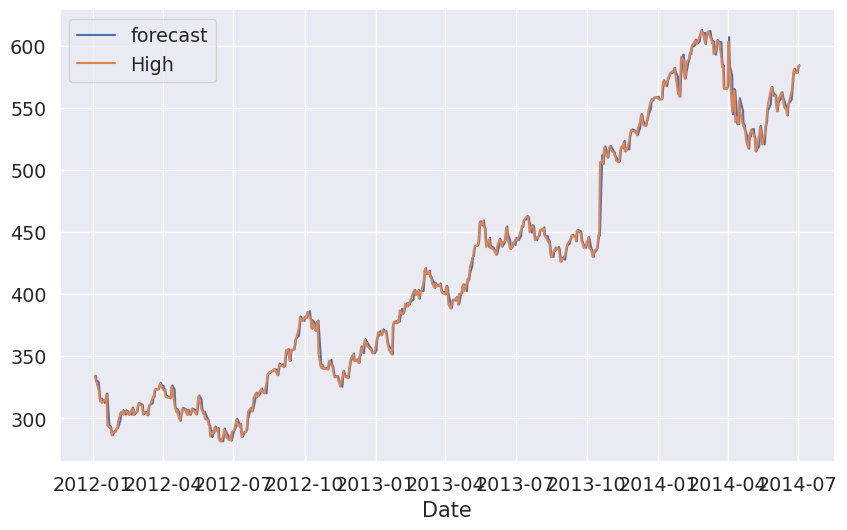

In [105]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

## For "Low"

In [106]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train_data['Low'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.Low   No. Observations:                  628
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1947.365
Method:                       css-mle   S.D. of innovations              5.376
Date:                Sat, 07 May 2022   AIC                           3902.731
Time:                        19:55:22   BIC                           3920.501
Sample:                             1   HQIC                          3909.634
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4057      0.236      1.716      0.087      -0.058       0.869
ar.L1.D.Low    -0.2185      0.250     -0.875      0.382      -0.708       0.271
ma.L1.D.Low     0.3429      0.240      1.431      0.153      -0.127       0.813
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -4.5760           +0.0000j            4.5760            0.5000
MA.1           -2.9161           +0.0000j            2.9161            0.5000
-----------------------------------------------------------------------------
"""

In [107]:
residuals = pd.DataFrame(model_fit.resid)
residuals.head()

0
Date                 
2012-01-04   3.704342
2012-01-05  -3.036142
2012-01-06  -3.143675
2012-01-09 -14.337987
2012-01-10  -0.845098

<Figure size 2200x1000 with 0 Axes>

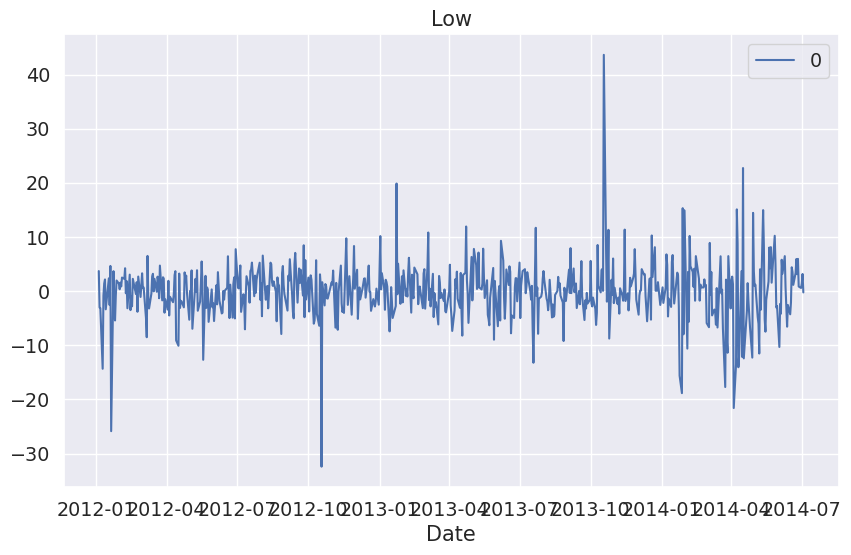

In [108]:
plt.figure(figsize=(22,10))
residuals.plot()
plt.title('Low')
plt.show()

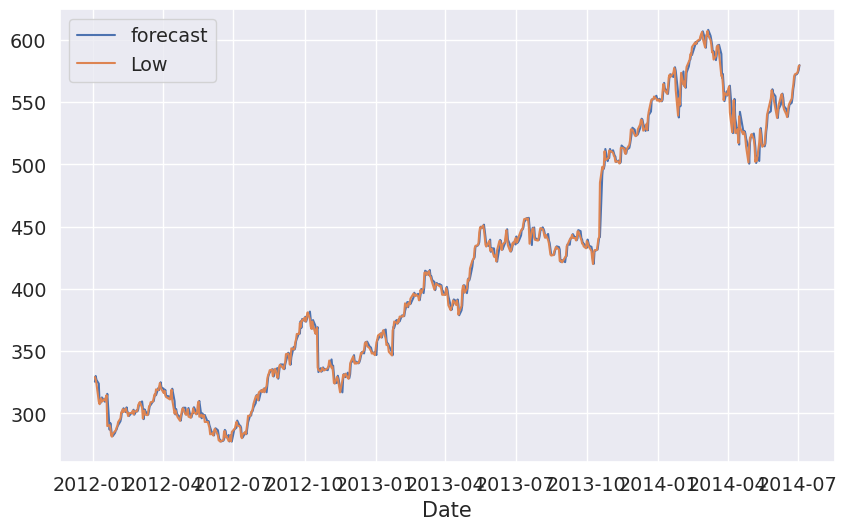

In [109]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

## For "Close"

In [110]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train_data['Close'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  628
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2921.510
Method:                       css-mle   S.D. of innovations             25.359
Date:                Sat, 07 May 2022   AIC                           5851.020
Time:                        19:55:24   BIC                           5868.791
Sample:                             1   HQIC                          5857.924
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.1278      1.036     -0.123      0.902      -2.158       1.903
ar.L1.D.Close    -0.3153      0.912     -0.346      0.730      -2.103       1.473
ma.L1.D.Close     0.3466      0.901      0.385      0.701      -1.420       2.113
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.1718           +0.0000j            3.1718            0.5000
MA.1           -2.8848           +0.0000j            2.8848            0.5000
-----------------------------------------------------------------------------
"""

In [111]:
residuals = pd.DataFrame(model_fit.resid)
residuals.head()

0
Date                 
2012-01-04   2.987754
2012-01-05  -9.204824
2012-01-06  -8.524776
2012-01-09 -27.185014
2012-01-10   1.597642

<Figure size 2200x1000 with 0 Axes>

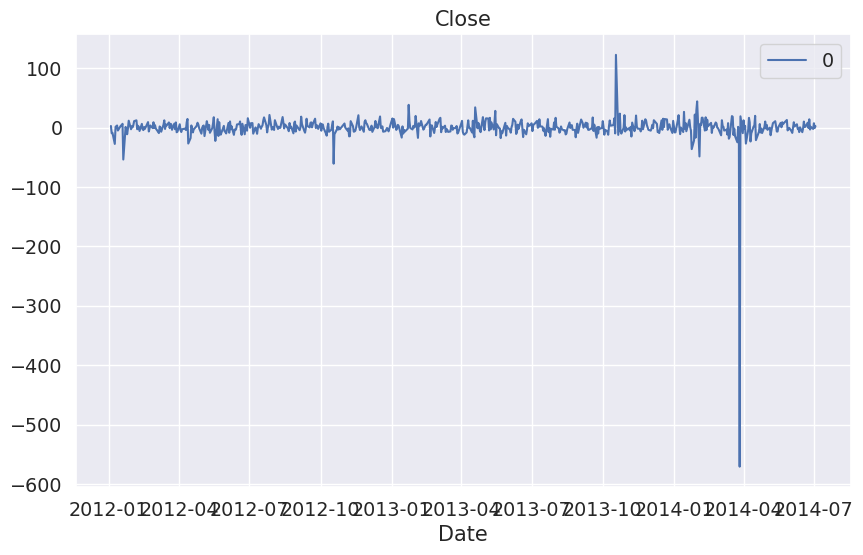

In [112]:
plt.figure(figsize=(22,10))
residuals.plot()
plt.title('Close')
plt.show()

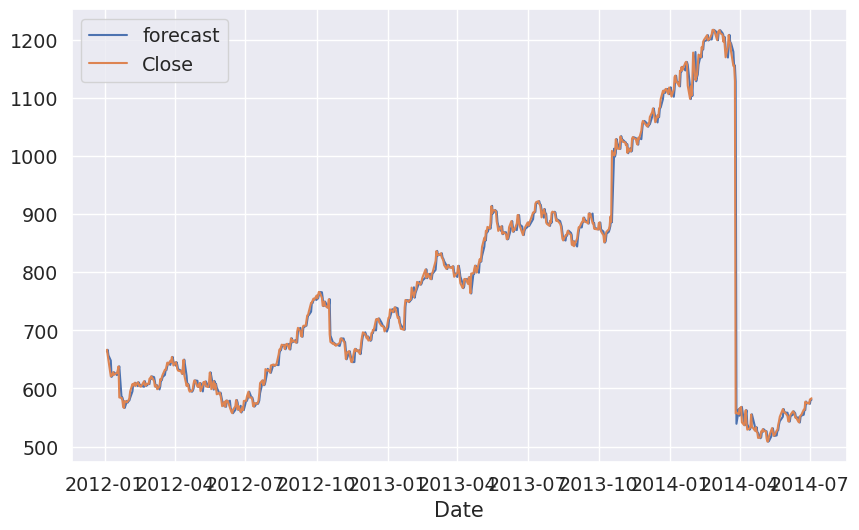

In [113]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

## For "Volume"

In [115]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train_data['Volume'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Volume   No. Observations:                  628
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -10010.042
Method:                       css-mle   S.D. of innovations        2015586.540
Date:                Sat, 07 May 2022   AIC                          20028.084
Time:                        20:04:16   BIC                          20045.854
Sample:                             1   HQIC                         20034.987
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -5232.4632    913.297     -5.729      0.000   -7022.493   -3442.433
ar.L1.D.Volume     0.5168      0.034     15.048      0.000       0.449       0.584
ma.L1.D.Volume    -0.9999      0.007   -152.172      0.000      -1.013      -0.987
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.9350           +0.0000j            1.9350            0.0000
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [116]:
residuals = pd.DataFrame(model_fit.resid)
residuals.head()

0
Date                    
2012-01-04 -1.625868e+06
2012-01-05  4.533106e+05
2012-01-06 -1.251336e+06
2012-01-09  5.850008e+06
2012-01-10 -1.078621e+06

<Figure size 2200x1000 with 0 Axes>

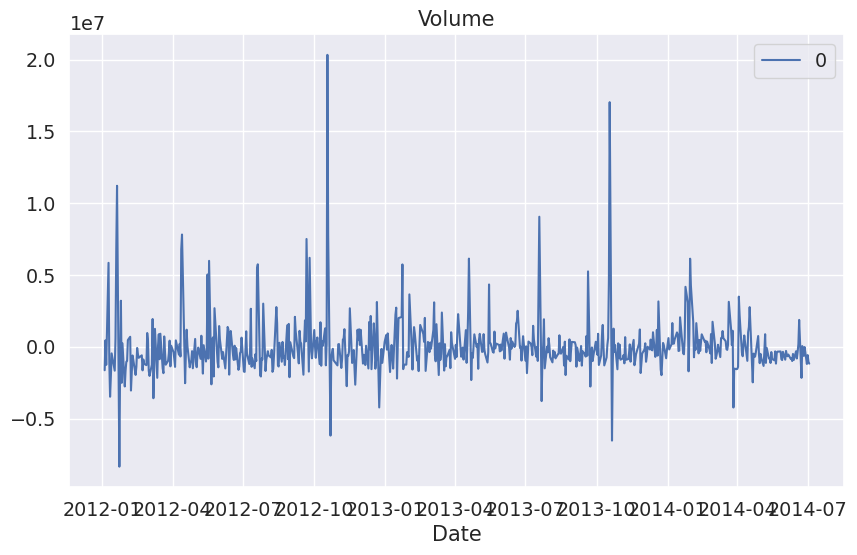

In [117]:
plt.figure(figsize=(22,10))
residuals.plot()
plt.title('Volume')
plt.show()

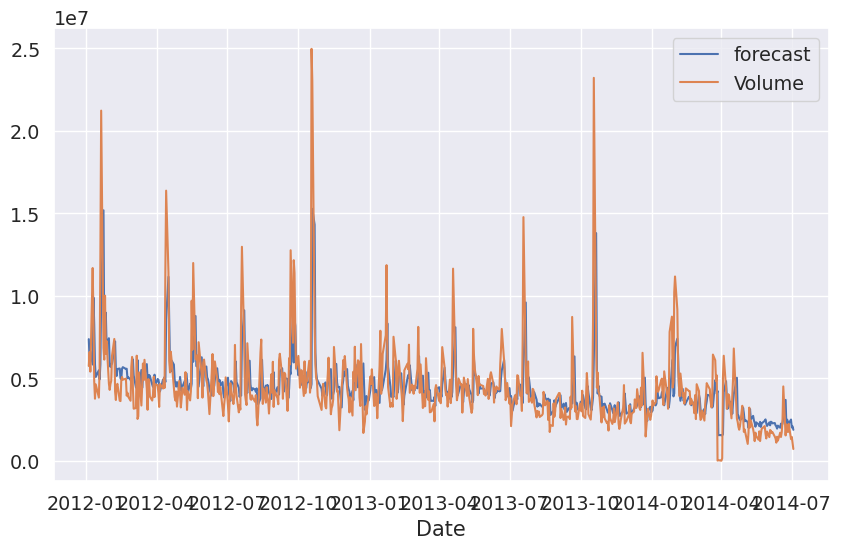

In [118]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

# VAR Model

## Configration and Training Model

In [119]:
#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR


In [120]:
model = VAR(endog=train_data)
model_trained = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [121]:
# save model
model_trained.save('unilevermodel.pkl')

## Testing

In [122]:
predictions = model_trained.forecast(model_trained.y, steps=len(test_data))
predictions

/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


array([[5.83368316e+02, 5.86772891e+02, 5.77981932e+02, 5.90608948e+02,
        9.43339061e+05],
       [5.83972878e+02, 5.88118955e+02, 5.77600076e+02, 5.93000472e+02,
        1.28857027e+06],
       [5.84404191e+02, 5.88805383e+02, 5.77618235e+02, 5.93713380e+02,
        1.53248318e+06],
       ...,
       [6.83755115e+02, 6.89160851e+02, 6.74505149e+02, 4.69276146e+02,
        2.88086130e+05],
       [6.83862015e+02, 6.89268706e+02, 6.74609656e+02, 4.69123417e+02,
        2.86336345e+05],
       [6.83968785e+02, 6.89376430e+02, 6.74714035e+02, 4.68970860e+02,
        2.84588652e+05]])

In [123]:
import pandas as pd

In [124]:
test_data.index

Index([2014-07-07, 2014-07-08, 2014-07-09, 2014-07-10, 2014-07-11, 2014-07-14,
       2014-07-15, 2014-07-16, 2014-07-17, 2014-07-18,
       ...
       2016-12-16, 2016-12-19, 2016-12-20, 2016-12-21, 2016-12-22, 2016-12-23,
       2016-12-27, 2016-12-28, 2016-12-29, 2016-12-30],
      dtype='object', name='Date', length=629)

In [125]:
forcasted_results = pd.DataFrame(predictions)
forcasted_results.head(12)
forcasted_results.index = test_data.index
forcasted_results.head(12)

0           1           2           3             4
Date                                                                    
2014-07-07  583.368316  586.772891  577.981932  590.608948  9.433391e+05
2014-07-08  583.972878  588.118955  577.600076  593.000472  1.288570e+06
2014-07-09  584.404191  588.805383  577.618235  593.713380  1.532483e+06
2014-07-10  584.730214  589.225153  577.766936  593.839252  1.677442e+06
2014-07-11  585.004100  589.535118  577.960050  593.756789  1.756562e+06
2014-07-14  585.251615  589.797710  578.168271  593.598136  1.797297e+06
2014-07-15  585.485772  590.039020  578.381626  593.410533  1.816999e+06
2014-07-16  585.713108  590.270400  578.596673  593.211366  1.825561e+06
2014-07-17  585.936905  590.496968  578.812199  593.007266  1.828339e+06
2014-07-18  586.158813  590.721102  579.027770  592.800870  1.828151e+06
2014-07-21  586.379660  590.943932  579.243222  592.593275  1.826454e+06
2014-07-22  586.599860  591.166005  579.458494  592.384955  1.823994e+06

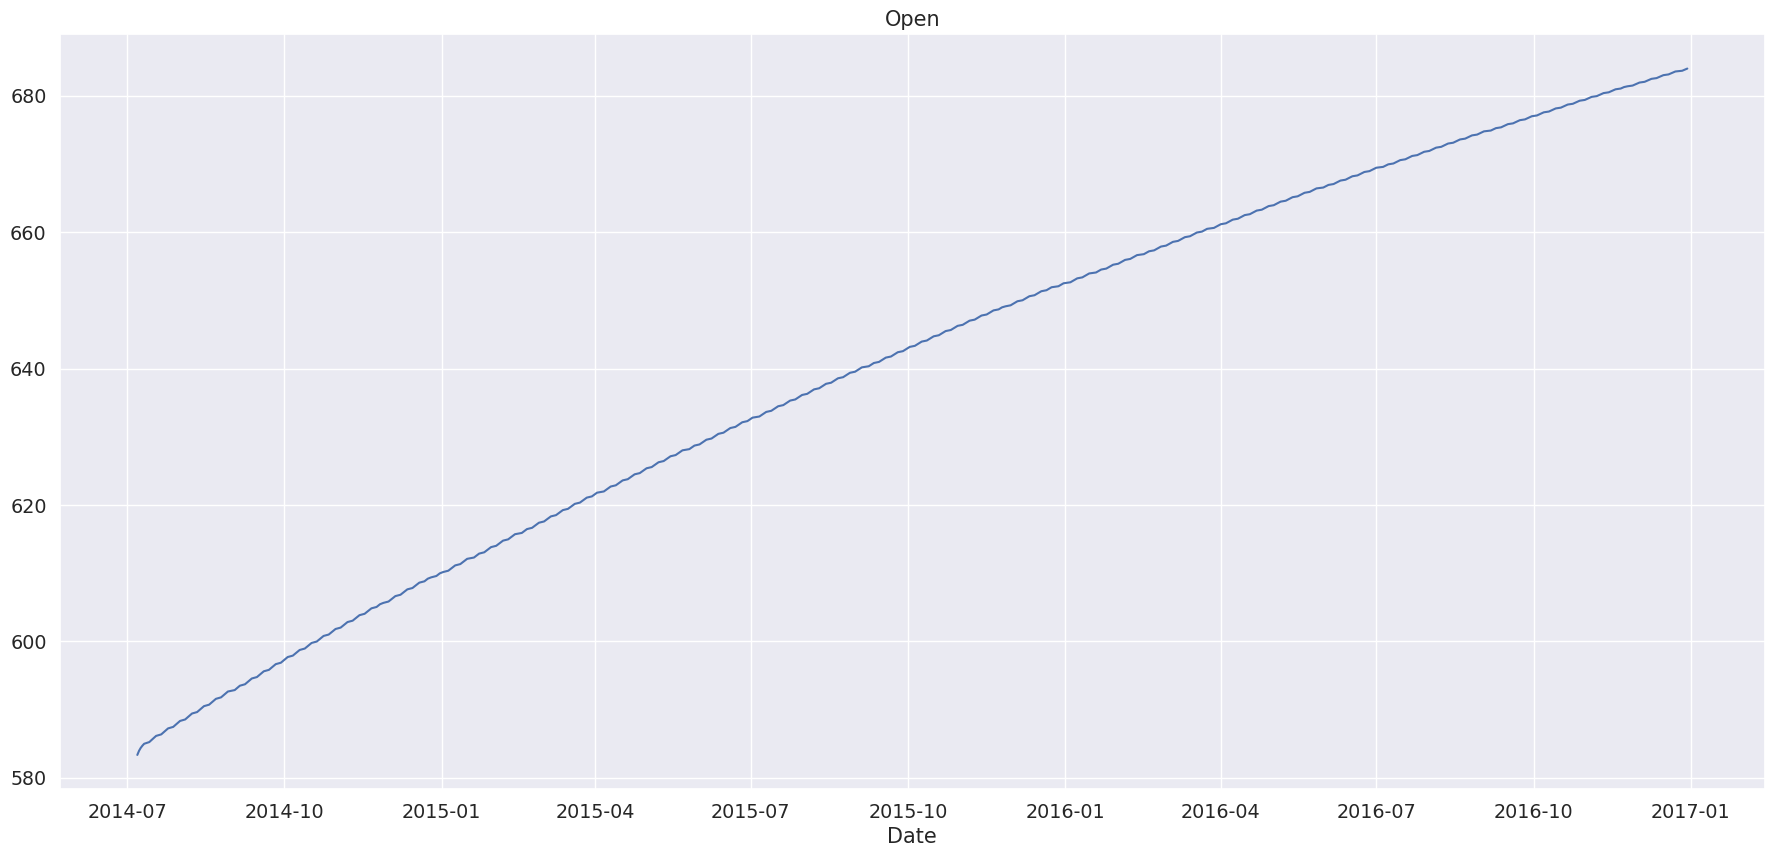

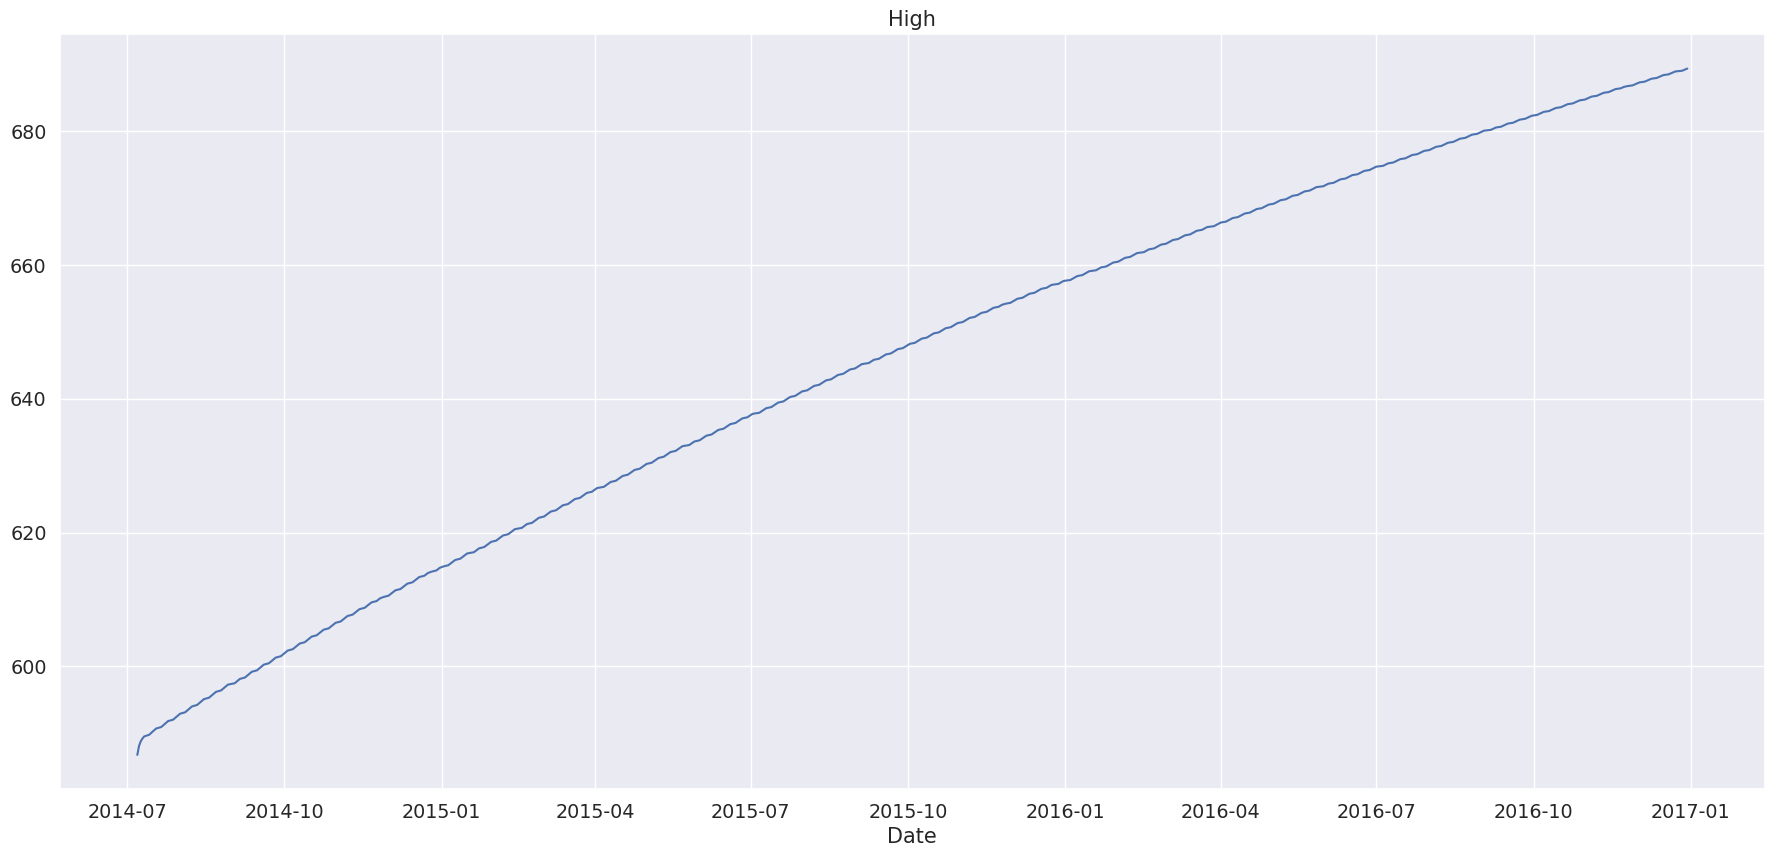

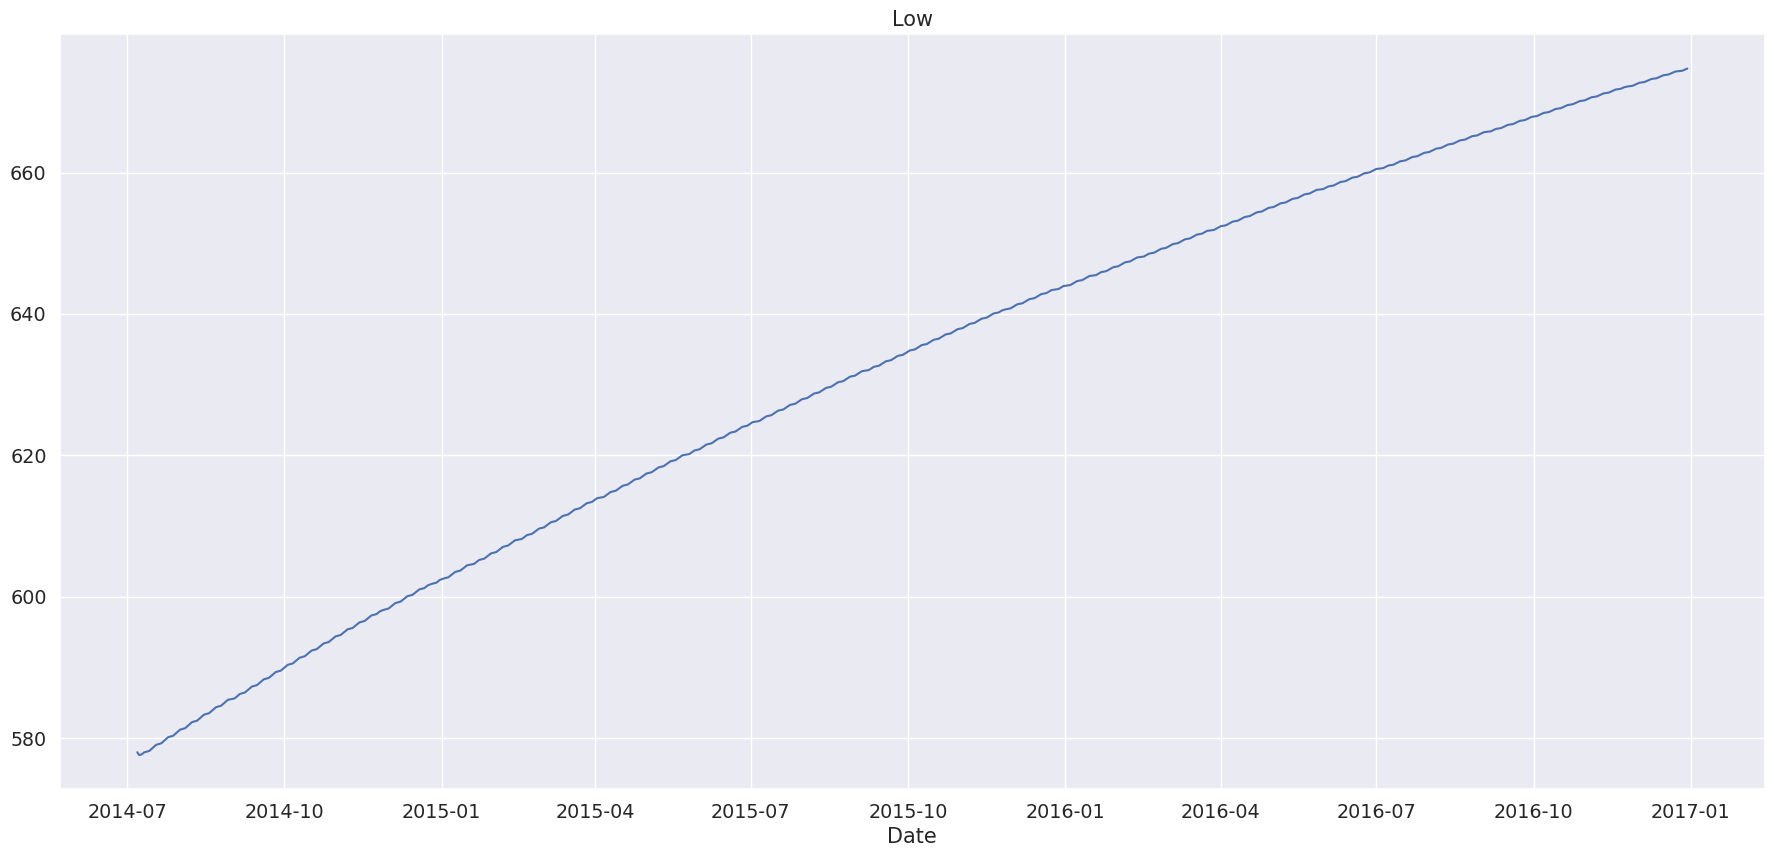

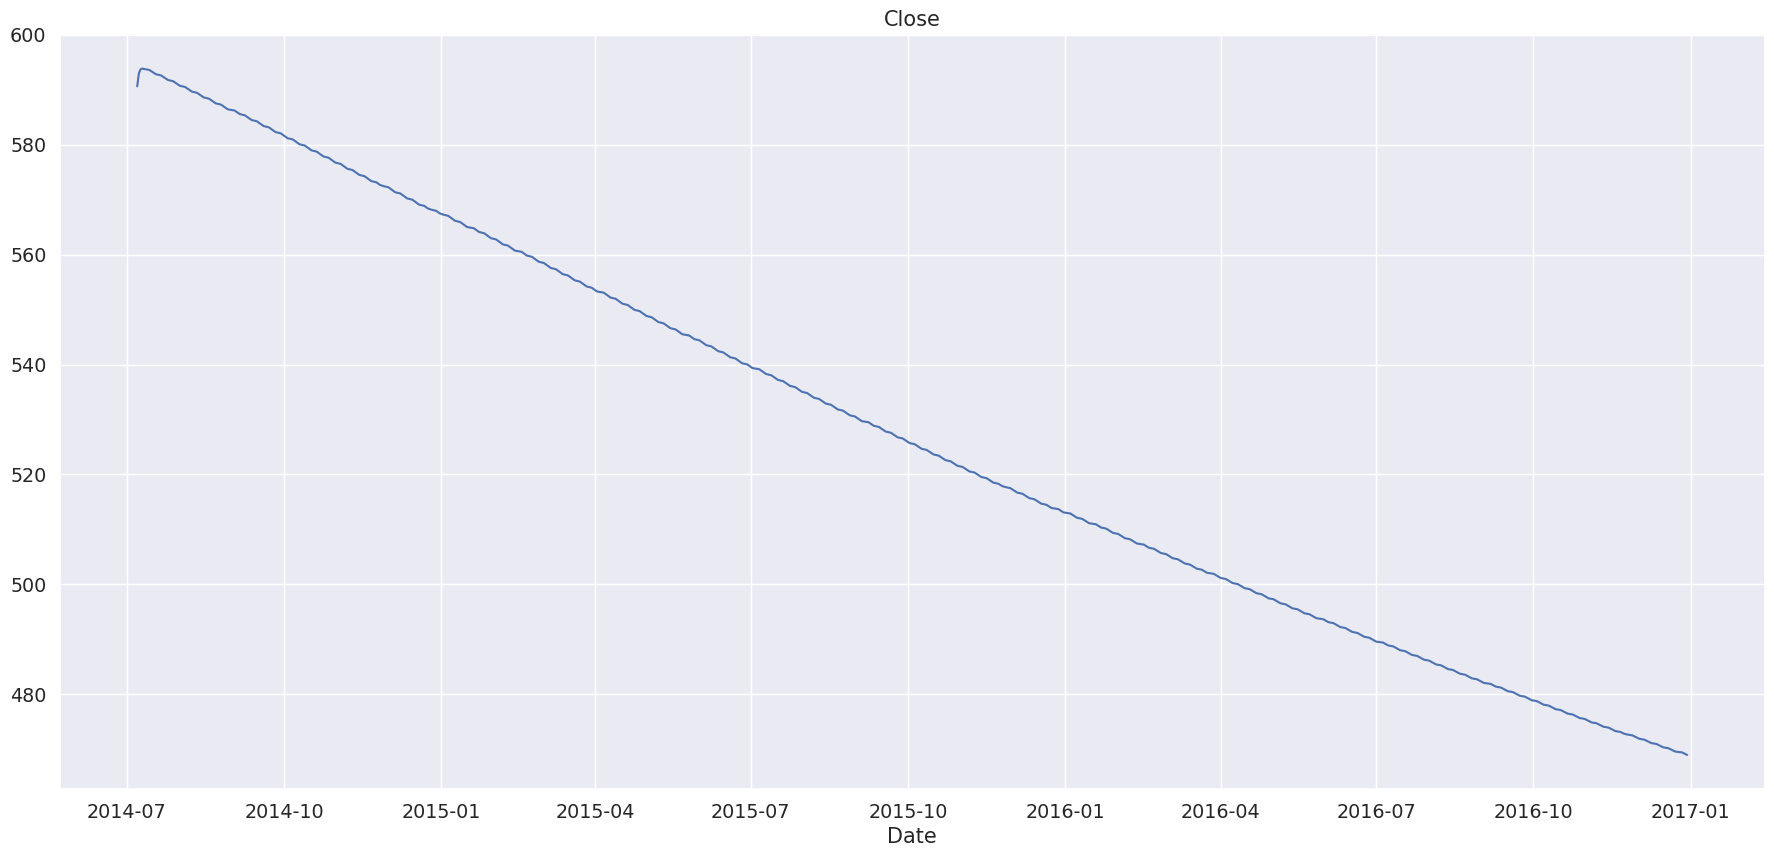

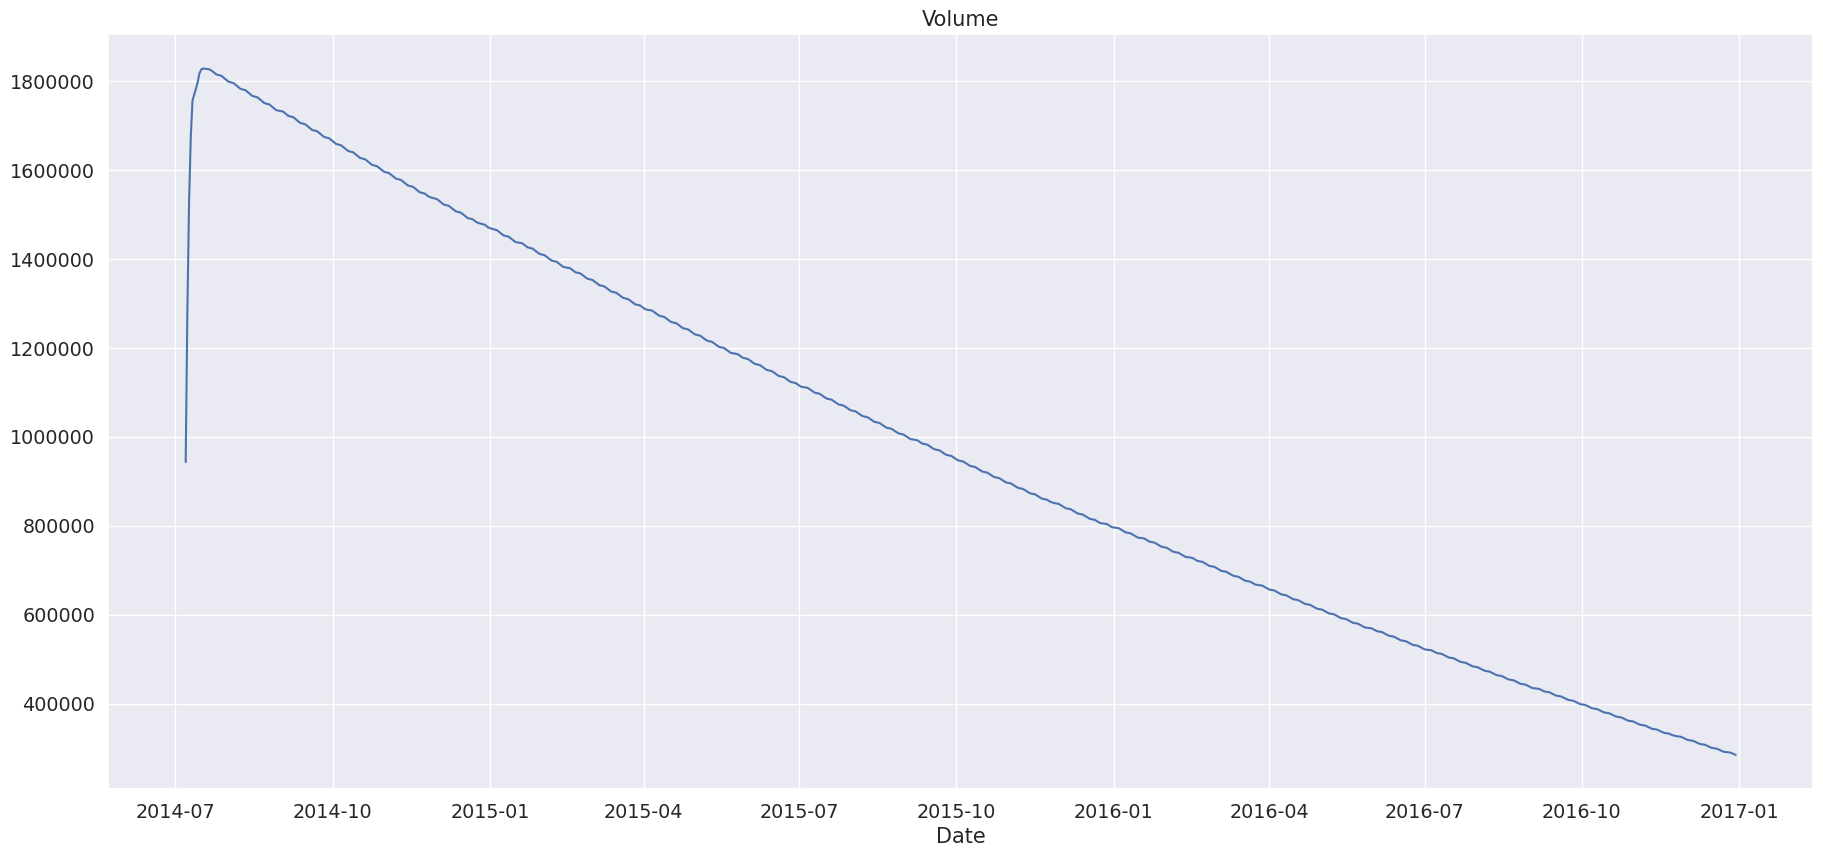

In [127]:
forcasted_results.columns=['Open', 'High', 'Low', 'Close','Volume']
columnnames=list(forcasted_results.columns)
for columnname in columnnames:
  plt.figure(figsize=(22,10))
  forcasted_results[columnname].plot()
  plt.title(columnname)
  plt.show()

## Model Performance Visualization

In [128]:
model_trained.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 07, May, 2022
Time:                     20:05:30
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    42.2253
Nobs:                     628.000    HQIC:                   42.0955
Log likelihood:          -17617.6    FPE:                1.76215e+18
AIC:                      42.0131    Det(Omega_mle):     1.68033e+18
--------------------------------------------------------------------
Results for equation Open
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const            -1.862180         0.877105           -2.123           0.034
L1.Open          -0.654194         0.058403          -11.201           0.000
L1.High           0.826866         0.067652           12.222           0.000


##Final Model

In [129]:
model = VAR(endog=ts)
model_trained = model.fit()
# save model
model_trained.save('unilevermodel.pkl')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


# Test Results

## VAR Results

In [130]:
import pickle
# load model
with open('unilevermodel.pkl', 'rb') as pickle_file:
    loaded_model = pickle.load(pickle_file)

In [131]:
forcasted_results=loaded_model.forecast(model_trained.y, steps=len(test_data)) # test_data must be one row of information as-is, meaning, as it originally appears in the dataset provided for training. 
print(forcasted_results)

[[7.73312882e+02 7.79020512e+02 7.66314228e+02 7.69808957e+02
  1.58171373e+06]
 [7.73228930e+02 7.79042126e+02 7.66286397e+02 7.68997057e+02
  1.46161293e+06]
 [7.73276038e+02 7.79100256e+02 7.66339823e+02 7.68181819e+02
  1.39774390e+06]
 ...
 [8.15809237e+02 8.22211903e+02 8.08267301e+02 6.40910142e+02
  5.16833532e+05]
 [8.15862771e+02 8.22265896e+02 8.08320267e+02 6.40880402e+02
  5.16275532e+05]
 [8.15916252e+02 8.22319836e+02 8.08373182e+02 6.40850751e+02
  5.15718293e+05]]


/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [132]:
#converting predictions to dataframe
test_list=['2017-04-13', '2017-04-17', '2017-04-18', '2017-04-19', '2017-04-20', '2017-04-21','2017-04-25', '2017-04-26', '2017-04-27', '2017-04-28']
inputdata = pd.DataFrame(test_list)
inputdata.columns =['testdata']
print(inputdata)
inputdata['testdata']=inputdata['testdata'].astype('str').map(lambda x: x.lower())
testsamplerequired = pd.to_datetime(inputdata['testdata']).dt.date
print(testsamplerequired)
forcasted_results=loaded_model.forecast(loaded_model.y, steps=len(testsamplerequired)) # test_data must be one row of information as-is, meaning, as it originally appears in the dataset provided for training. 
print(forcasted_results)

     testdata
0  2017-04-13
1  2017-04-17
2  2017-04-18
3  2017-04-19
4  2017-04-20
5  2017-04-21
6  2017-04-25
7  2017-04-26
8  2017-04-27
9  2017-04-28
0    2017-04-13
1    2017-04-17
2    2017-04-18
3    2017-04-19
4    2017-04-20
5    2017-04-21
6    2017-04-25
7    2017-04-26
8    2017-04-27
9    2017-04-28
Name: testdata, dtype: object
[[7.73312882e+02 7.79020512e+02 7.66314228e+02 7.69808957e+02
  1.58171373e+06]
 [7.73228930e+02 7.79042126e+02 7.66286397e+02 7.68997057e+02
  1.46161293e+06]
 [7.73276038e+02 7.79100256e+02 7.66339823e+02 7.68181819e+02
  1.39774390e+06]
 [7.73333521e+02 7.79159828e+02 7.66404749e+02 7.67365579e+02
  1.36274387e+06]
 [7.73396330e+02 7.79222879e+02 7.66472969e+02 7.66554017e+02
  1.34264400e+06]
 [7.73462261e+02 7.79289136e+02 7.66541893e+02 7.65748662e+02
  1.33033525e+06]
 [7.73530024e+02 7.79357733e+02 7.66610773e+02 7.64949633e+02
  1.32214862e+06]
 [7.73598877e+02 7.79427888e+02 7.66679479e+02 7.64156680e+02
  1.31616649e+06]
 [7.73668391e+02

/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [133]:
import pandas as pd

In [134]:
forcasted_results = pd.DataFrame(forcasted_results)
forcasted_results['Date']=testsamplerequired
forcasted_results.set_index('Date', inplace = True) #Set the date to the index
forcasted_results.head(12)

0           1           2           3             4
Date                                                                    
2017-04-13  773.312882  779.020512  766.314228  769.808957  1.581714e+06
2017-04-17  773.228930  779.042126  766.286397  768.997057  1.461613e+06
2017-04-18  773.276038  779.100256  766.339823  768.181819  1.397744e+06
2017-04-19  773.333521  779.159828  766.404749  767.365579  1.362744e+06
2017-04-20  773.396330  779.222879  766.472969  766.554017  1.342644e+06
2017-04-21  773.462261  779.289136  766.541893  765.748662  1.330335e+06
2017-04-25  773.530024  779.357733  766.610773  764.949633  1.322149e+06
2017-04-26  773.598877  779.427888  766.679479  764.156680  1.316166e+06
2017-04-27  773.668391  779.499041  766.748057  763.369522  1.311376e+06
2017-04-28  773.738328  779.570832  766.816584  762.587937  1.307236e+06

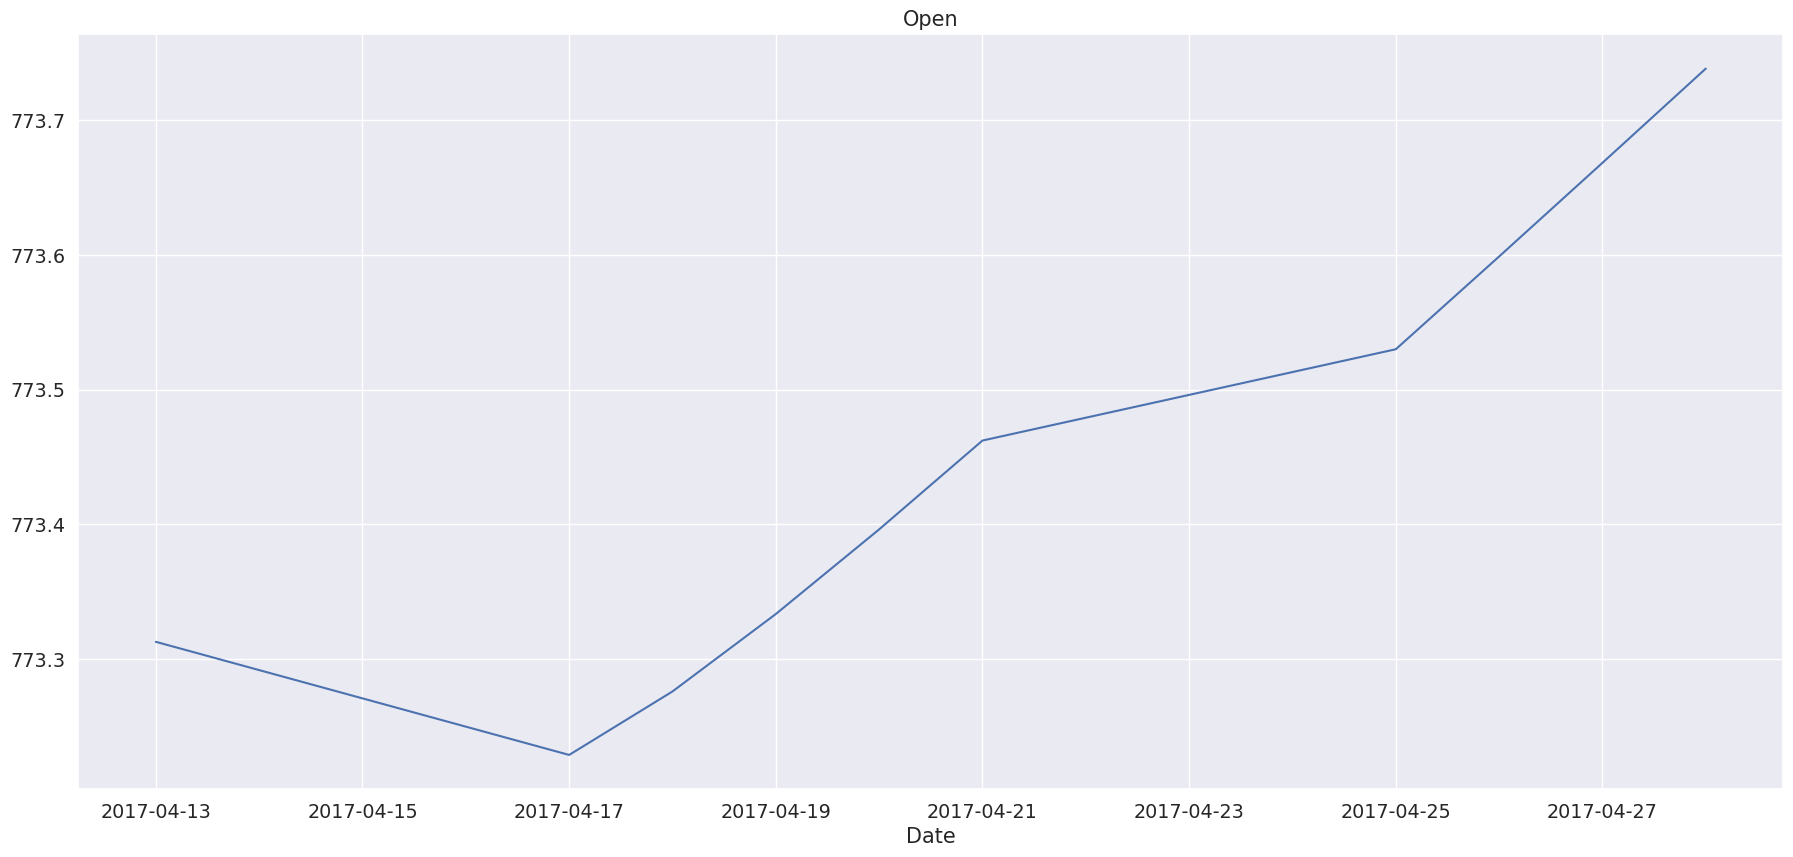

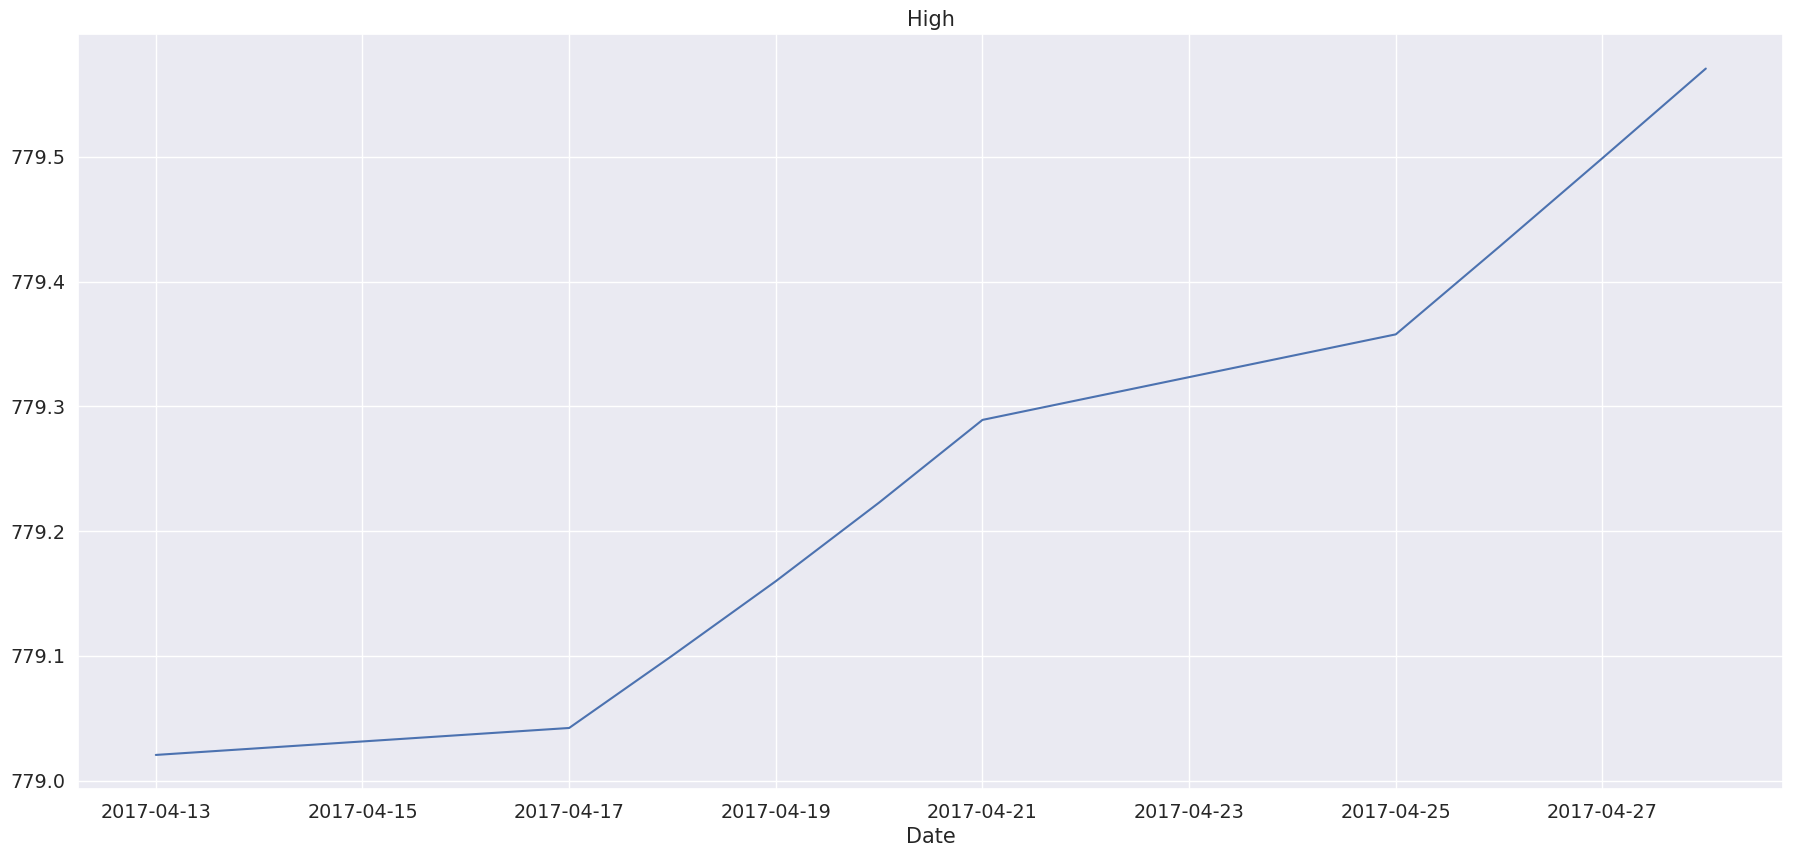

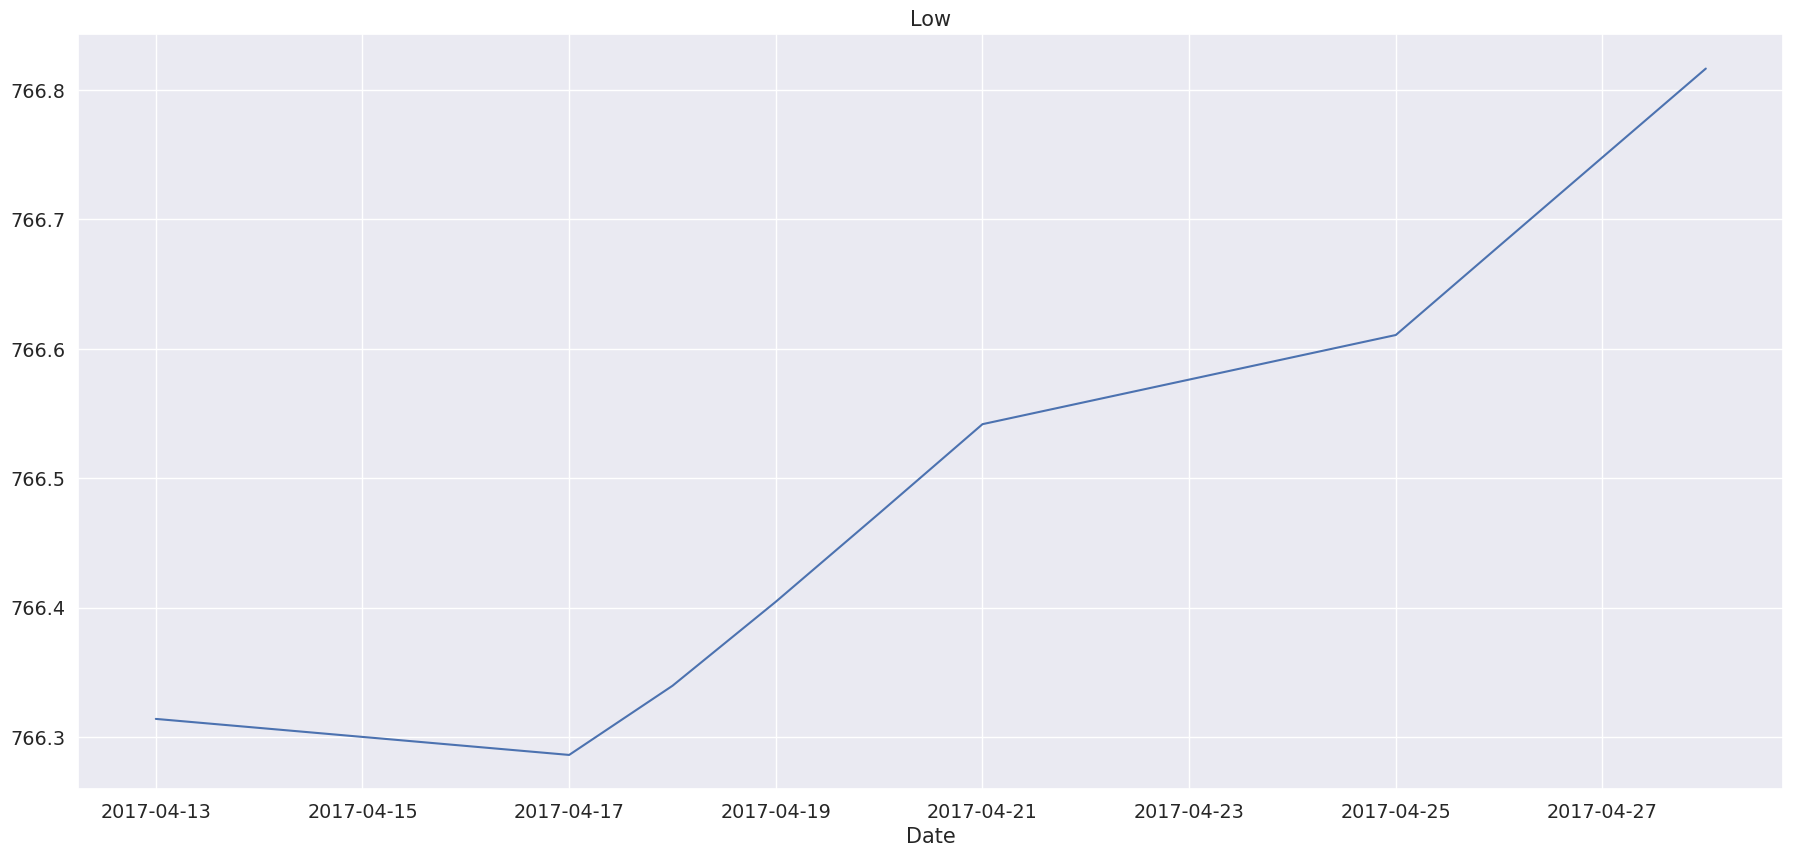

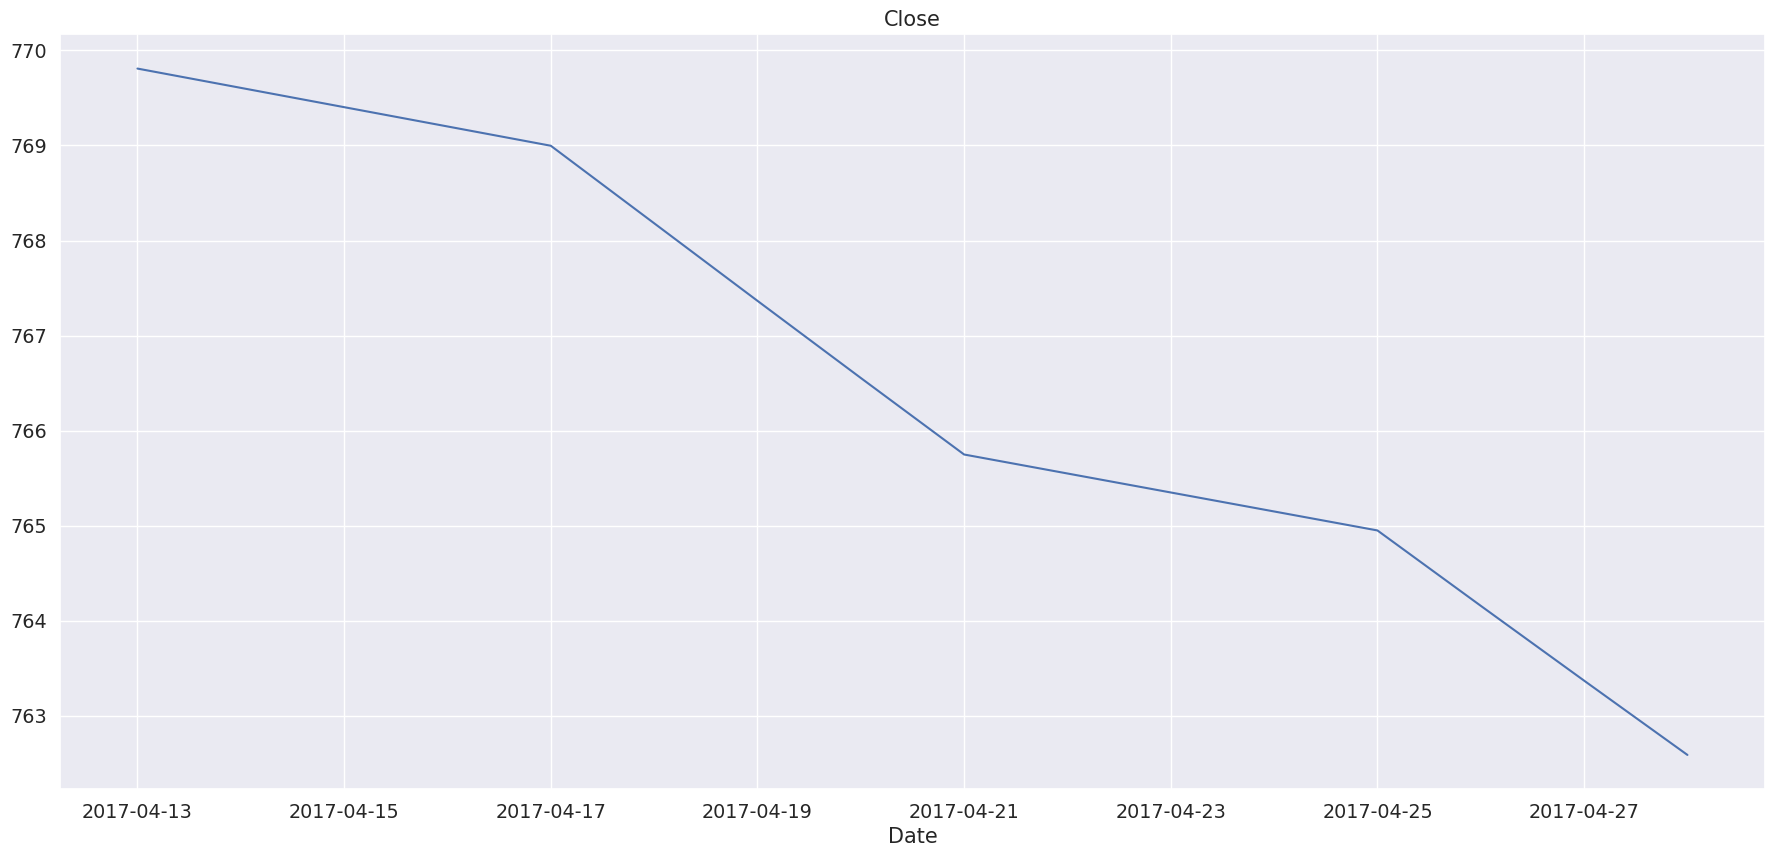

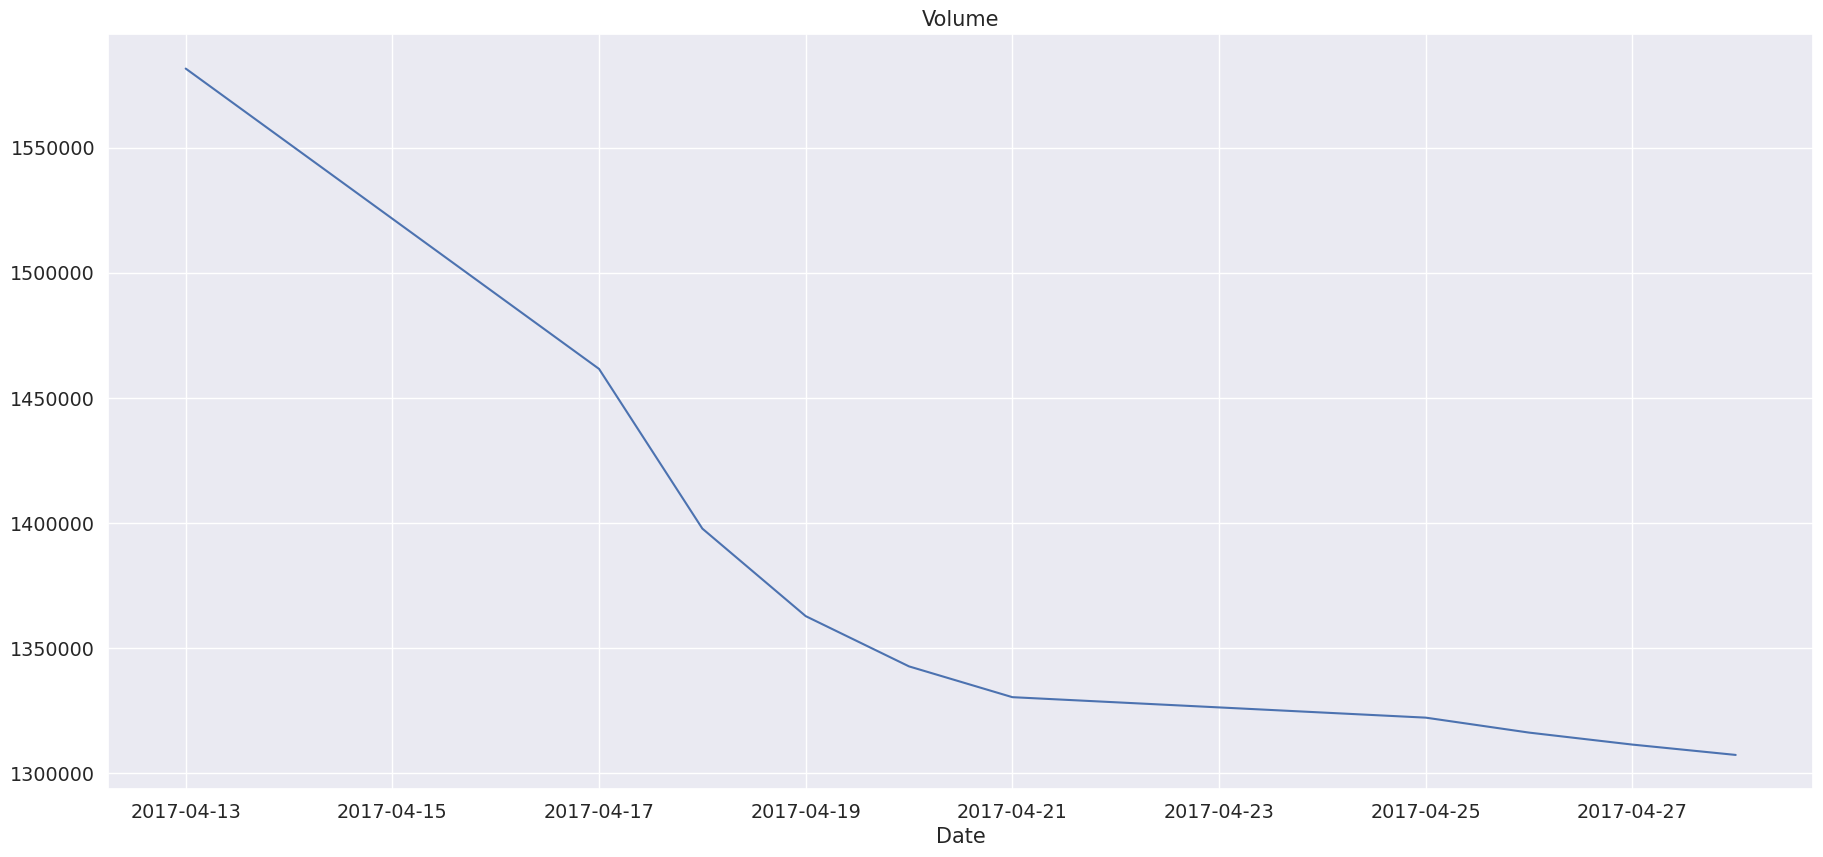

In [136]:
forcasted_results.columns=['Open', 'High', 'Low', 'Close','Volume']
columnnames=list(forcasted_results.columns)
for columnname in columnnames:
  plt.figure(figsize=(22,10))
  forcasted_results[columnname].plot()
  plt.title(columnname)
  plt.show()